In [1]:
from dataclasses import dataclass
from os.path import abspath

import esim_py
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch

from utils.visualization import visualize_vid2e_events
from utils.manager import RenderManager, ImageManager

['/home/alexis/E3D/e3d/utils', '/home/alexis/E3D/e3d', '/home/alexis/anaconda3/envs/pytorch3d/lib/python37.zip', '/home/alexis/anaconda3/envs/pytorch3d/lib/python3.7', '/home/alexis/anaconda3/envs/pytorch3d/lib/python3.7/lib-dynload', '', '/home/alexis/anaconda3/envs/pytorch3d/lib/python3.7/site-packages', '/home/alexis/anaconda3/envs/pytorch3d/lib/python3.7/site-packages/IPython/extensions', '/home/alexis/.ipython']


In [2]:
#Matplotlib config nums
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
#Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if device == "cuda:0": torch.cuda.set_device()

In [21]:
Cp, Cn = 0.03, 0.03
sigma_cp, sigma_cn = 0.05, 0.05
refractory_period = 1e-4
log_eps = .001
use_log = True

In [22]:
render = RenderManager.from_directory(dir_num=10)
image_path_list = [img['image_path'] for img in render.images['phong']]
timestamp_list = range(len(image_path_list)) #let's see if this works

esim = esim_py.EventSimulator(
    Cp,
    Cn, 
    refractory_period, 
    log_eps, 
    use_log,
    sigma_cp, 
    sigma_cn
)

42320


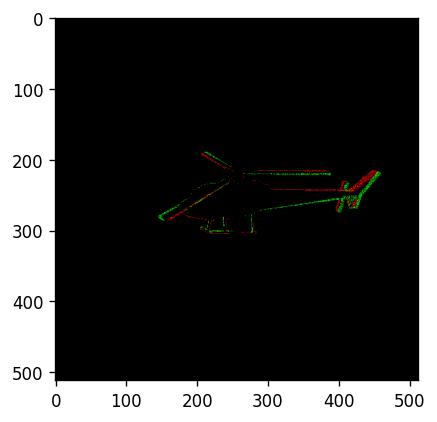

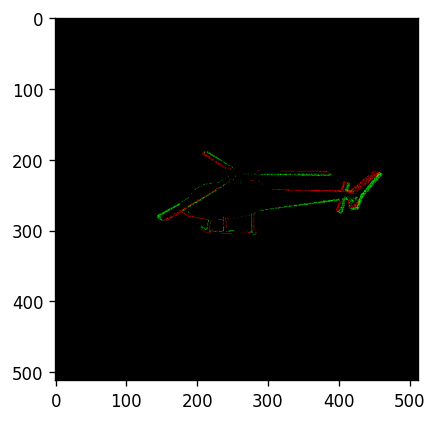

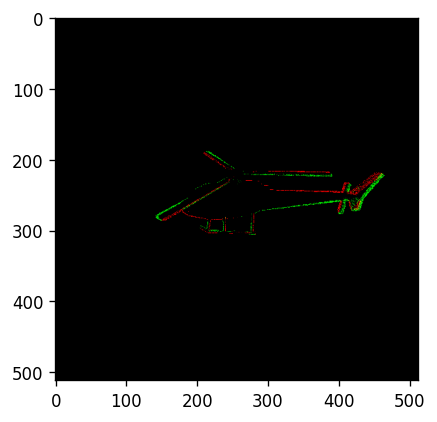

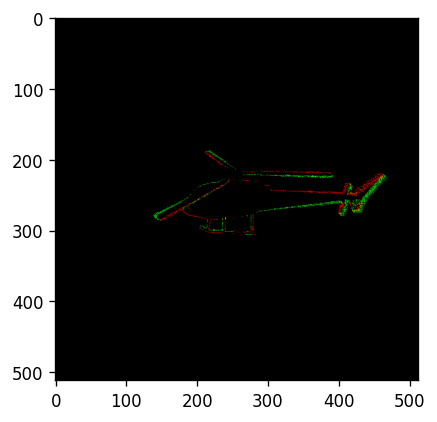

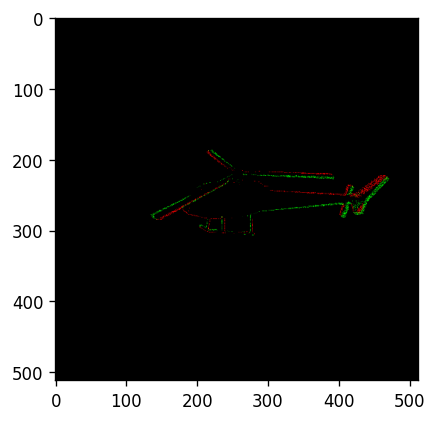

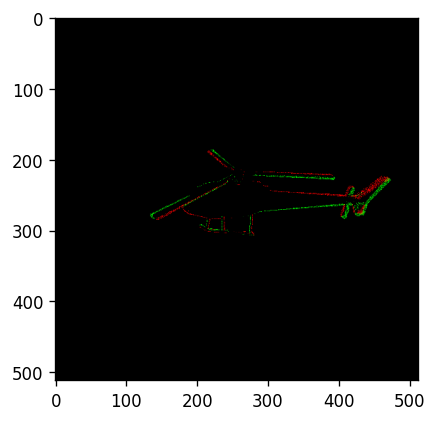

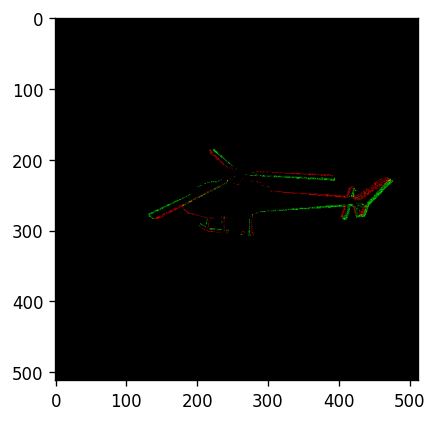

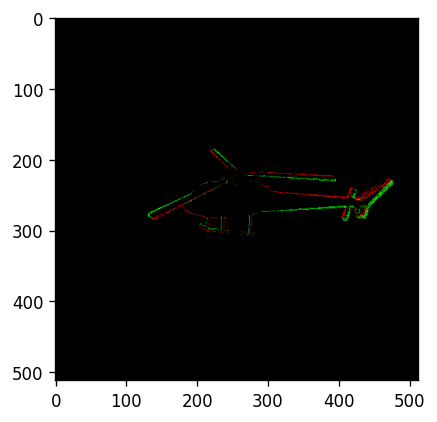

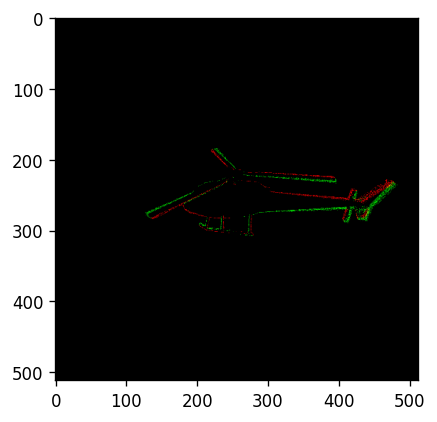

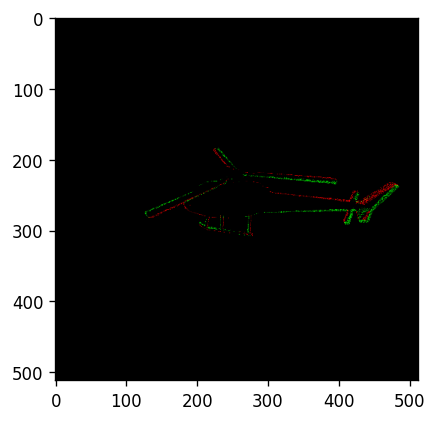

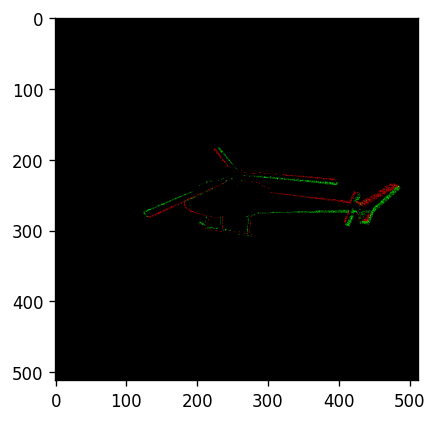

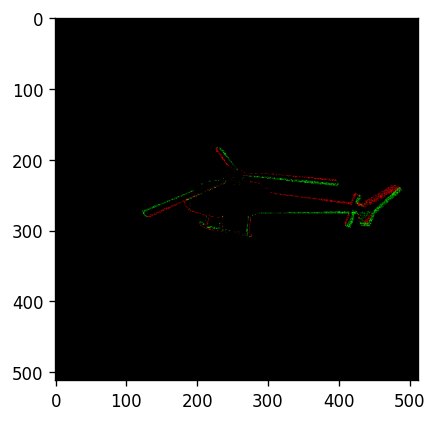

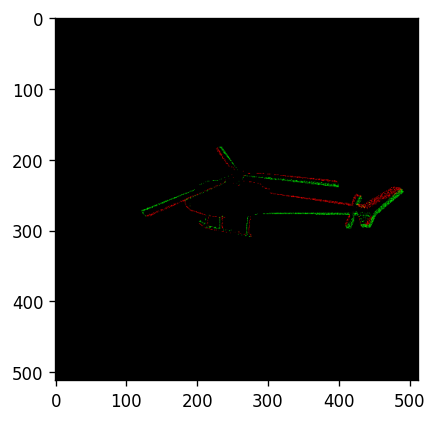

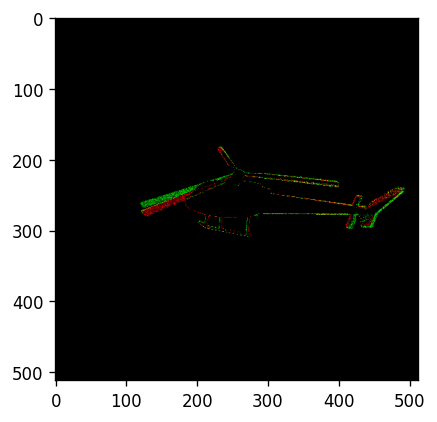

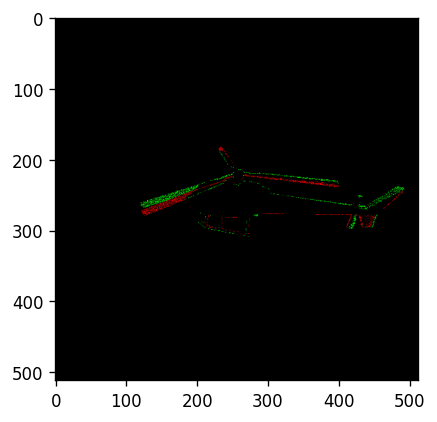

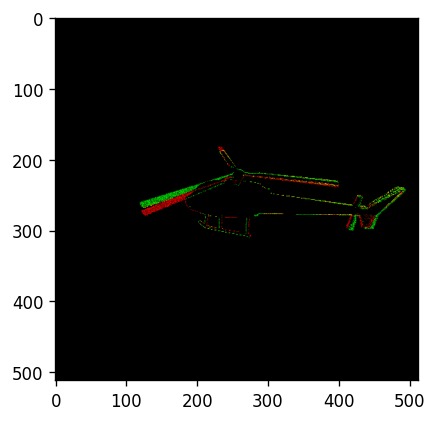

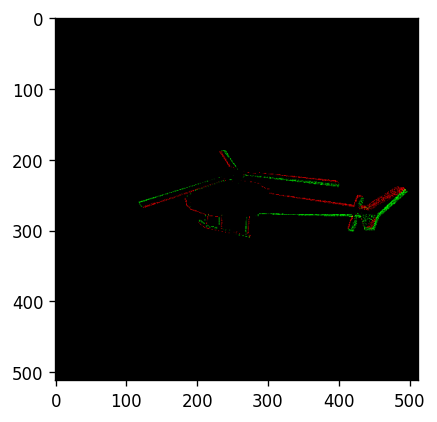

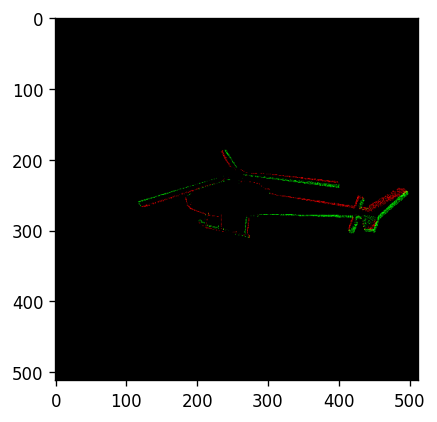

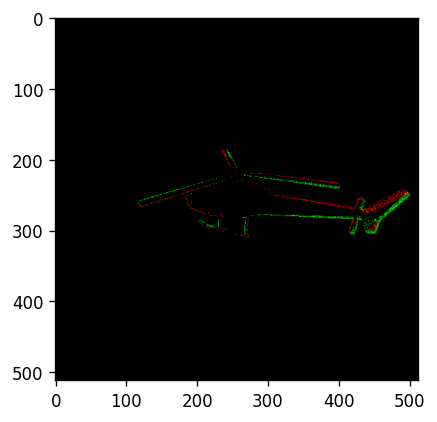

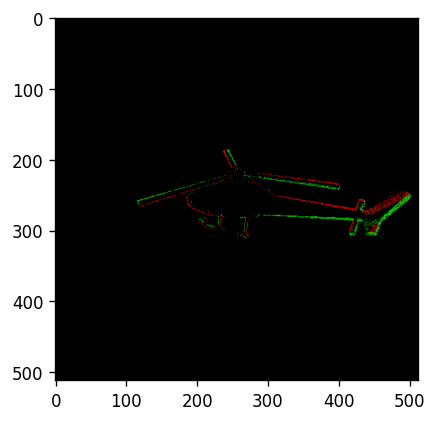

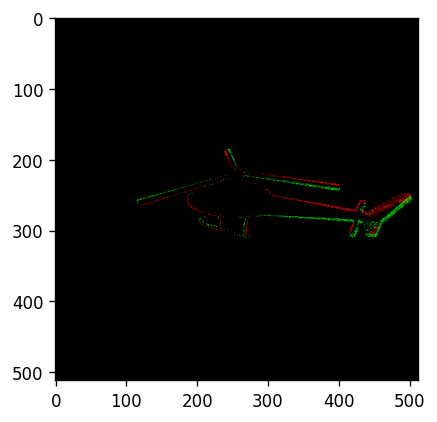

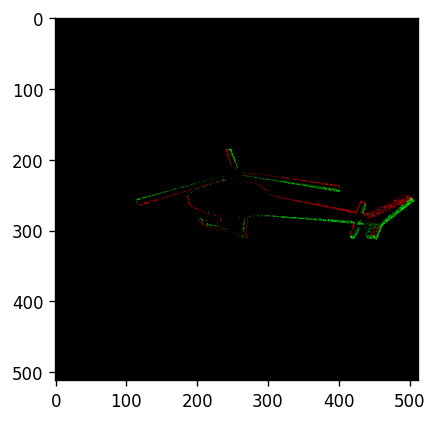

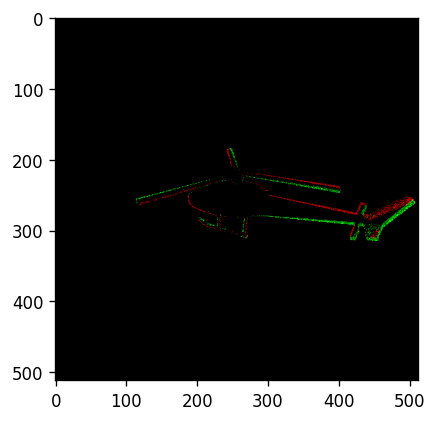

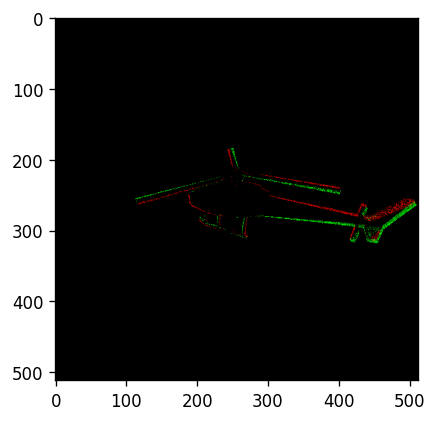

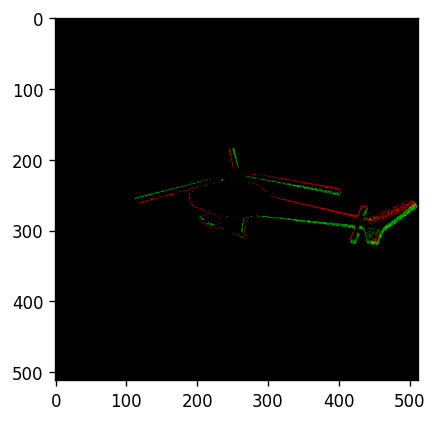

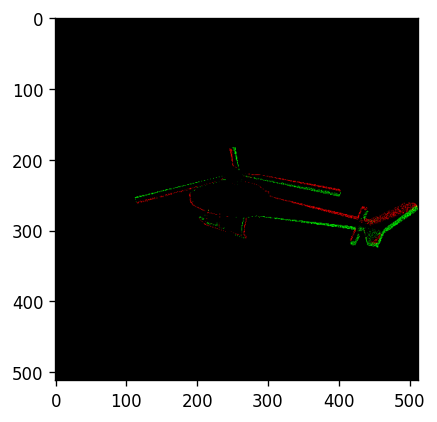

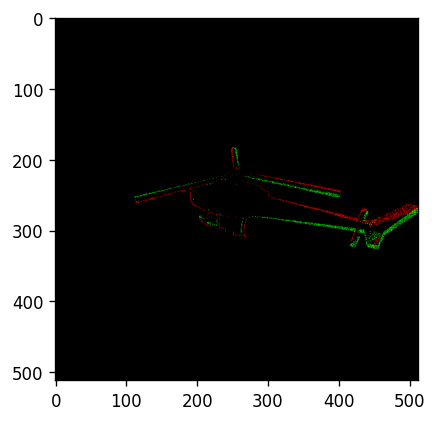

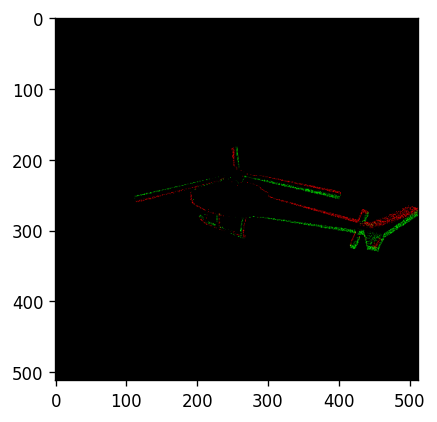

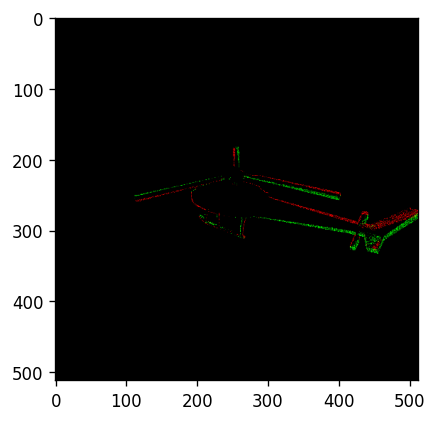

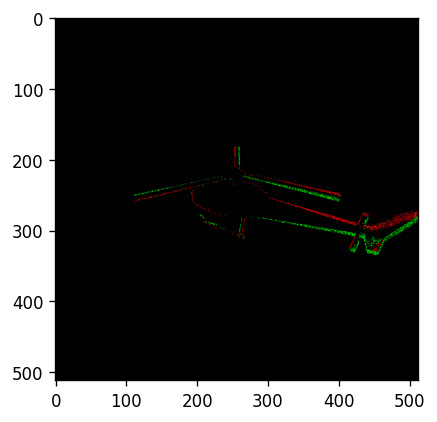

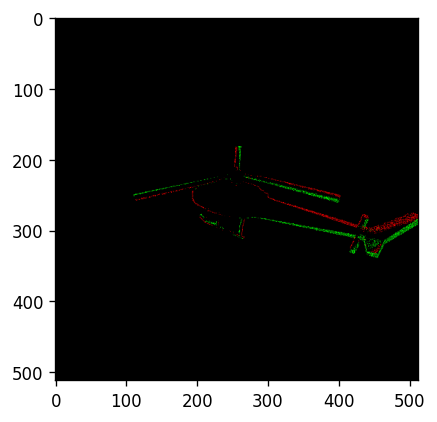

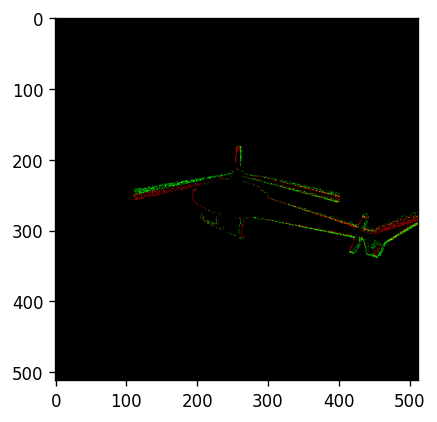

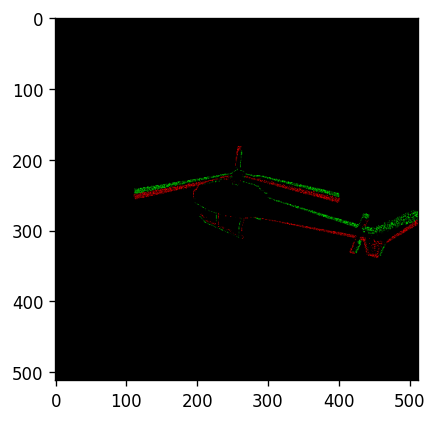

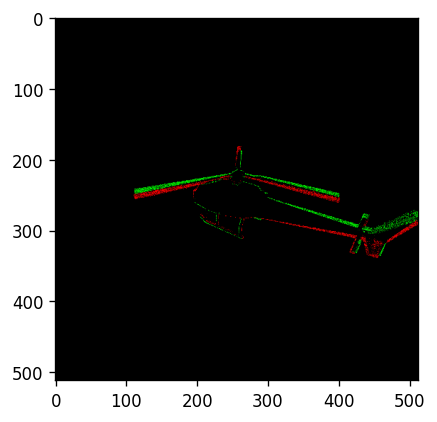

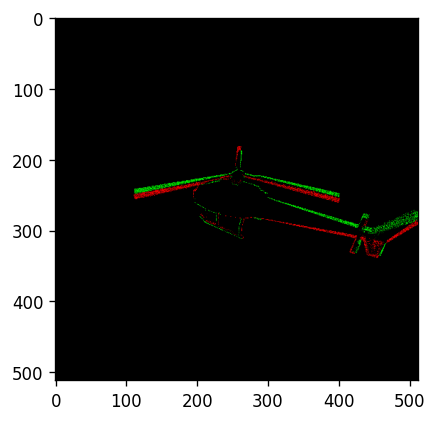

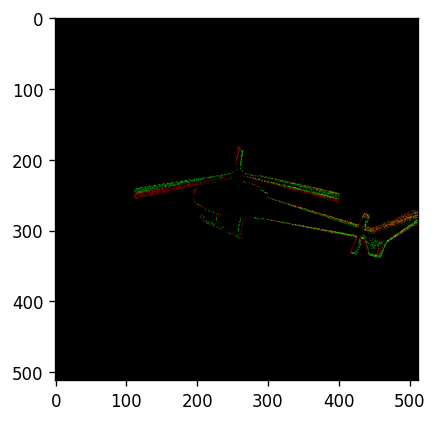

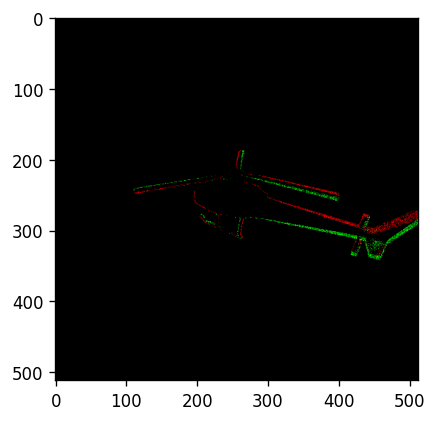

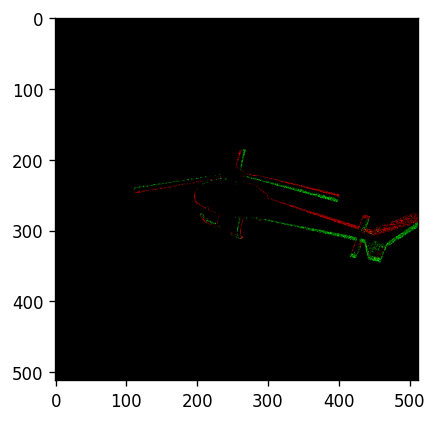

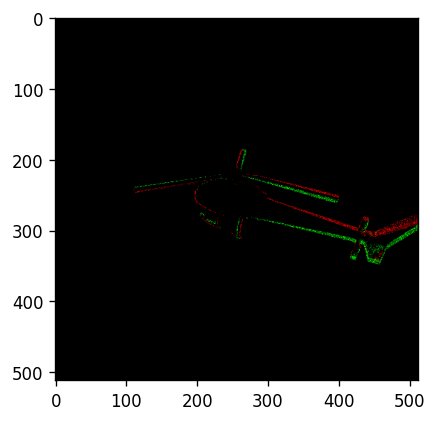

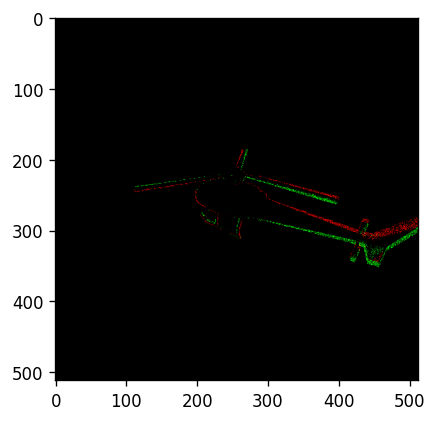

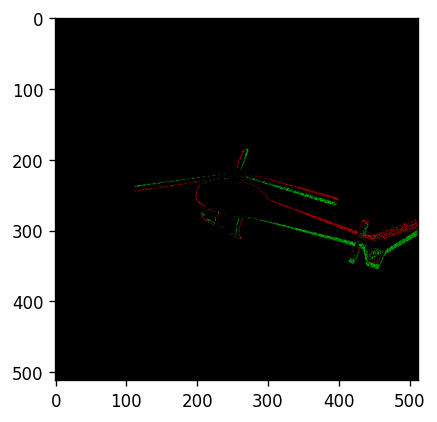

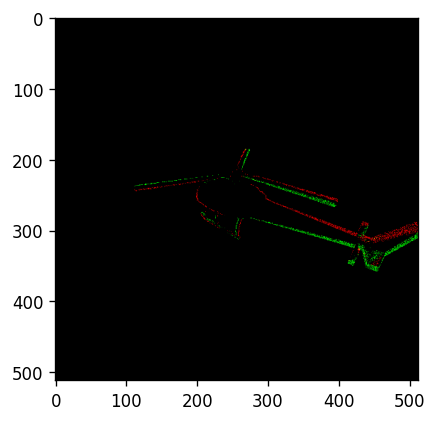

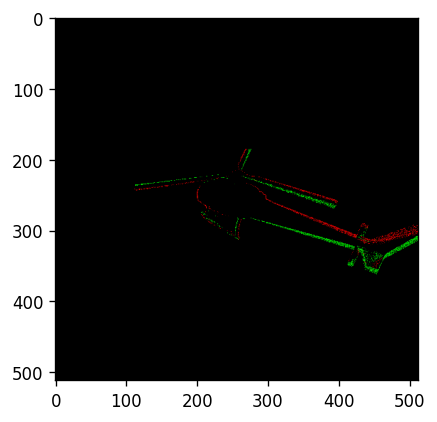

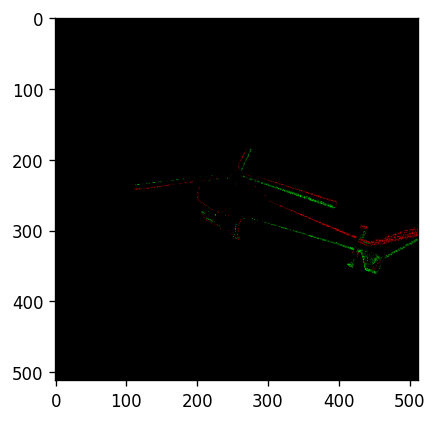

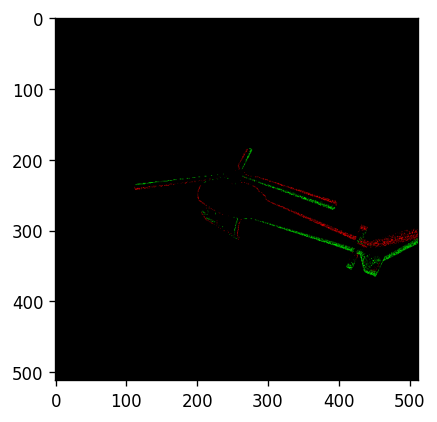

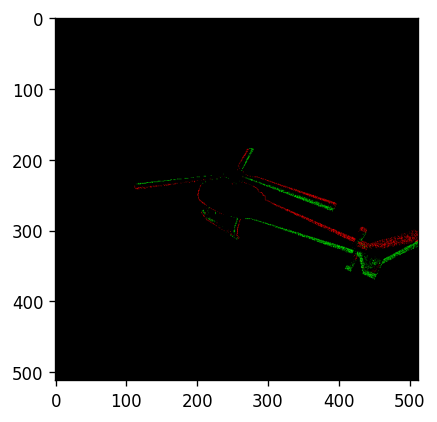

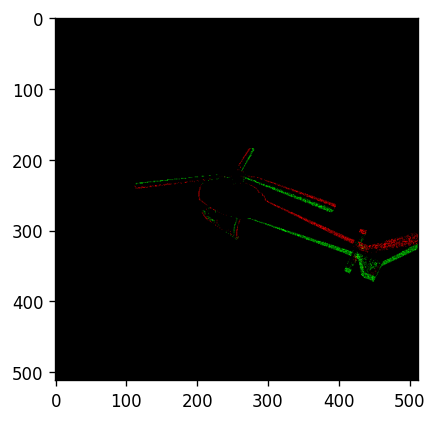

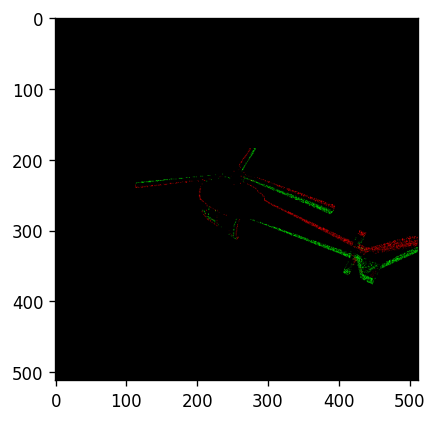

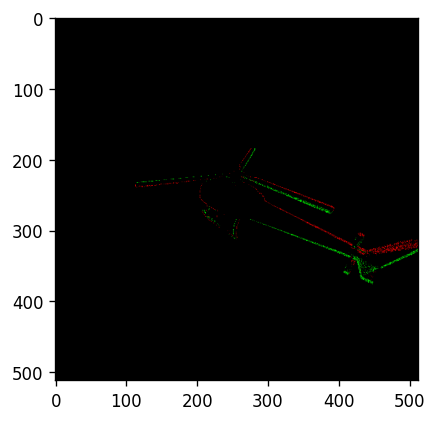

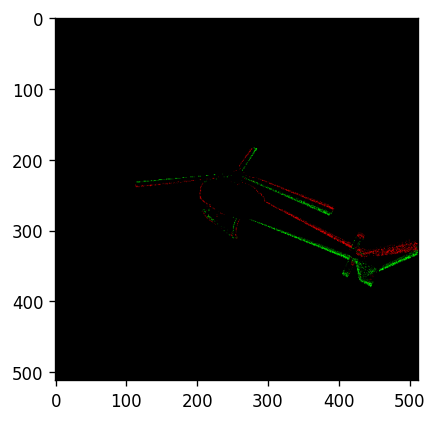

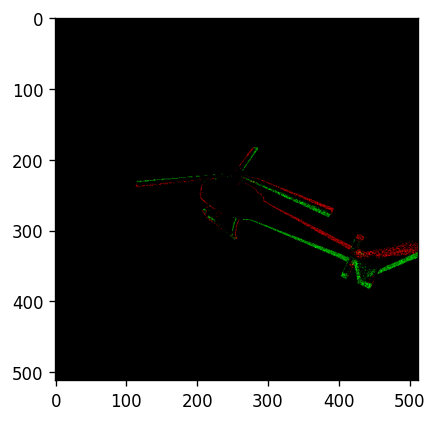

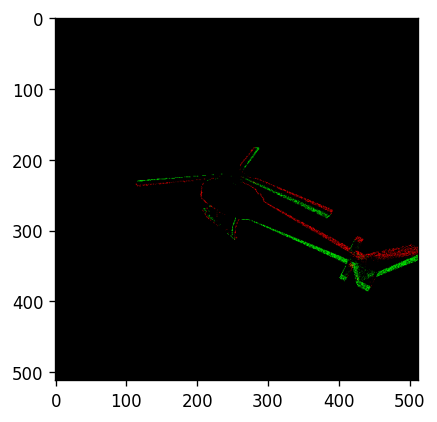

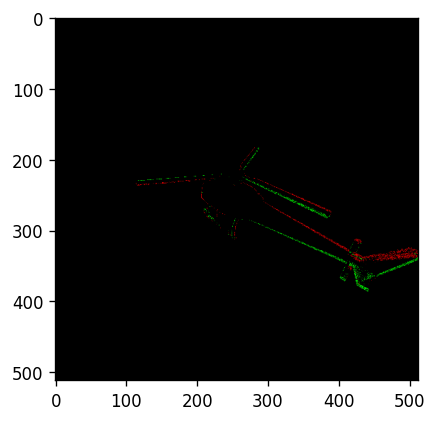

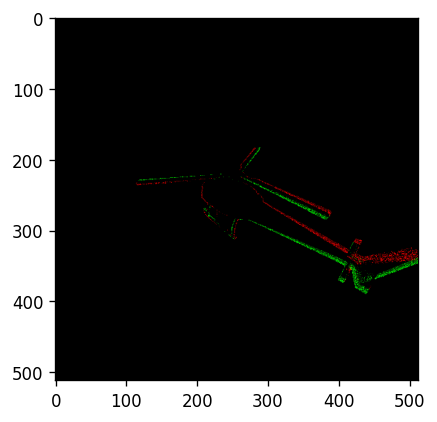

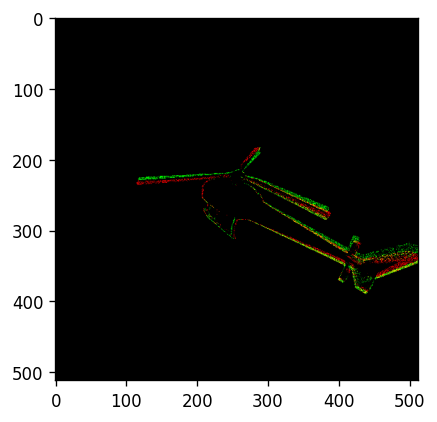

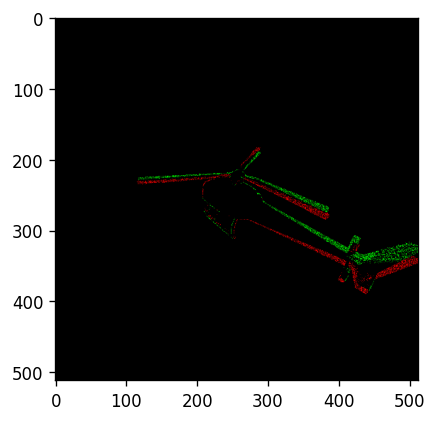

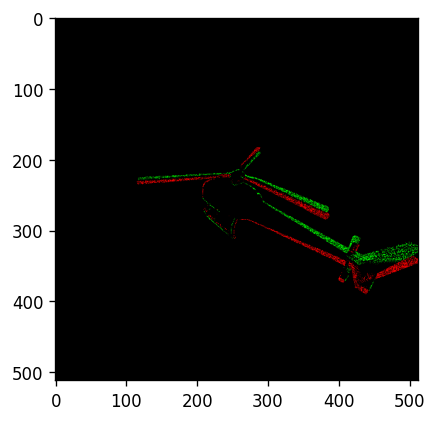

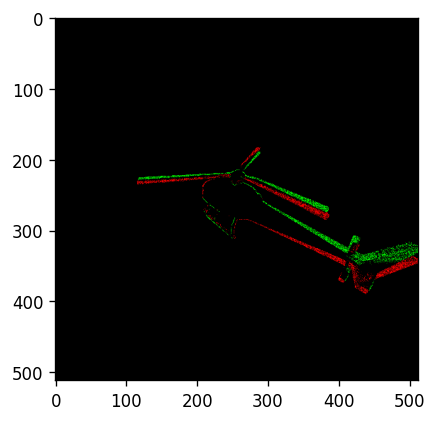

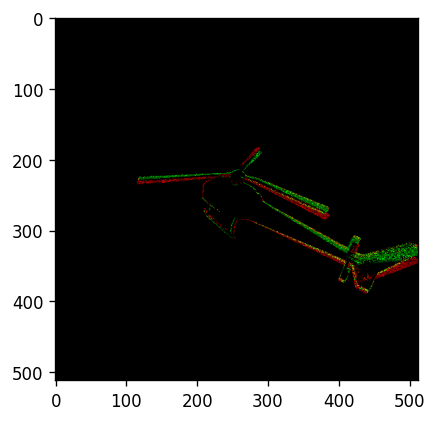

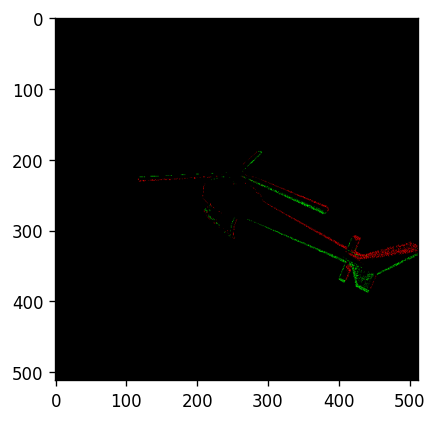

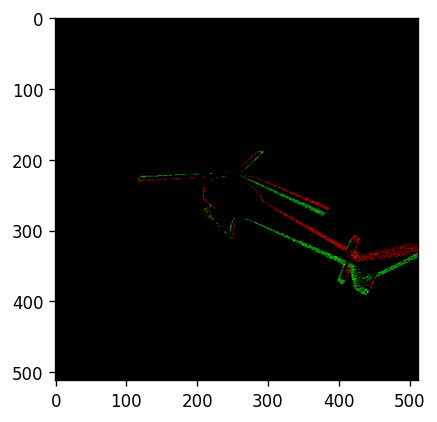

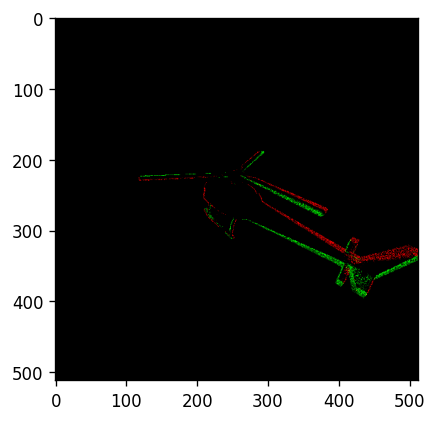

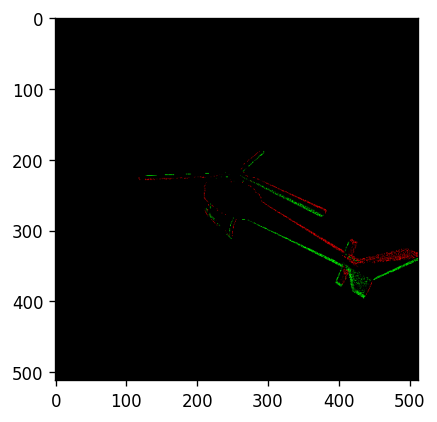

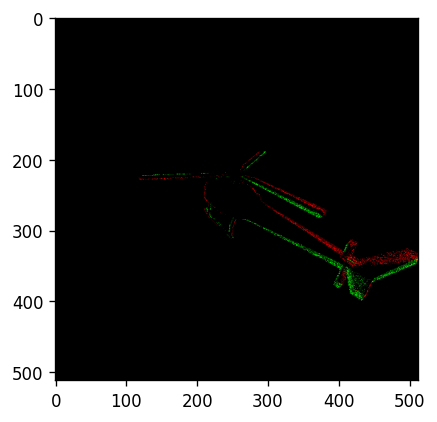

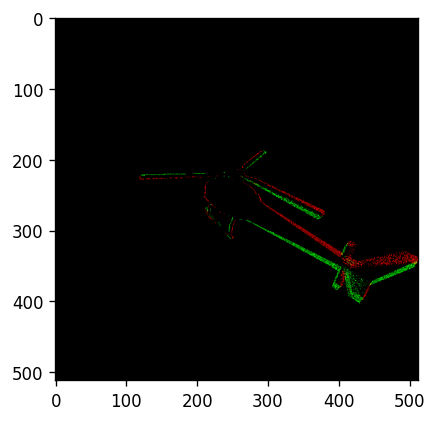

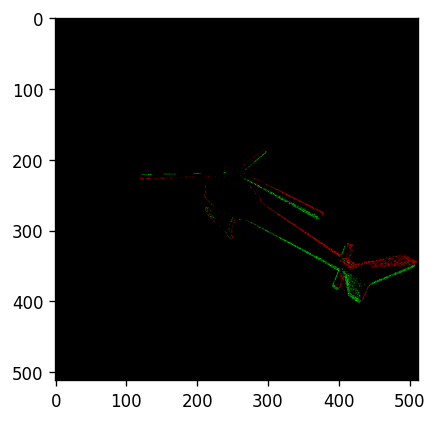

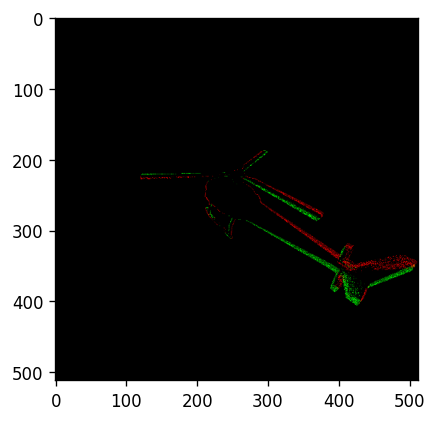

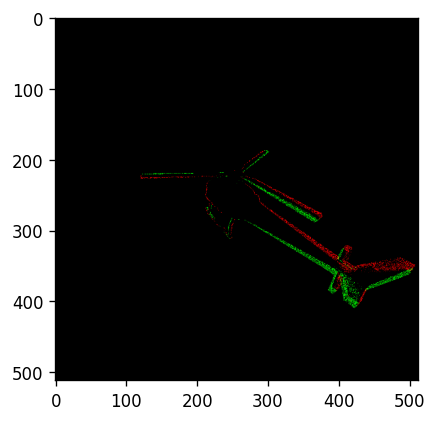

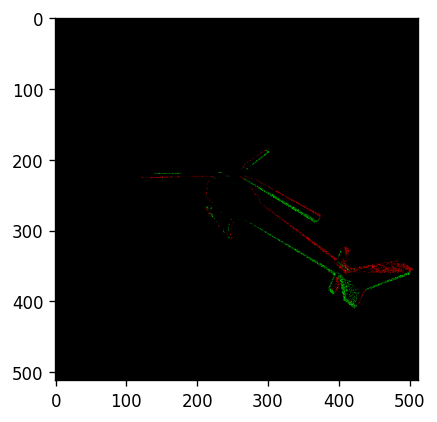

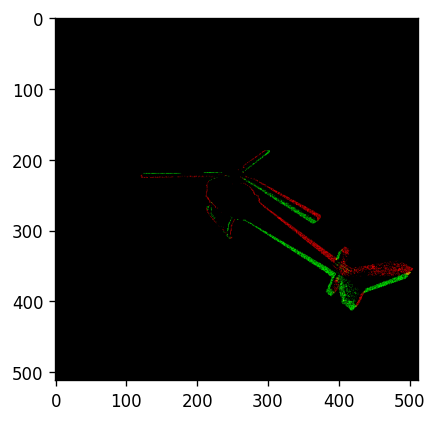

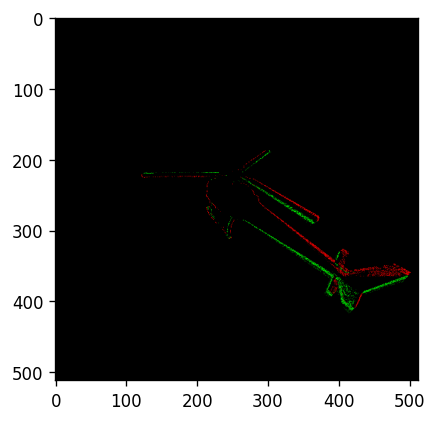

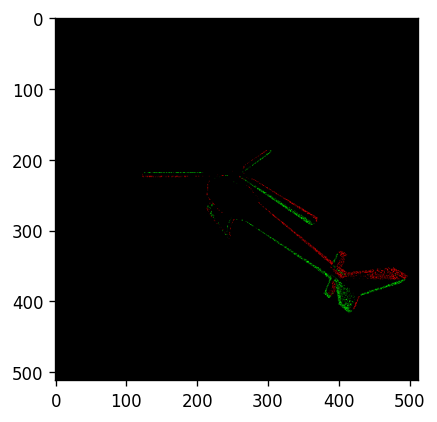

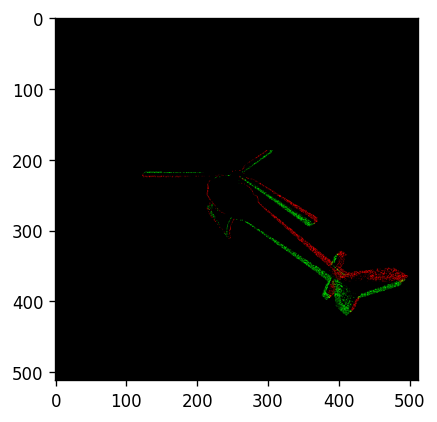

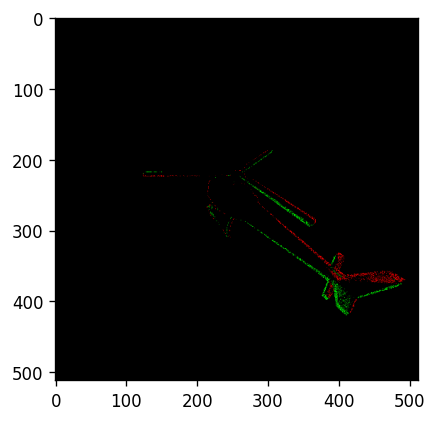

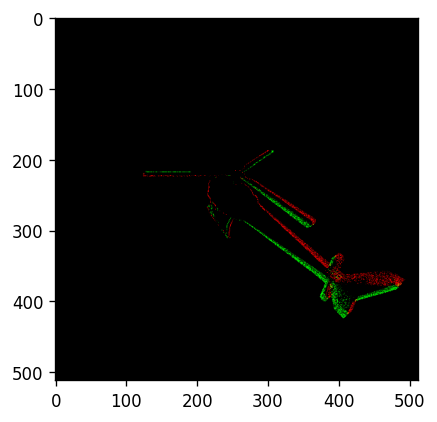

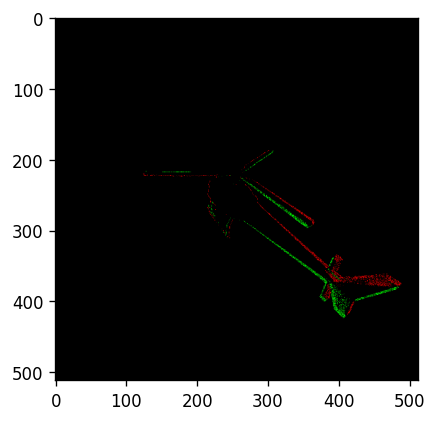

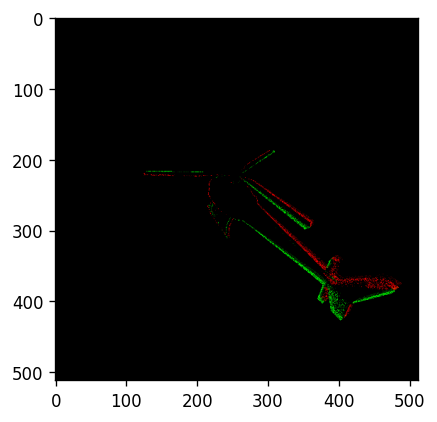

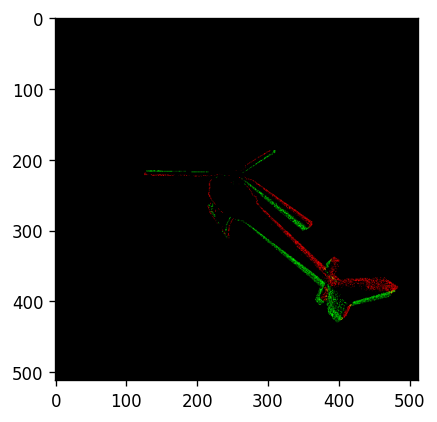

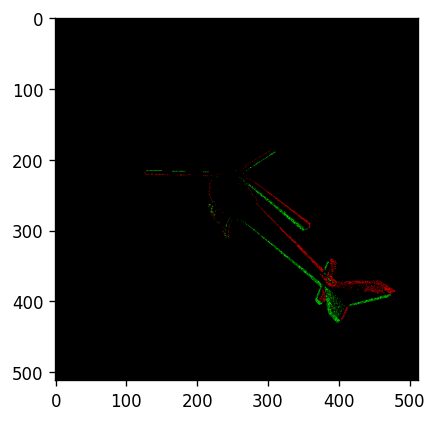

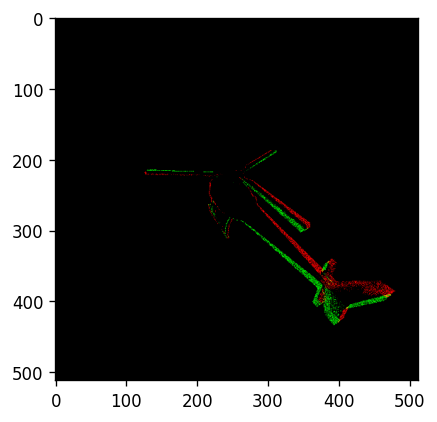

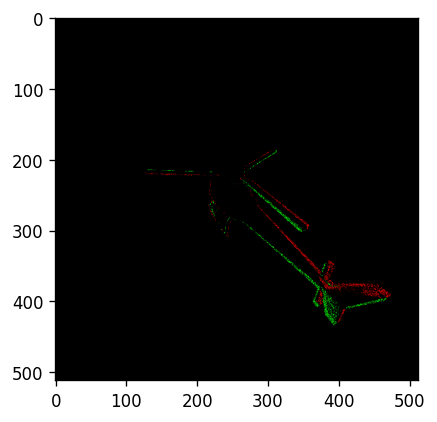

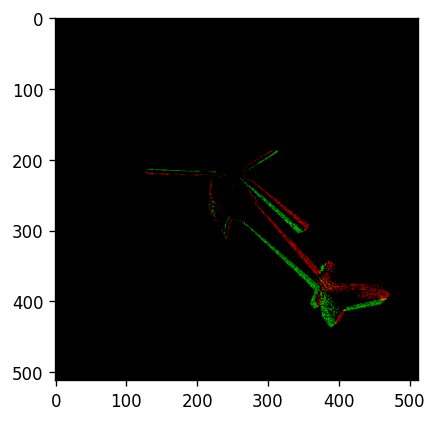

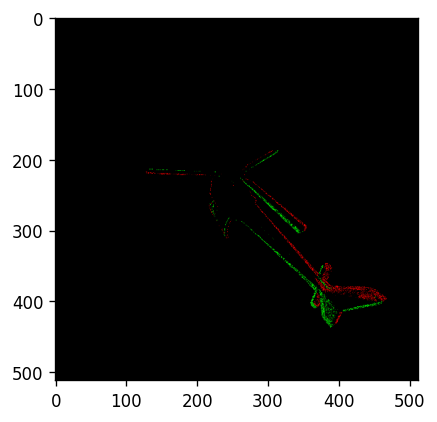

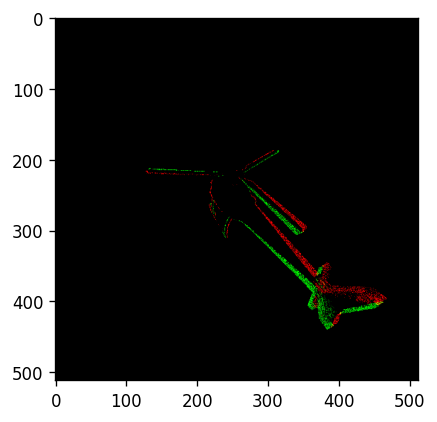

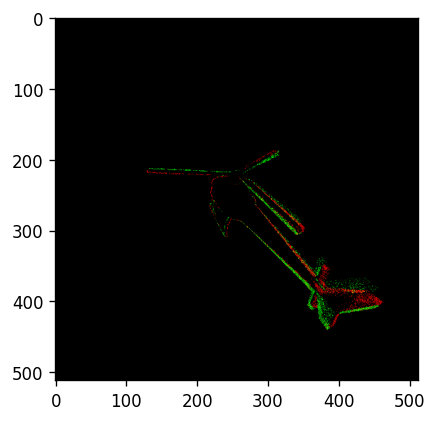

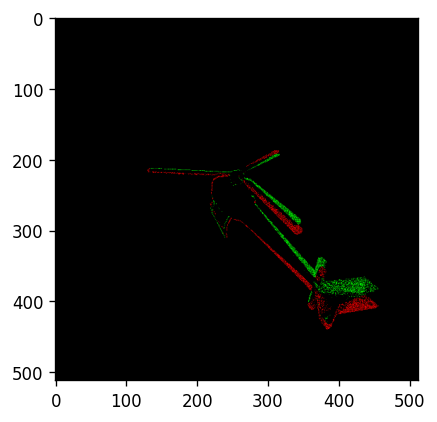

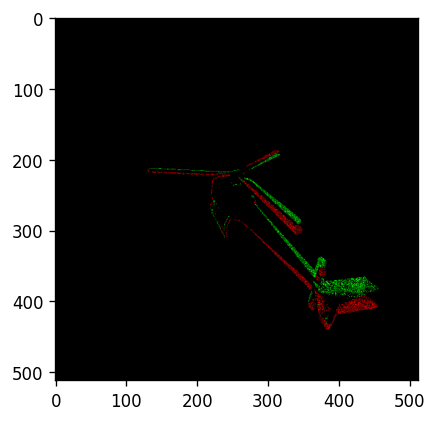

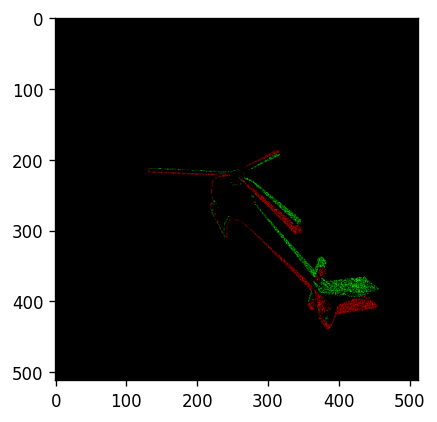

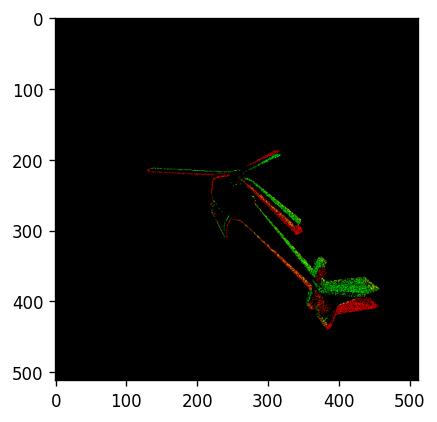

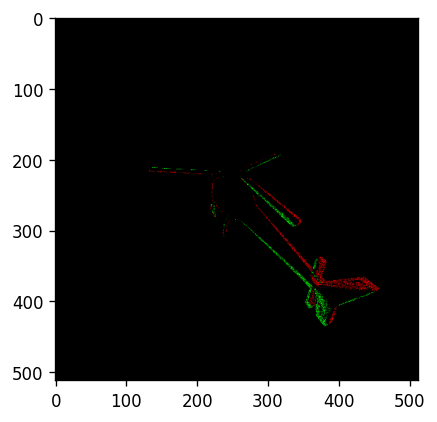

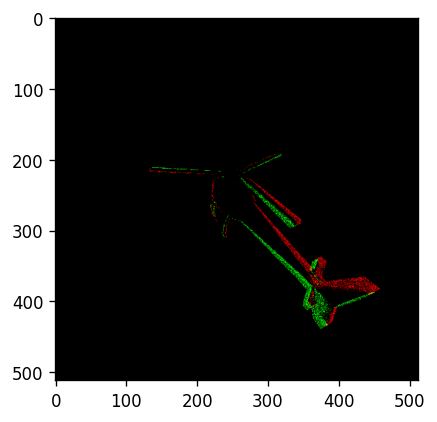

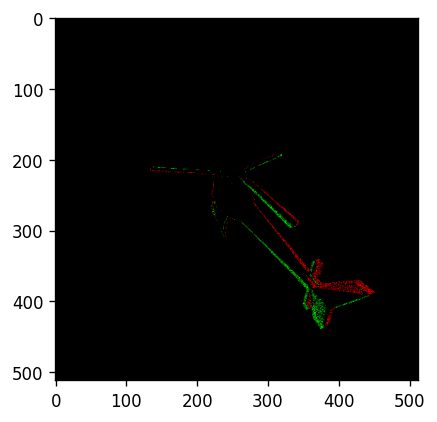

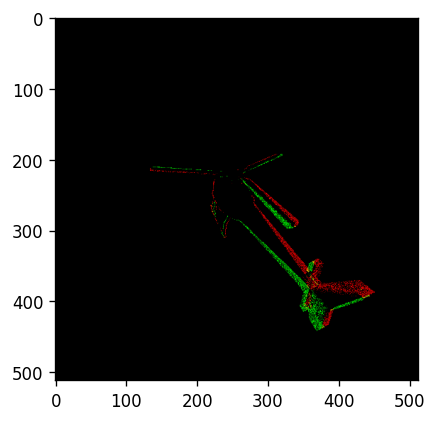

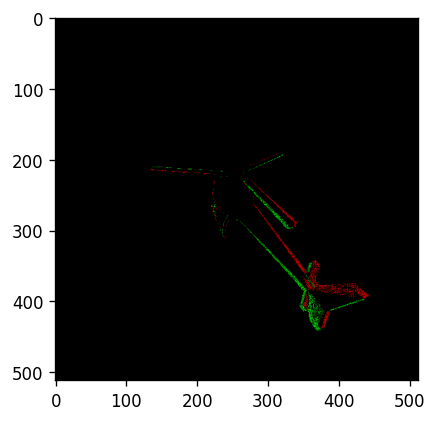

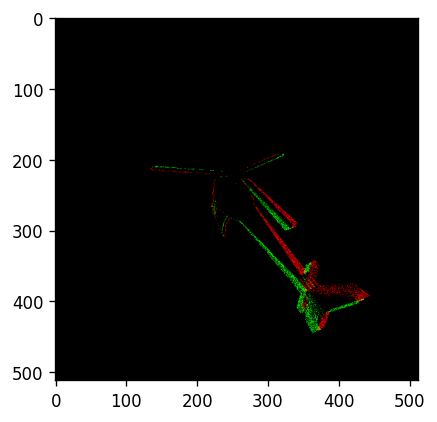

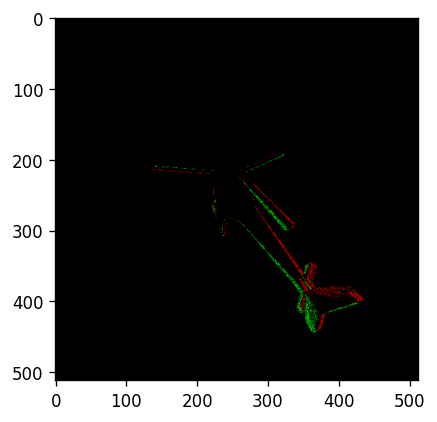

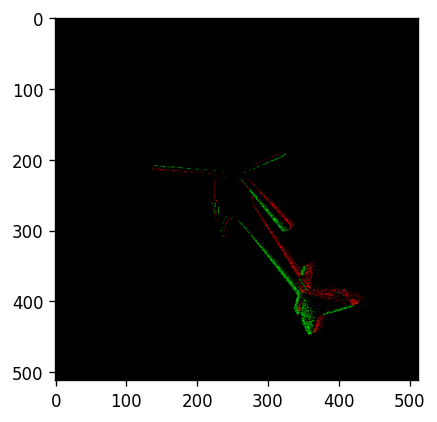

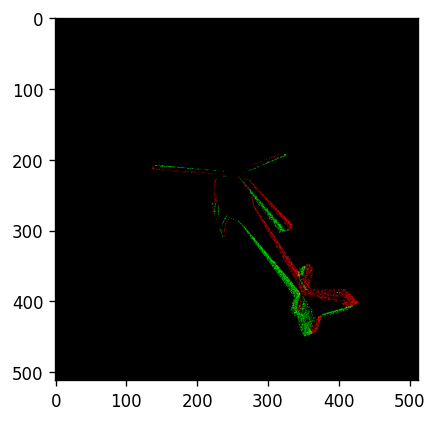

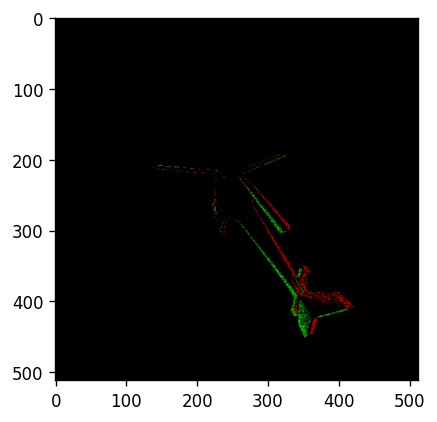

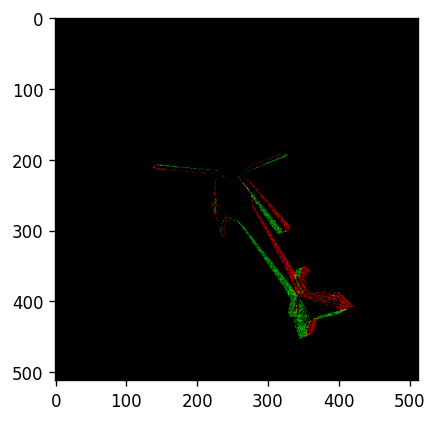

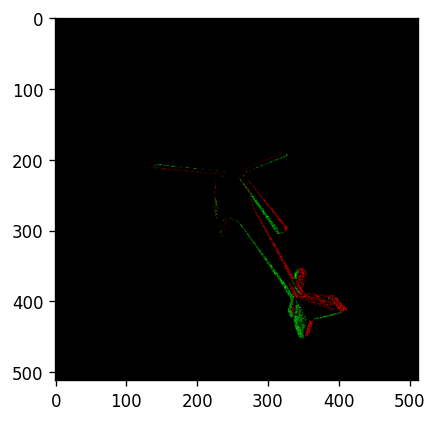

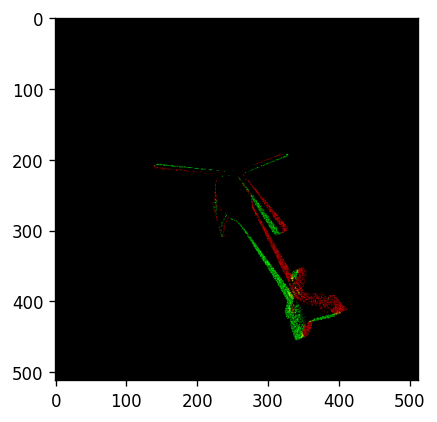

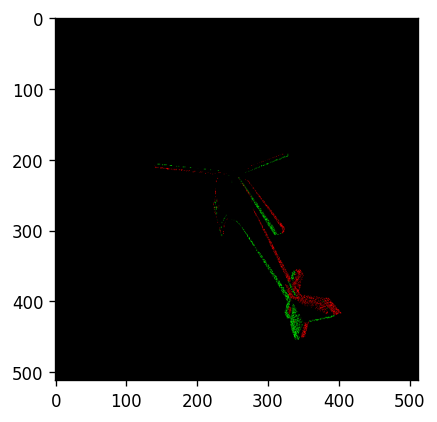

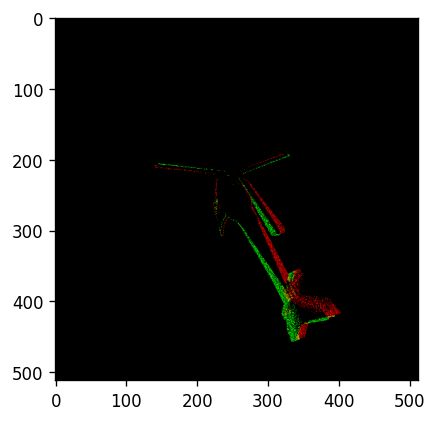

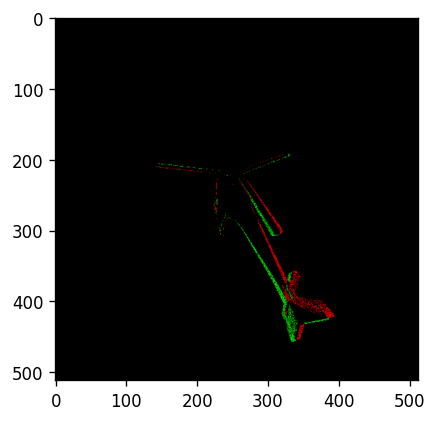

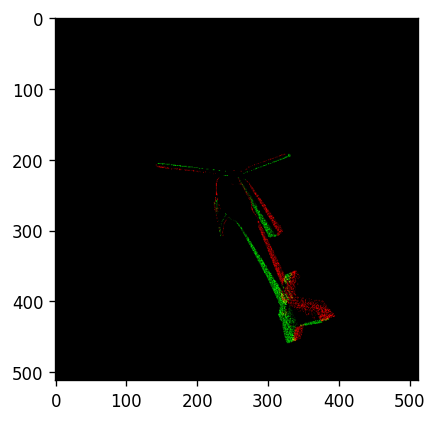

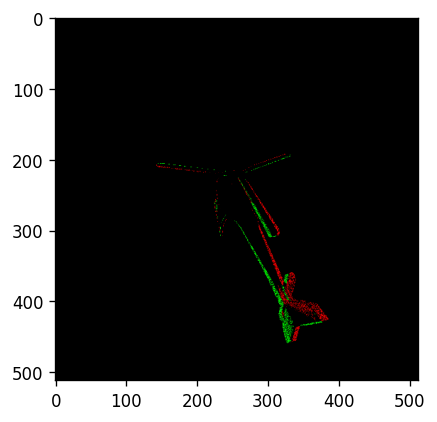

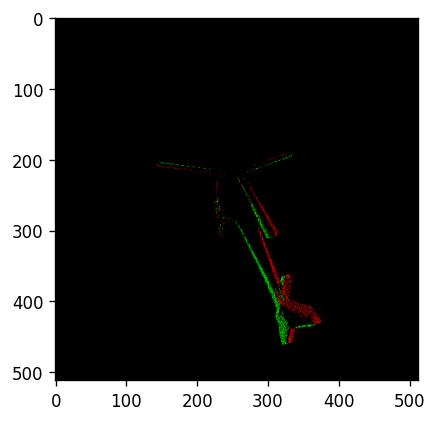

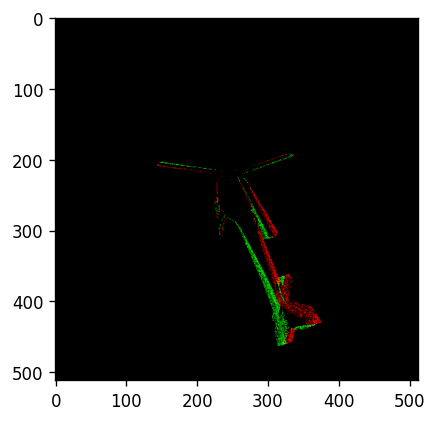

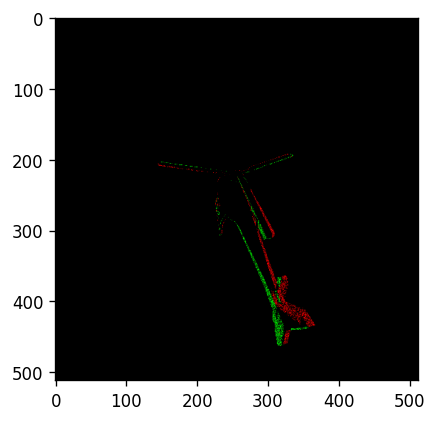

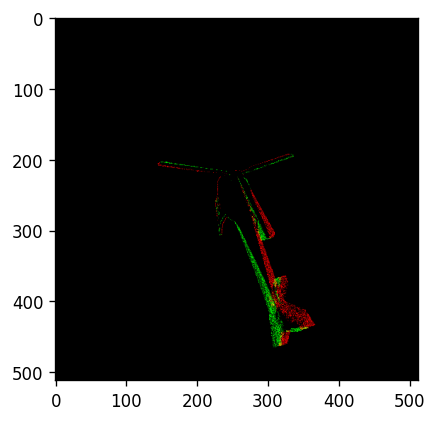

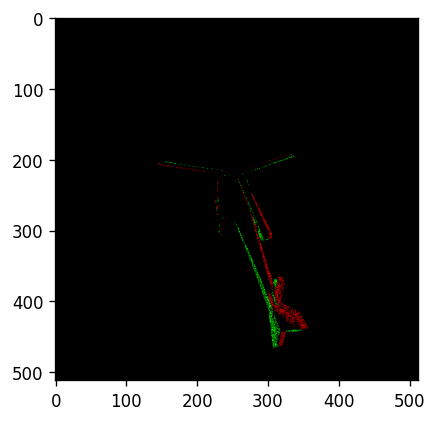

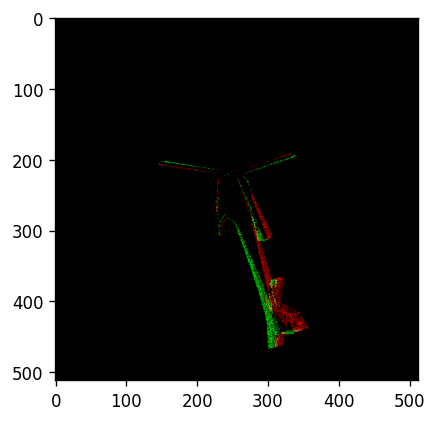

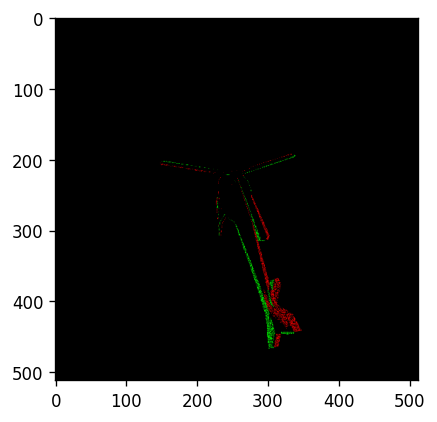

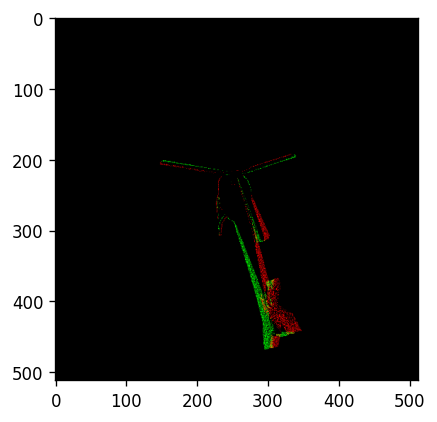

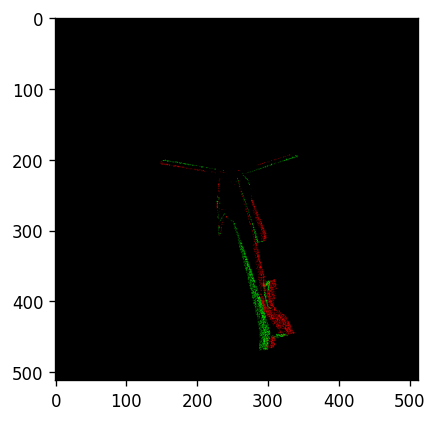

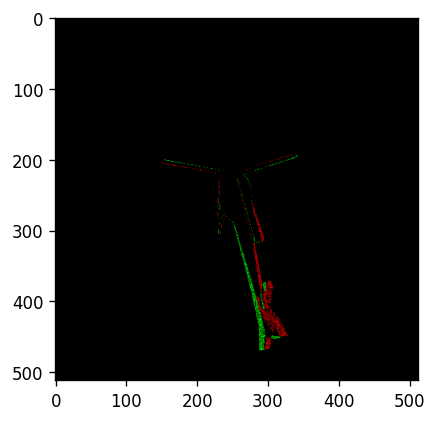

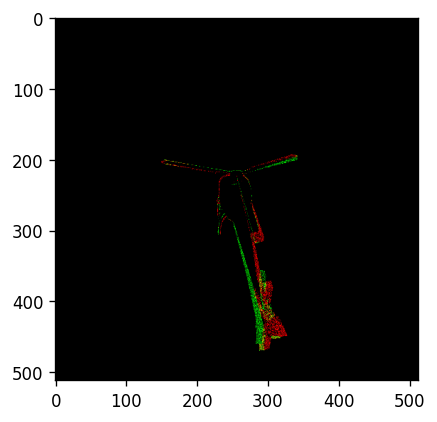

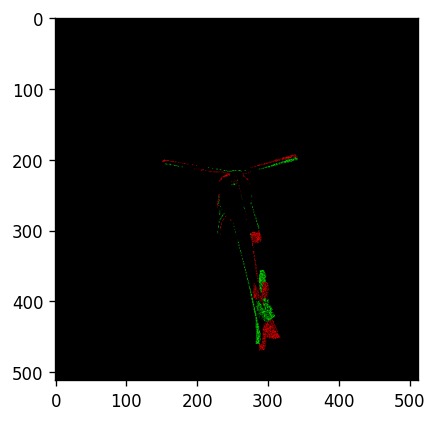

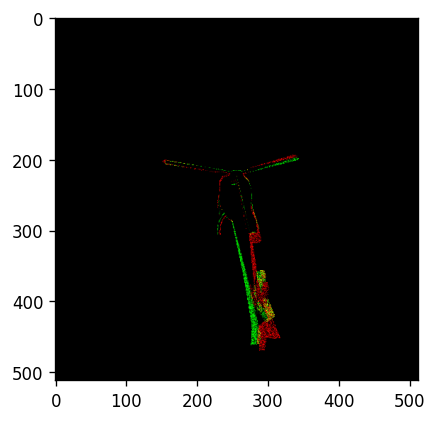

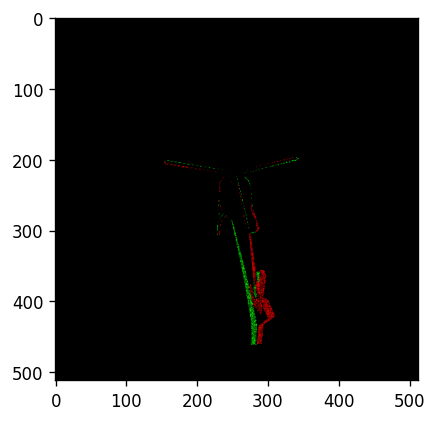

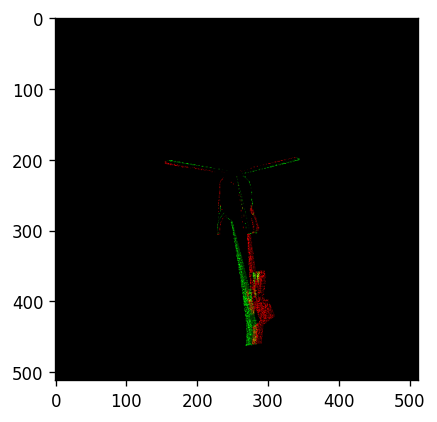

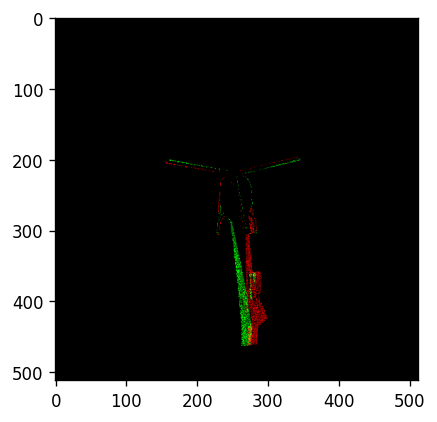

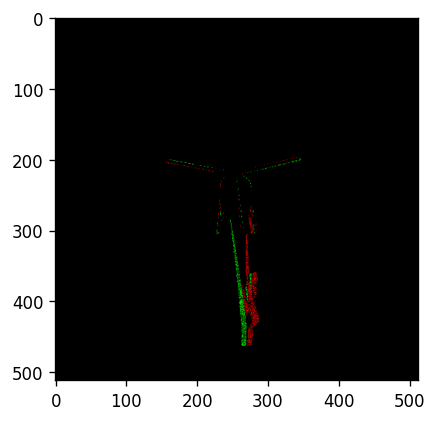

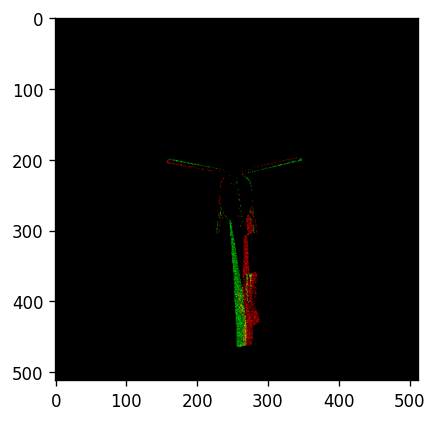

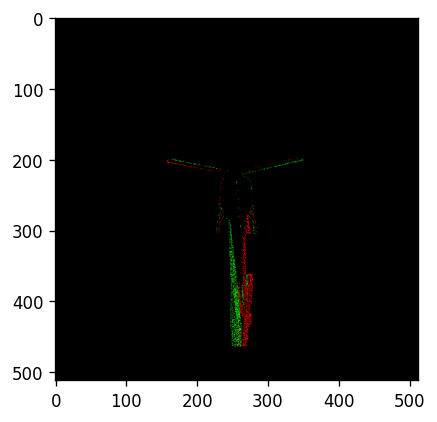

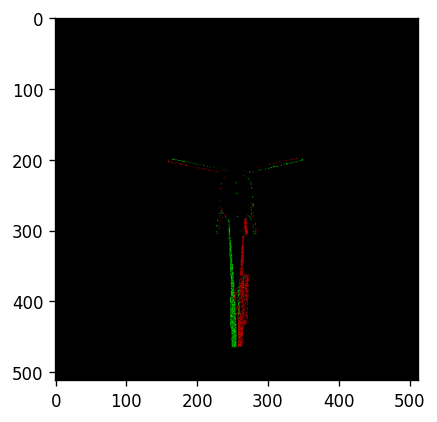

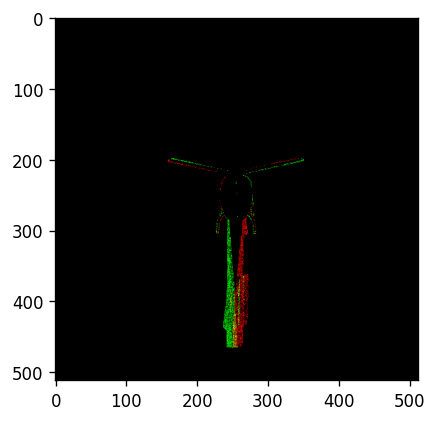

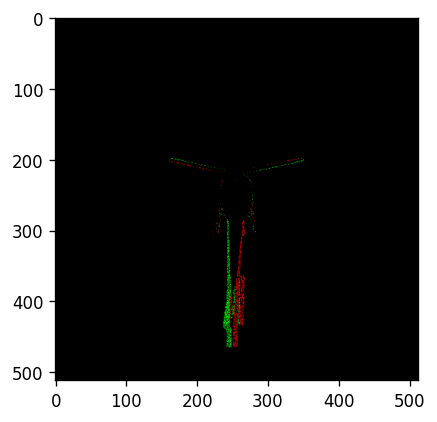

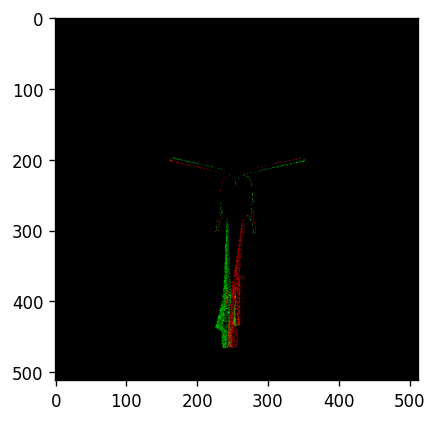

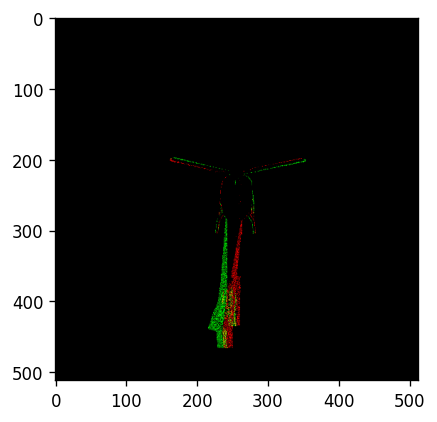

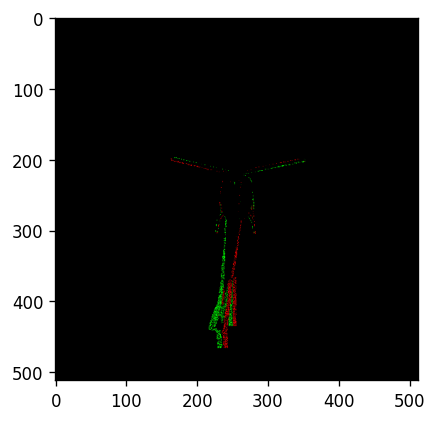

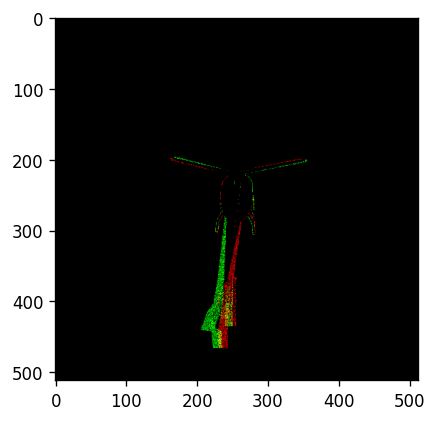

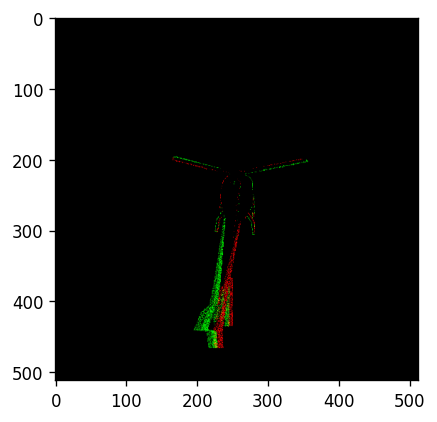

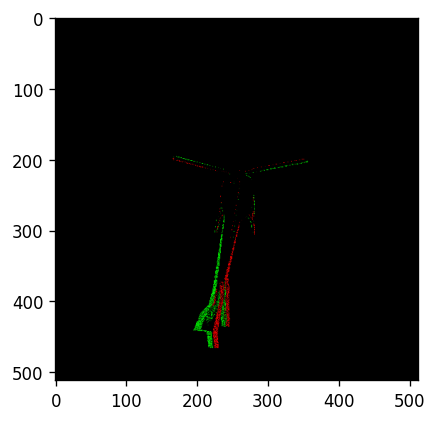

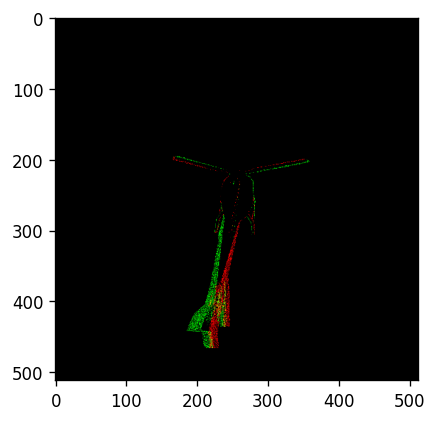

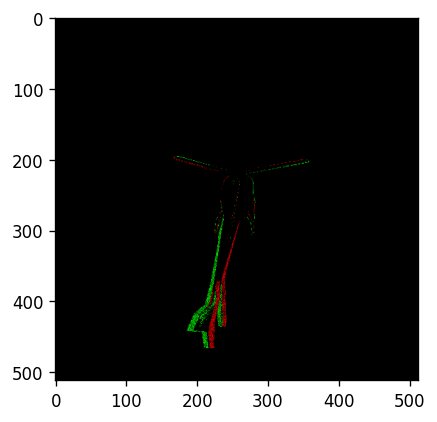

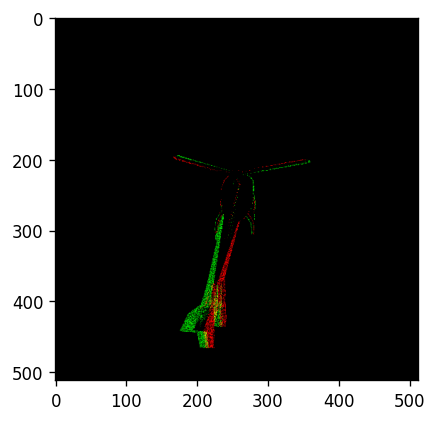

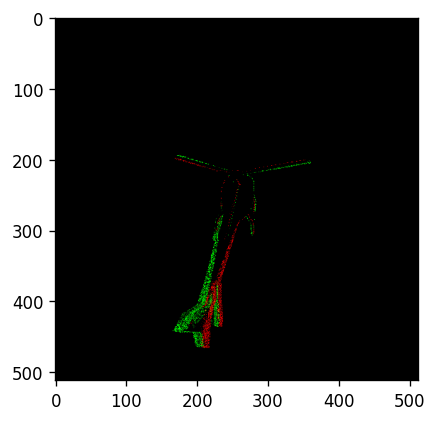

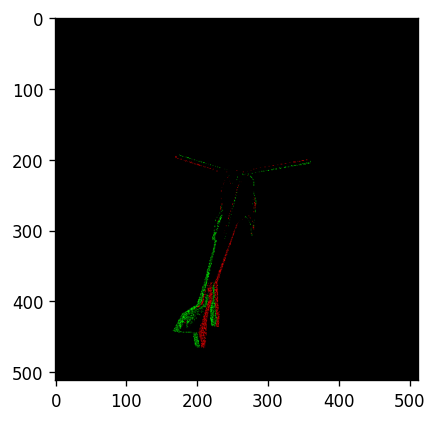

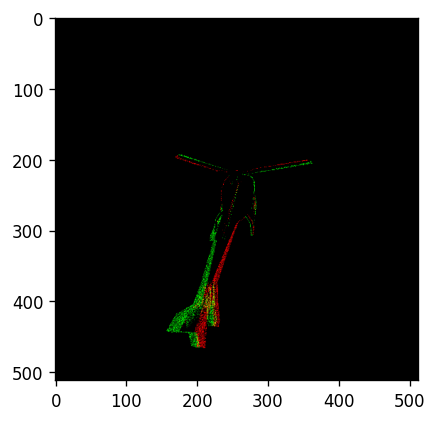

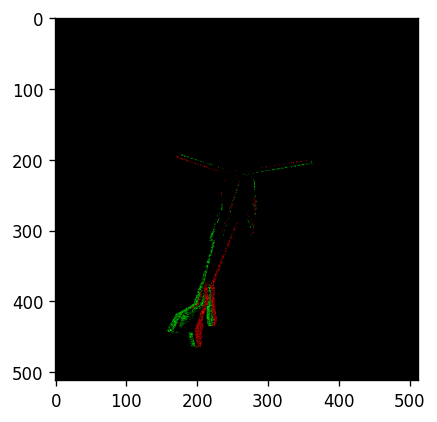

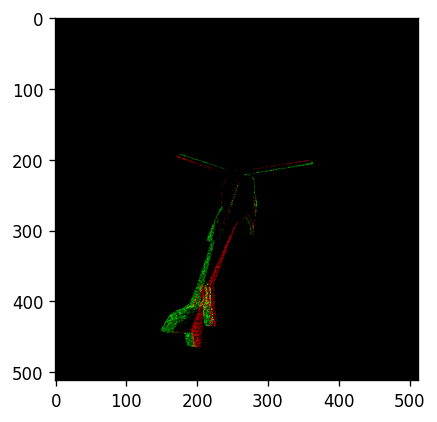

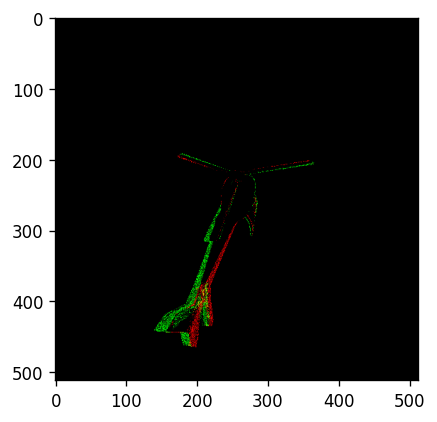

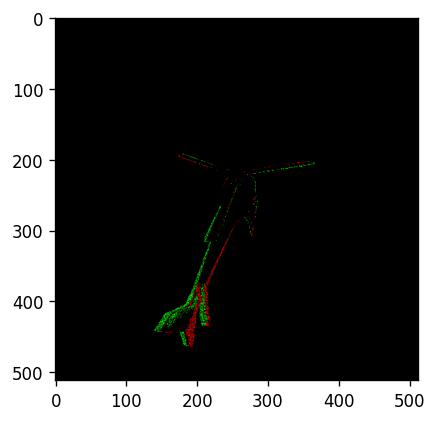

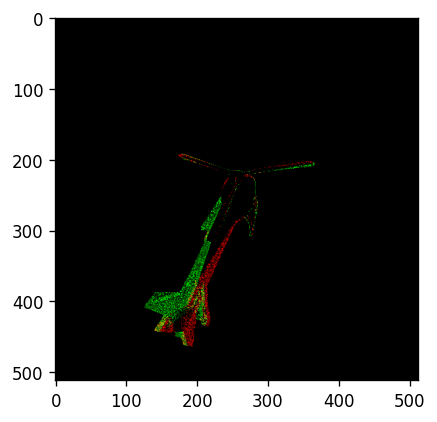

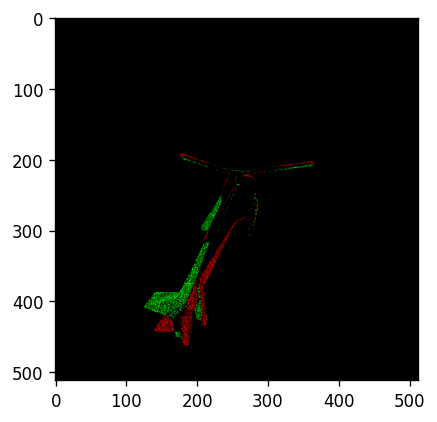

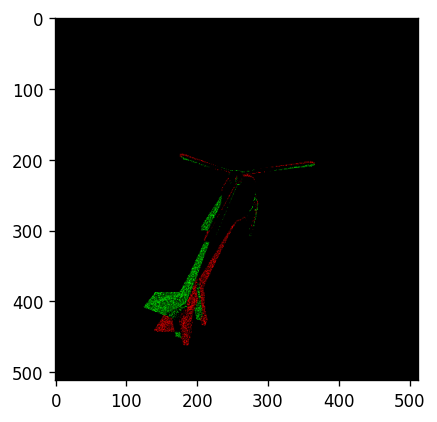

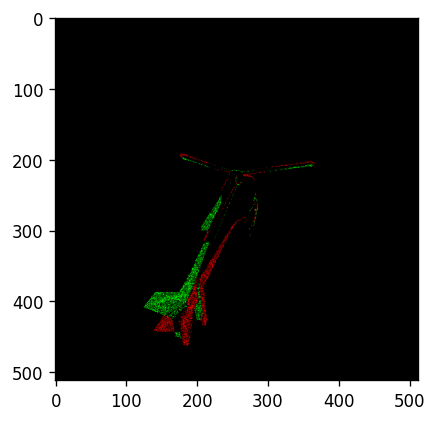

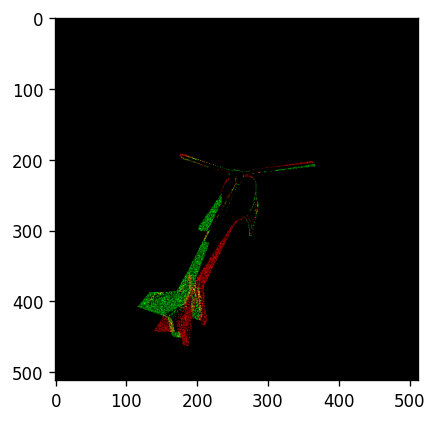

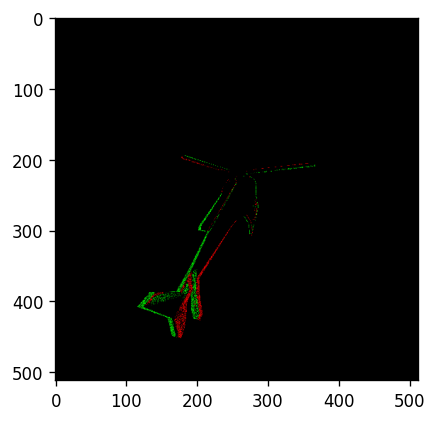

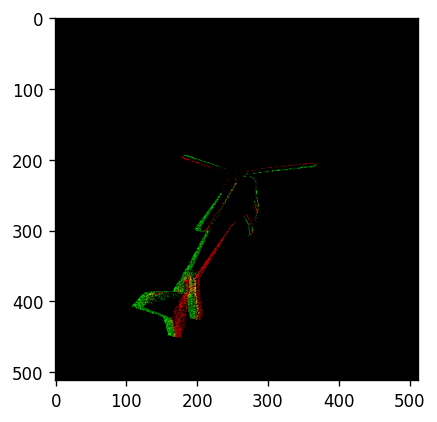

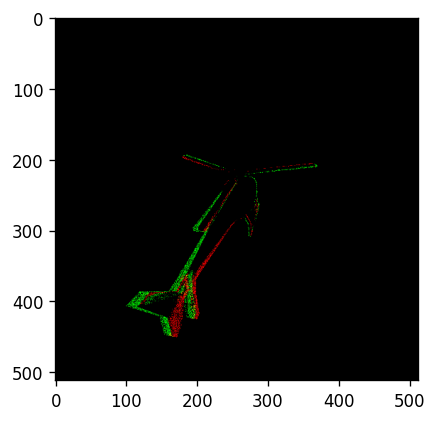

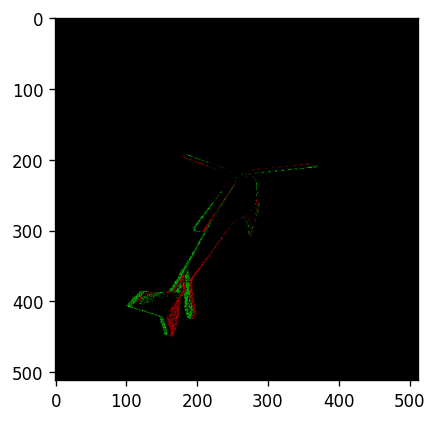

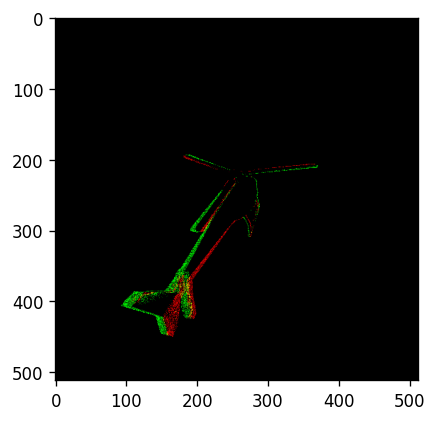

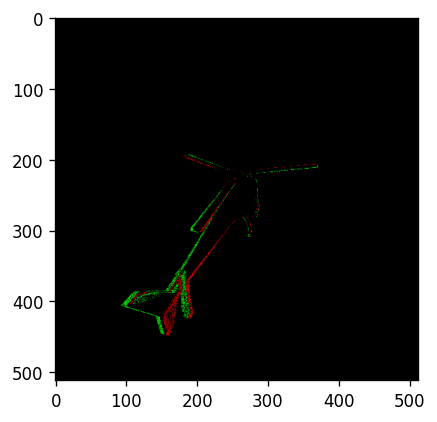

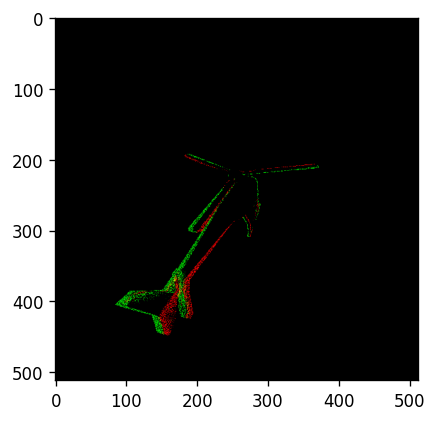

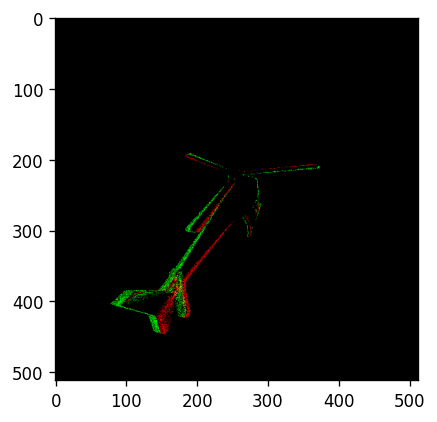

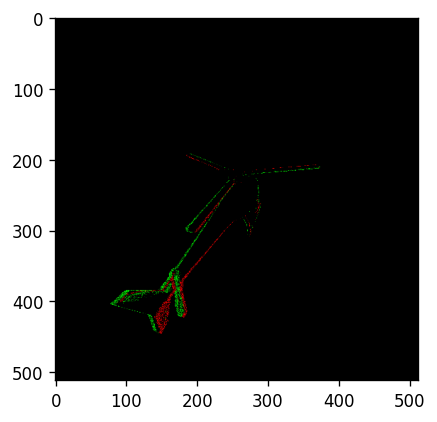

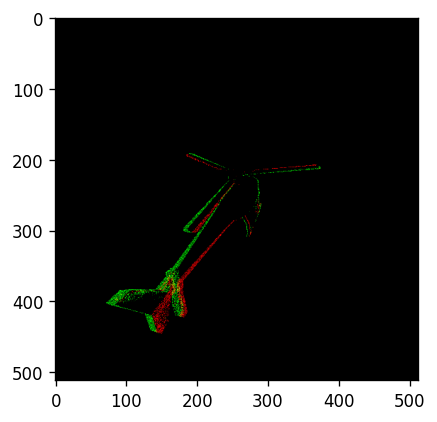

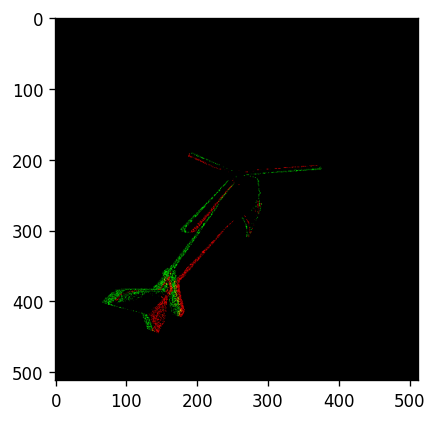

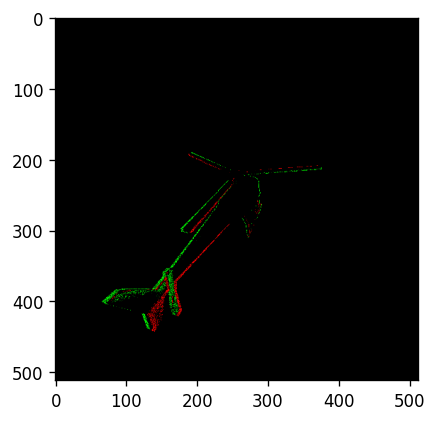

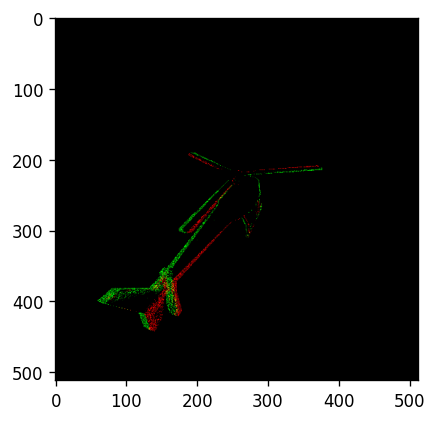

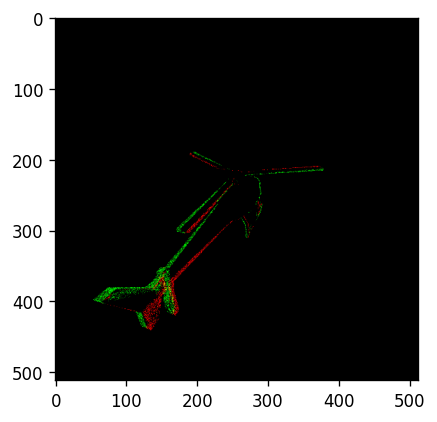

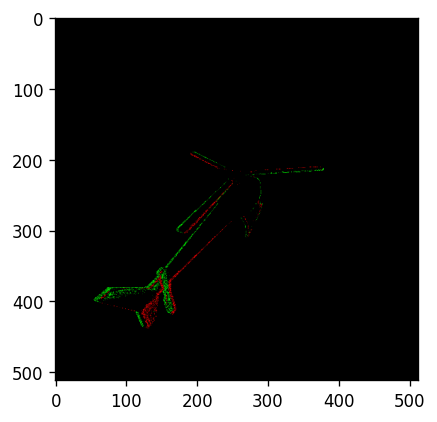

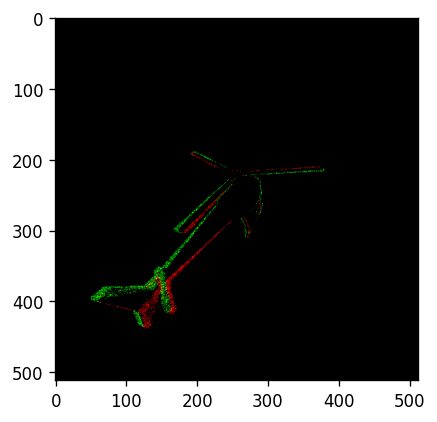

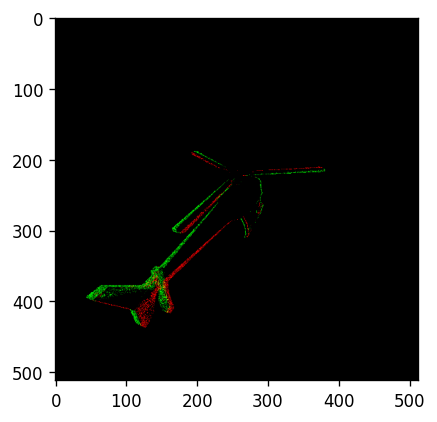

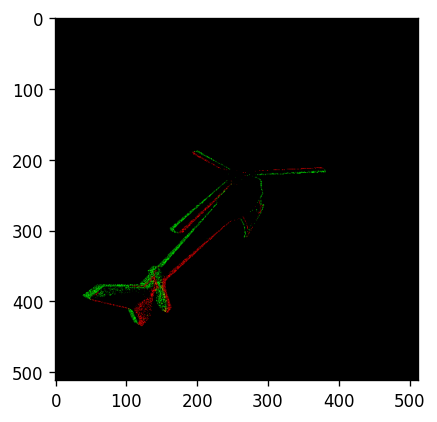

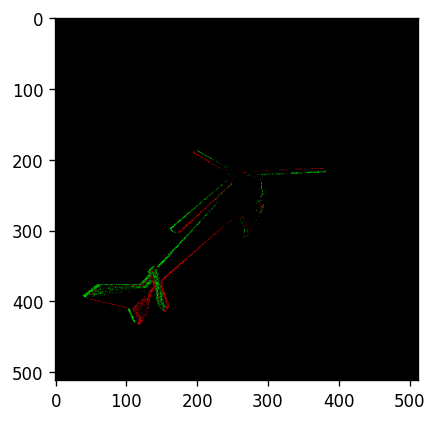

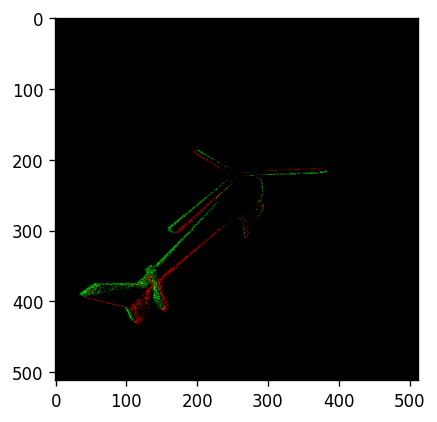

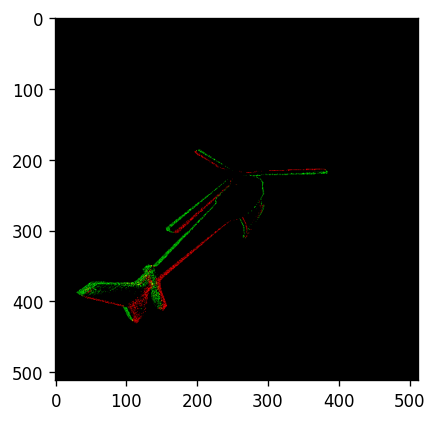

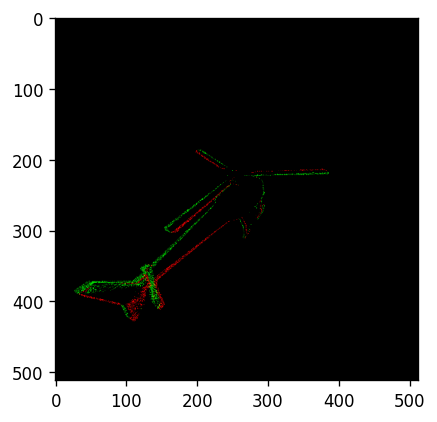

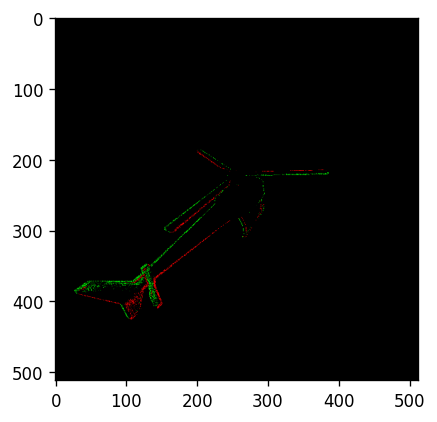

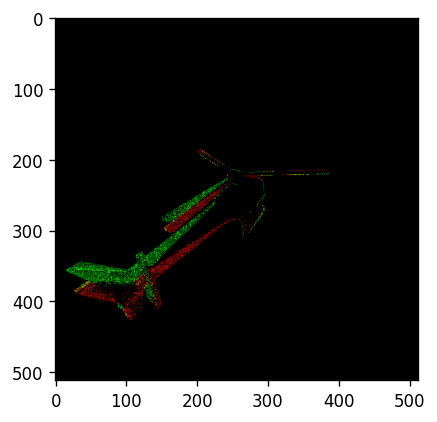

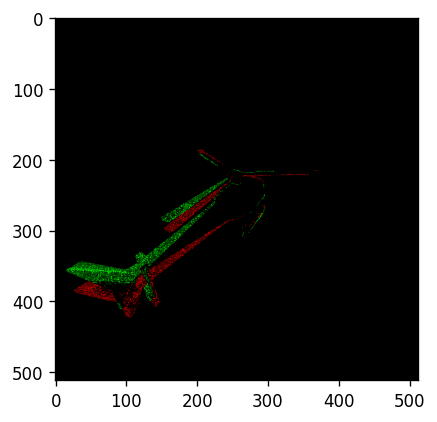

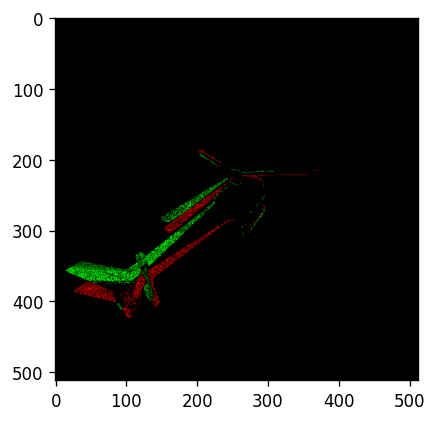

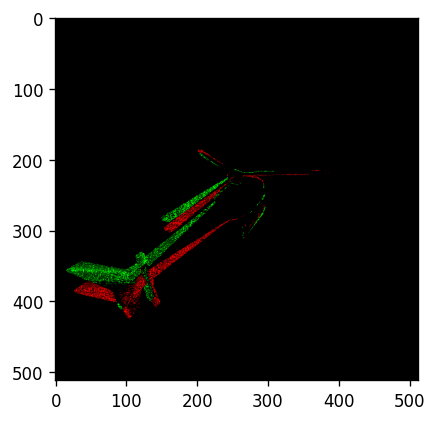

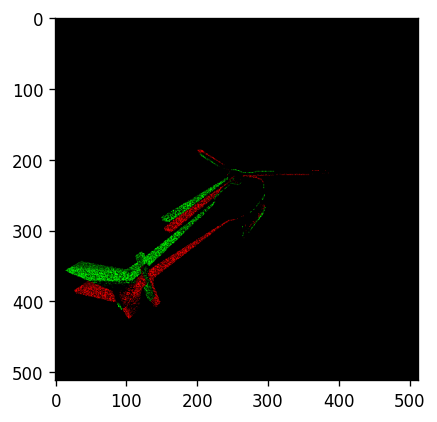

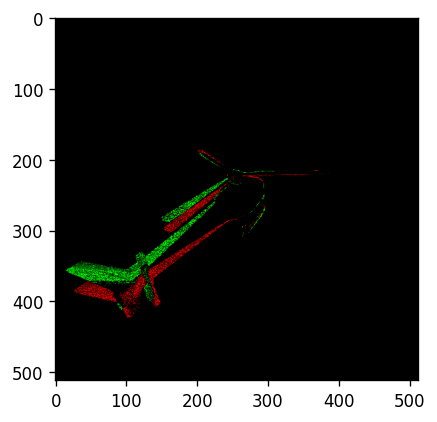

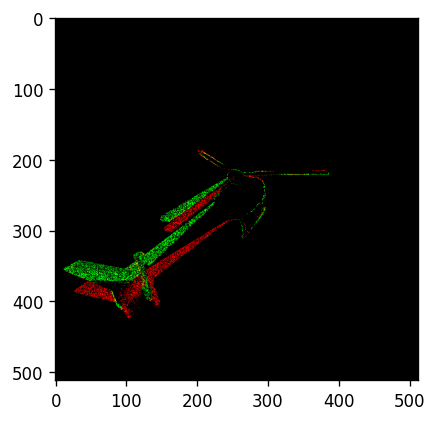

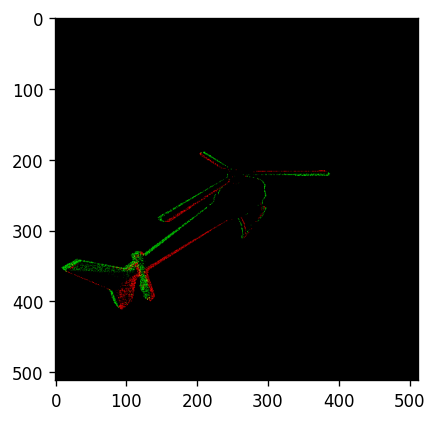

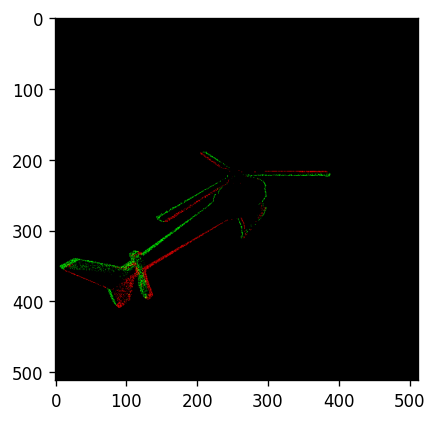

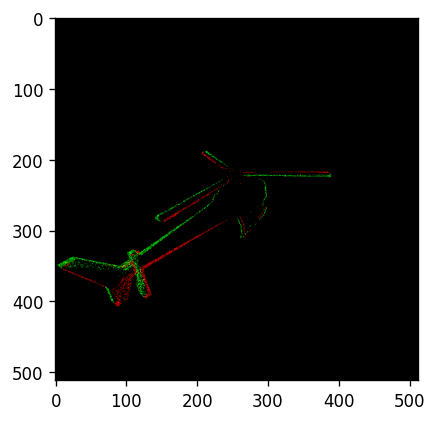

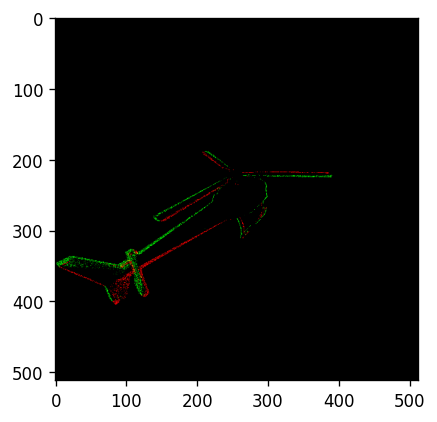

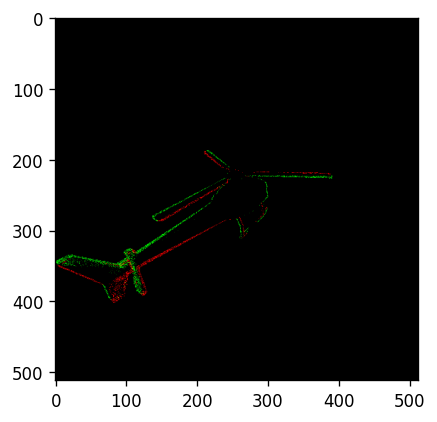

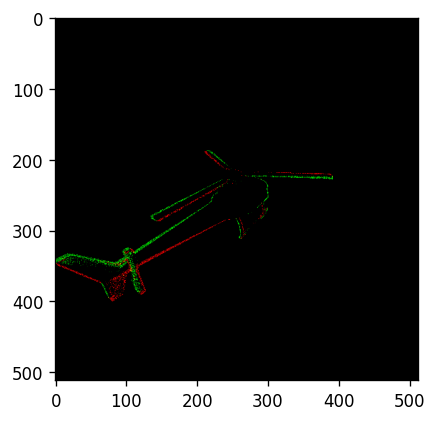

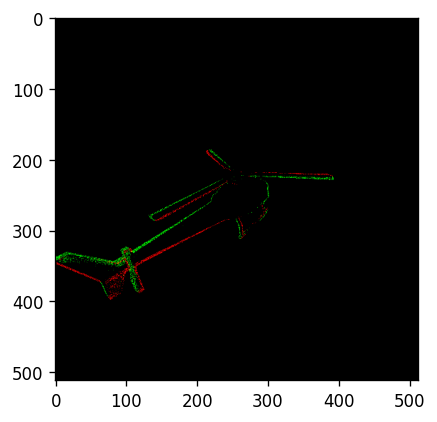

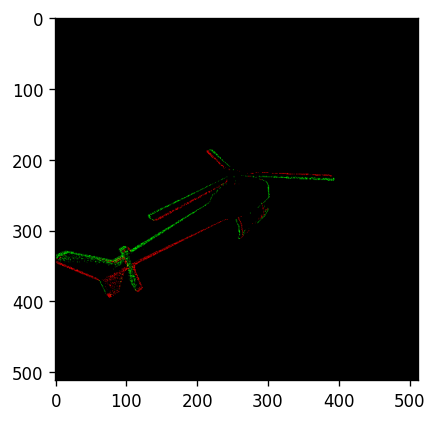

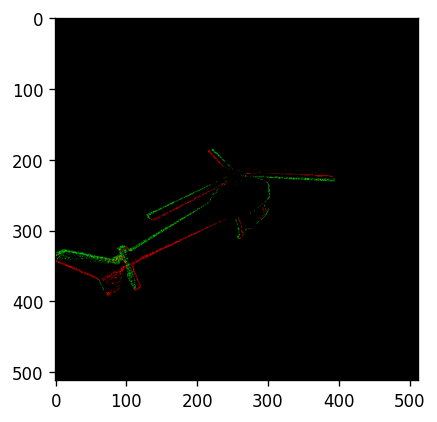

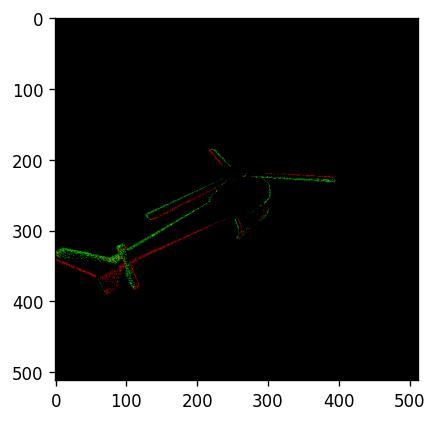

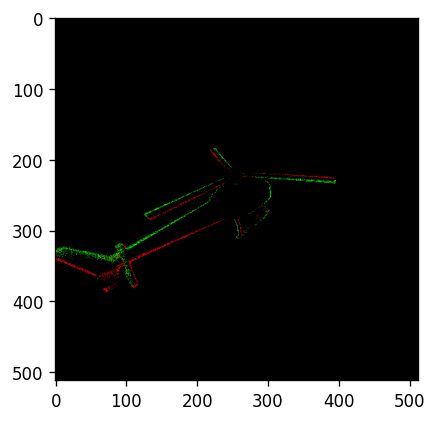

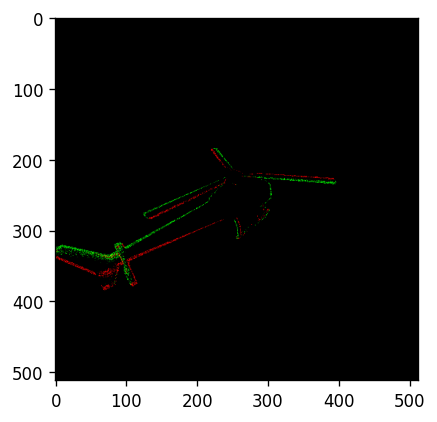

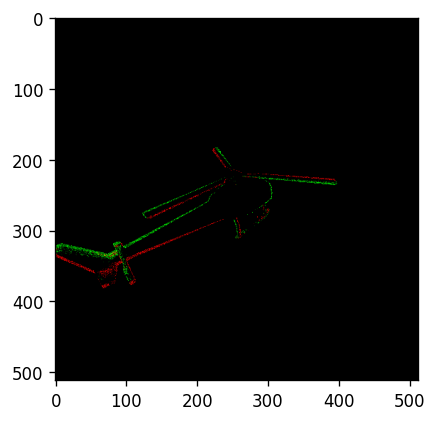

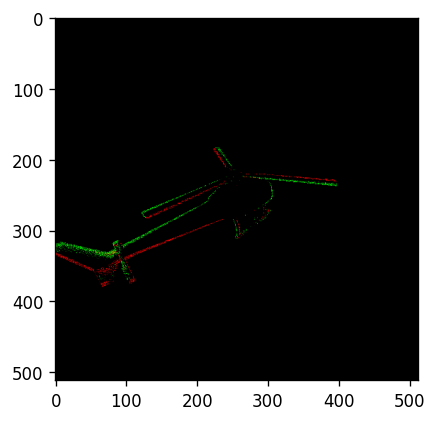

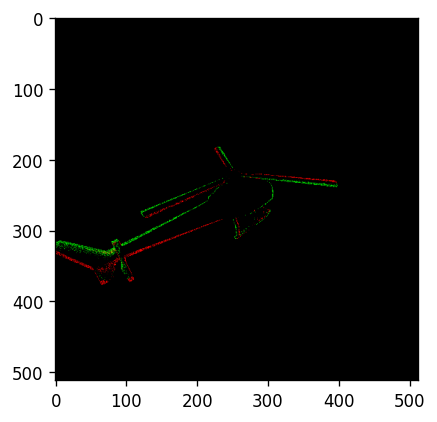

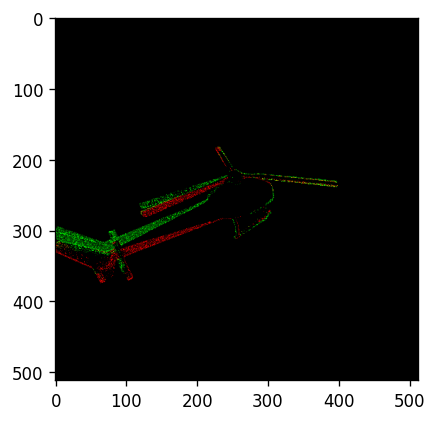

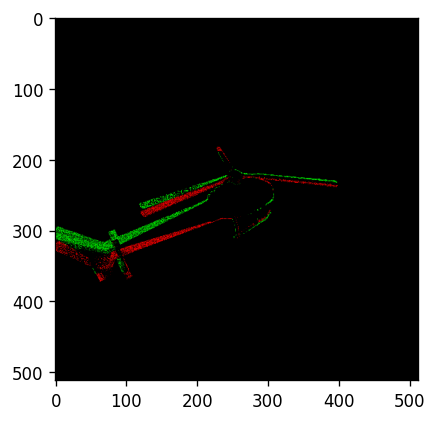

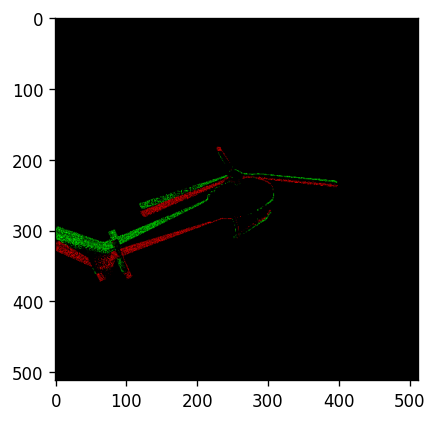

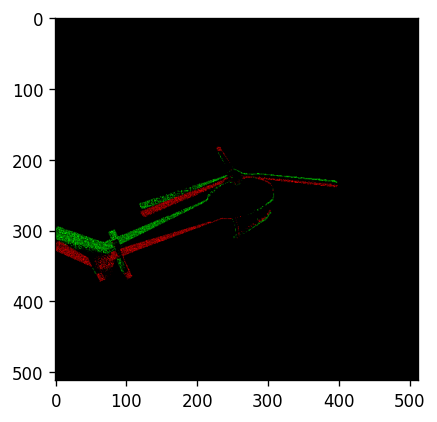

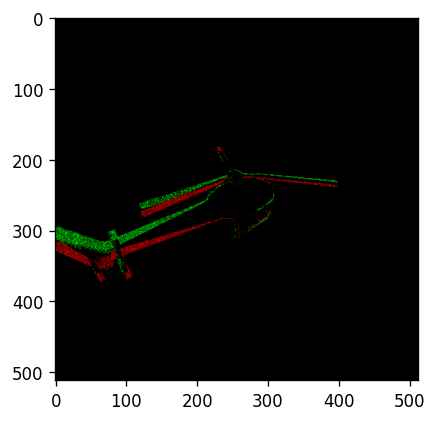

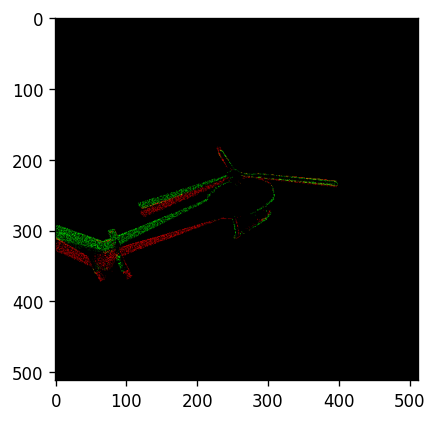

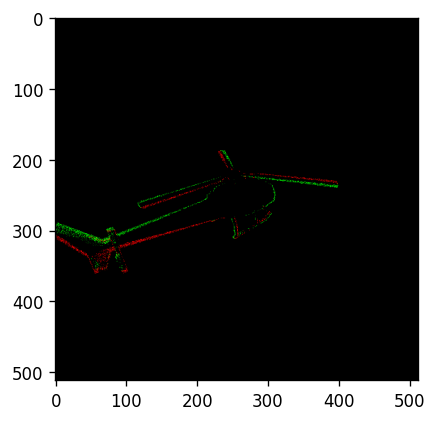

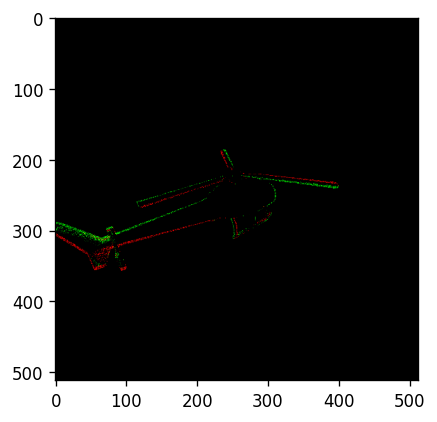

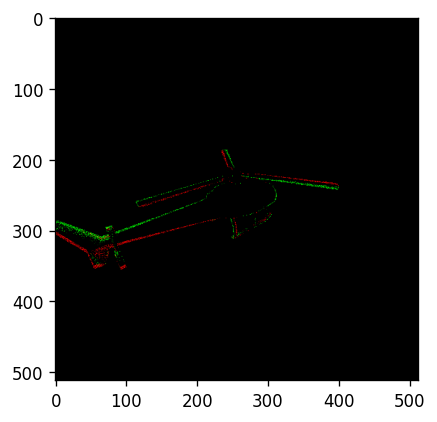

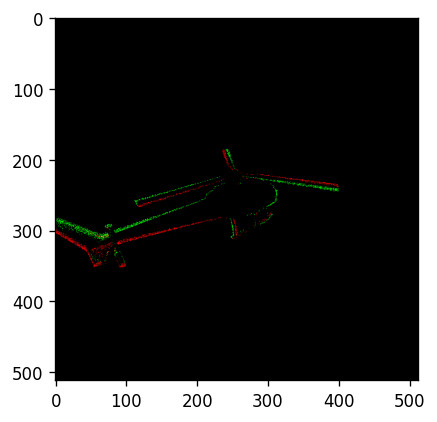

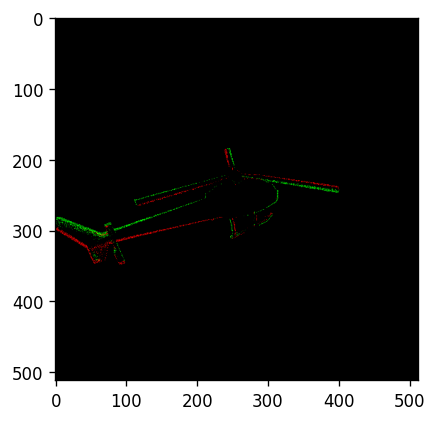

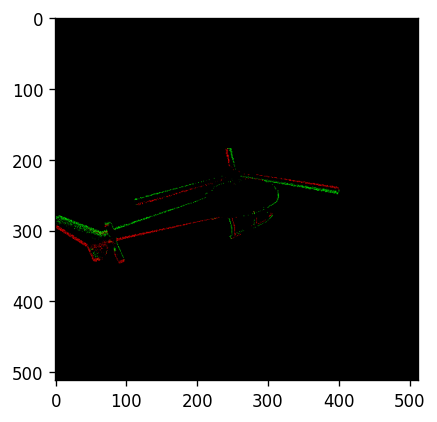

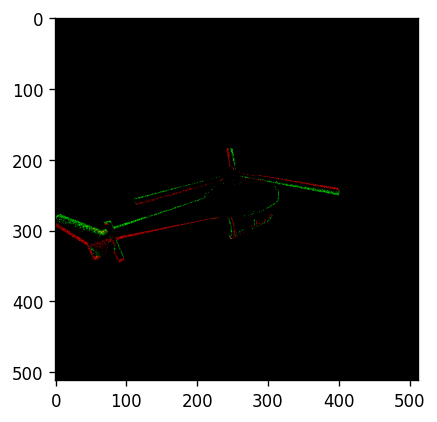

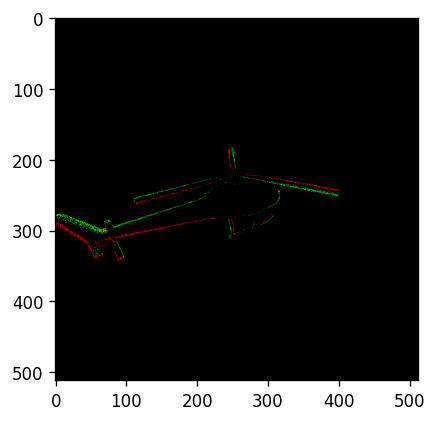

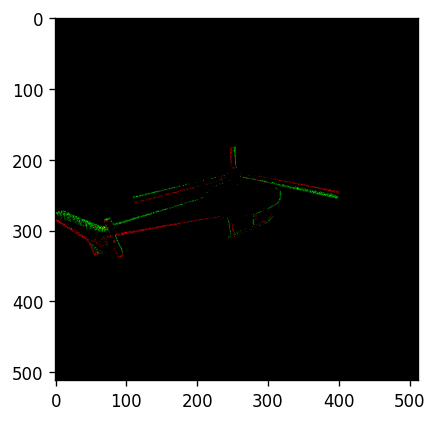

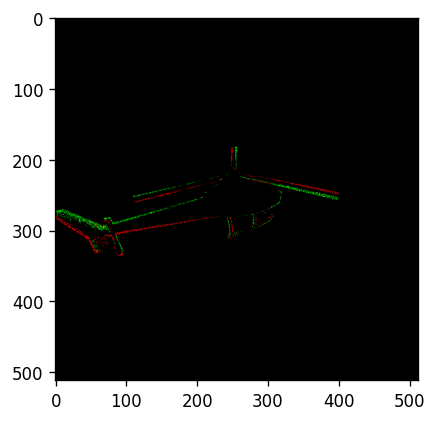

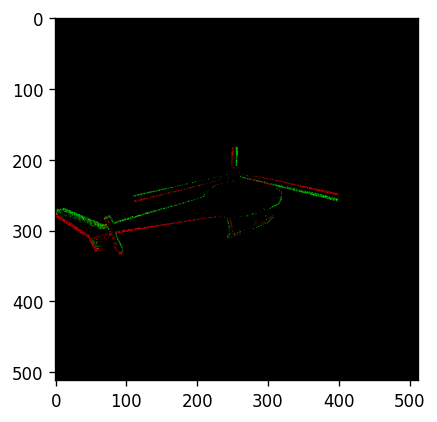

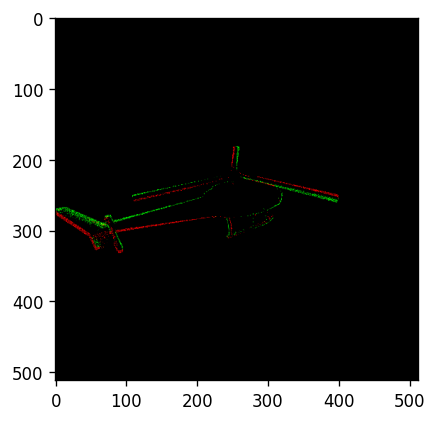

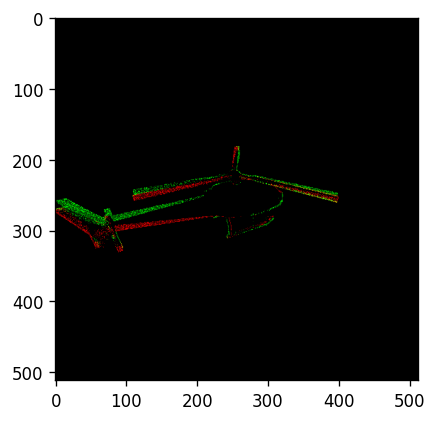

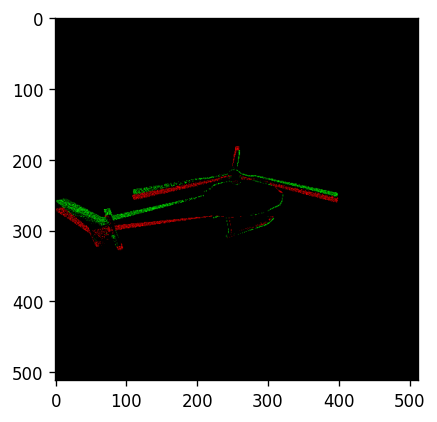

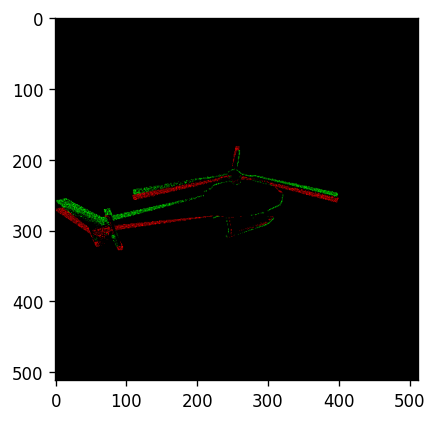

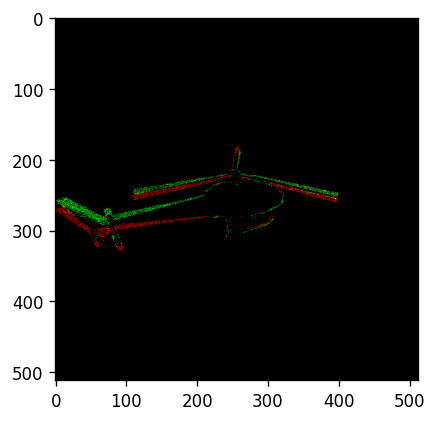

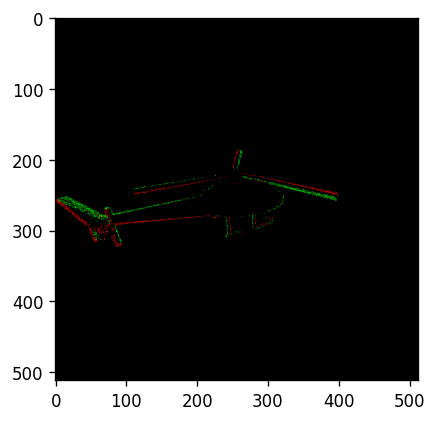

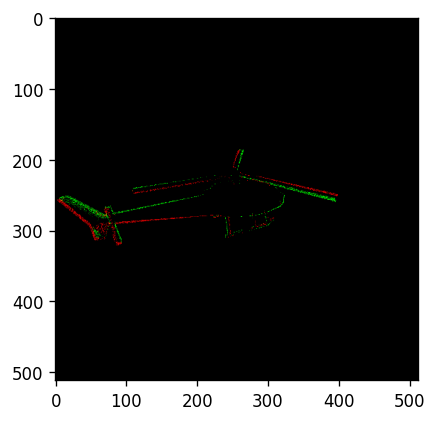

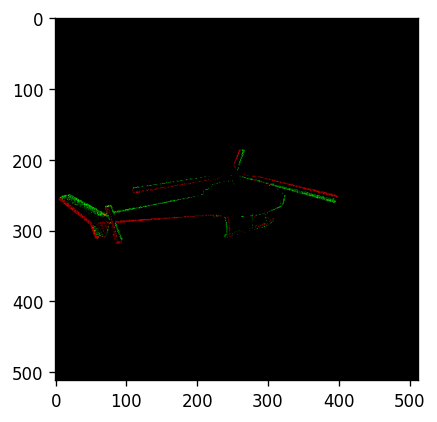

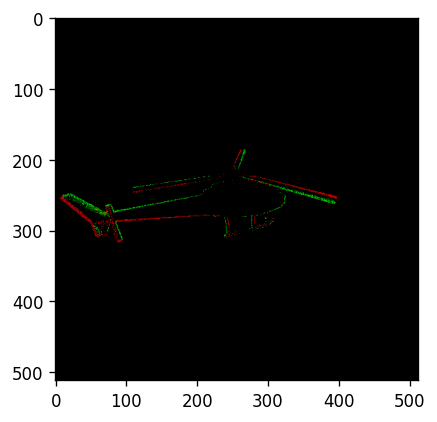

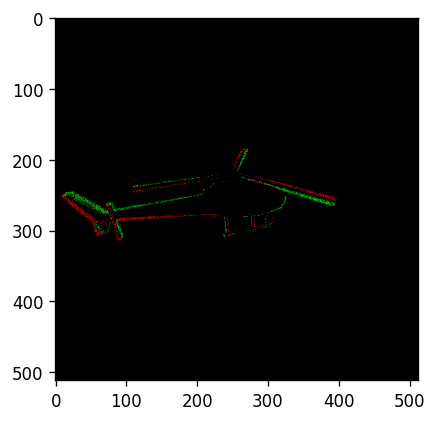

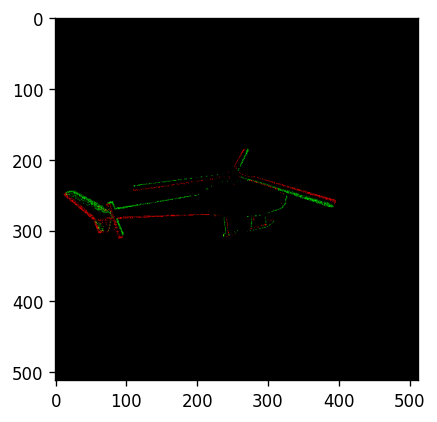

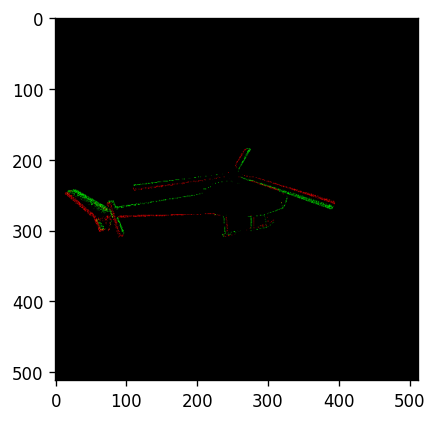

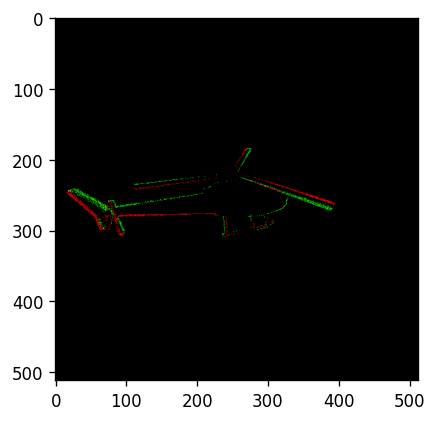

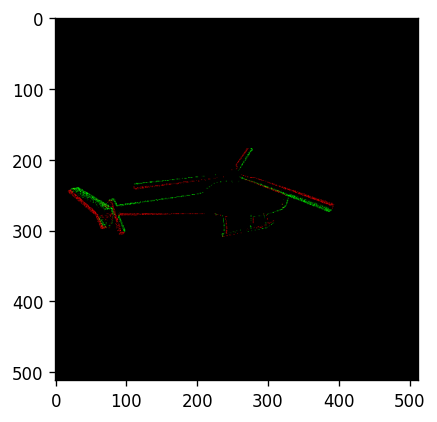

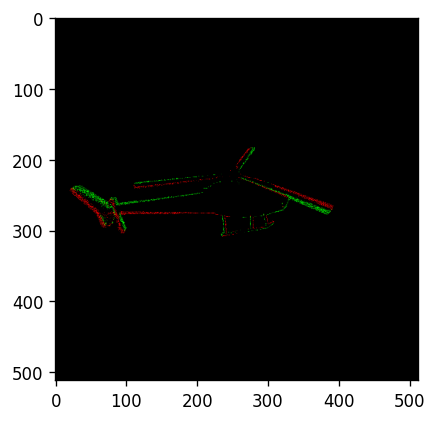

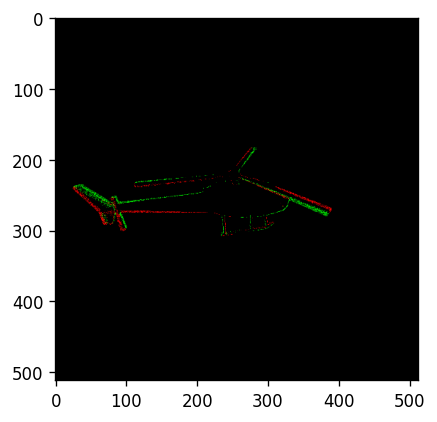

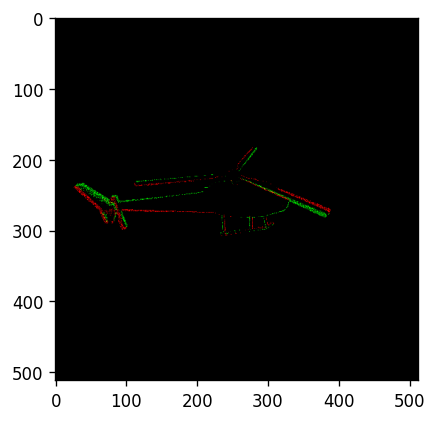

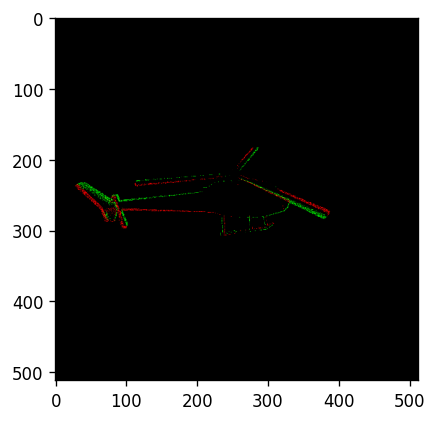

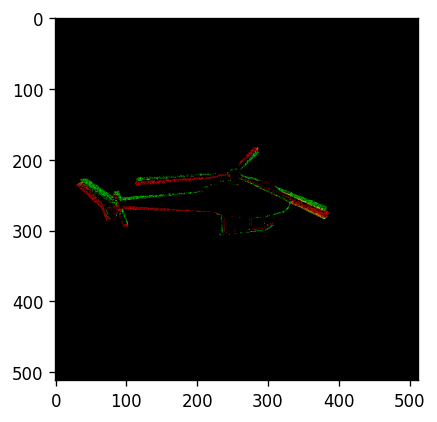

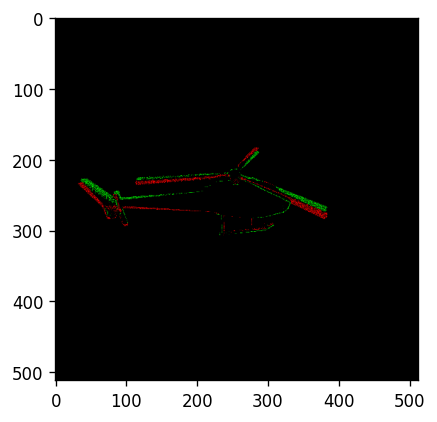

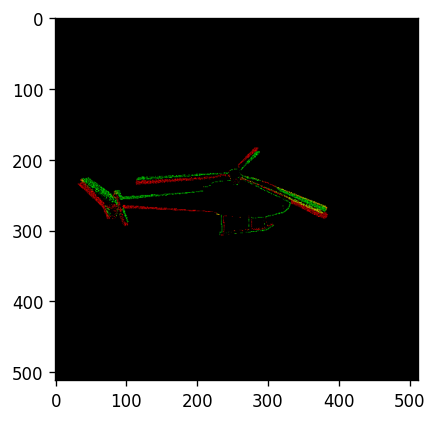

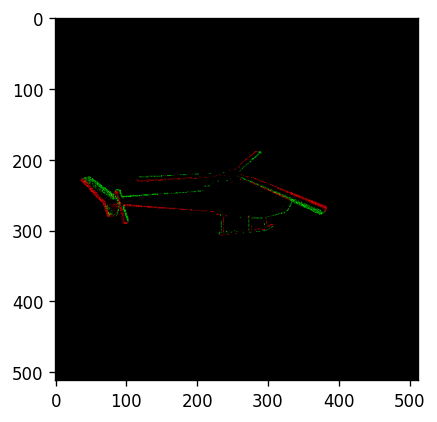

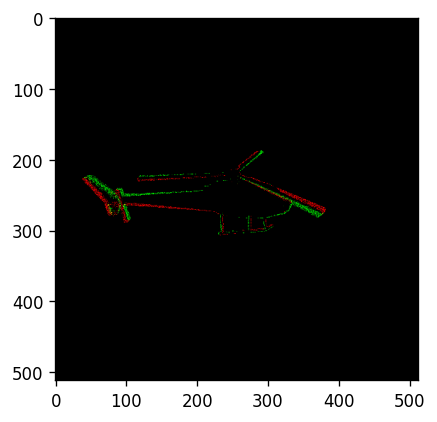

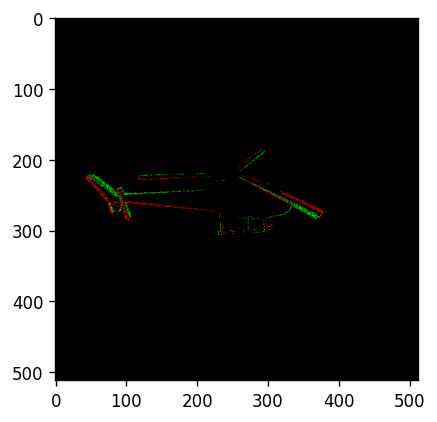

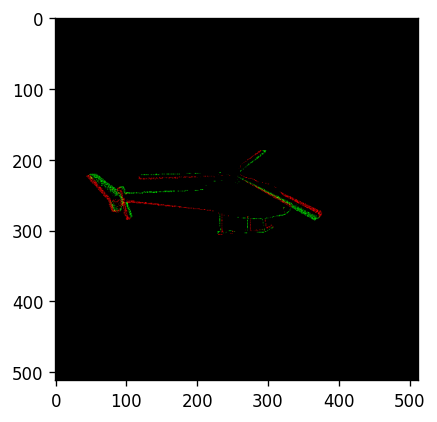

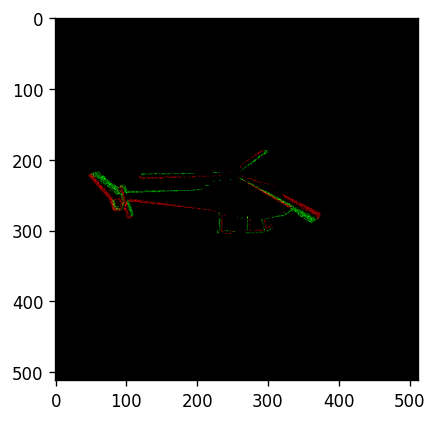

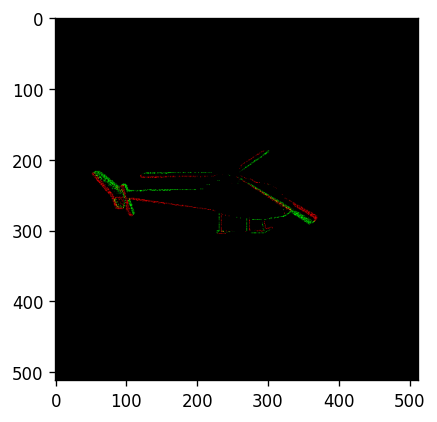

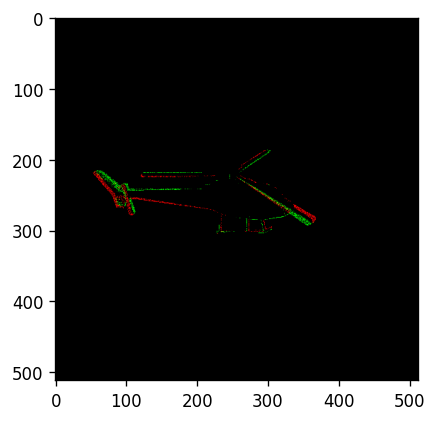

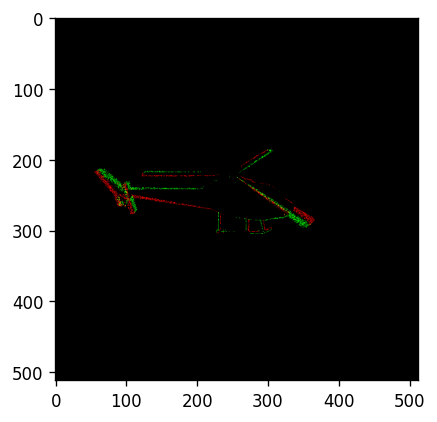

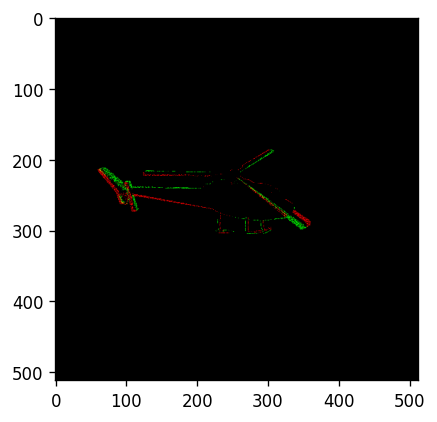

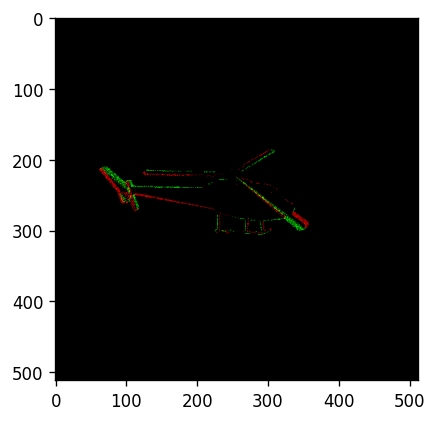

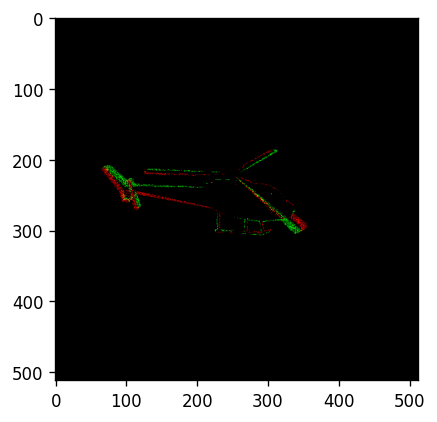

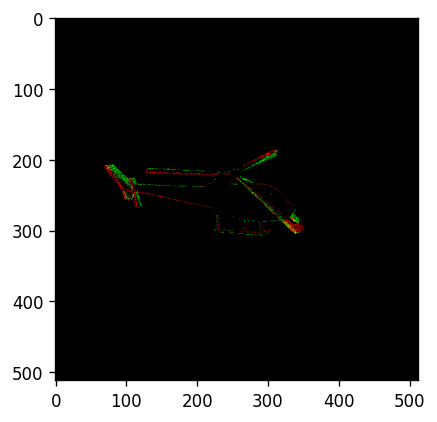

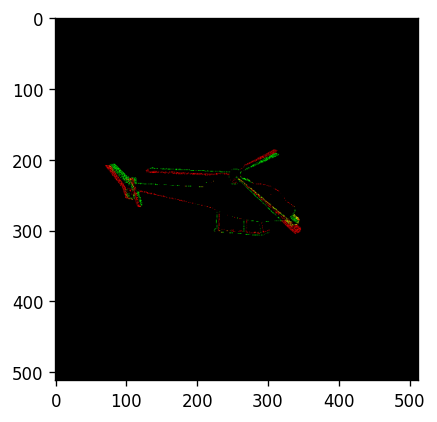

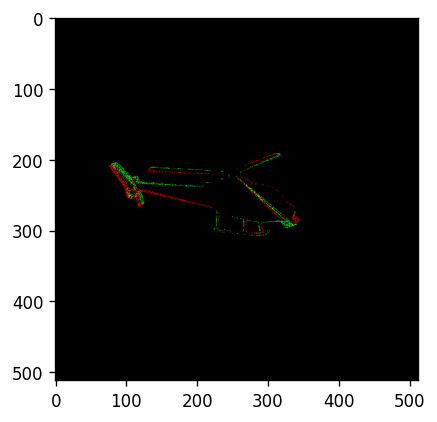

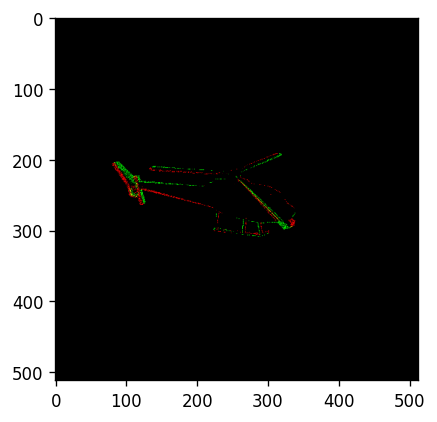

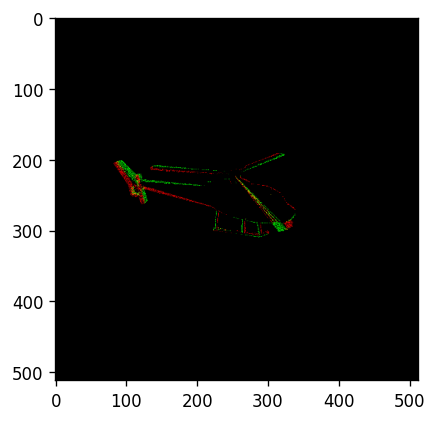

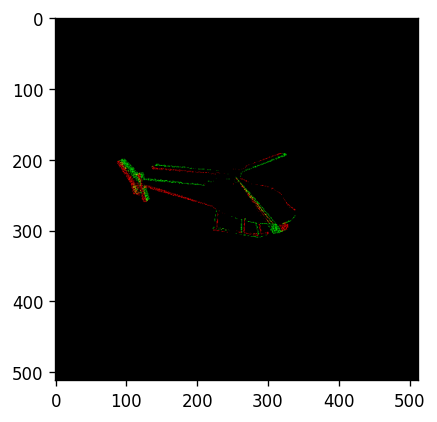

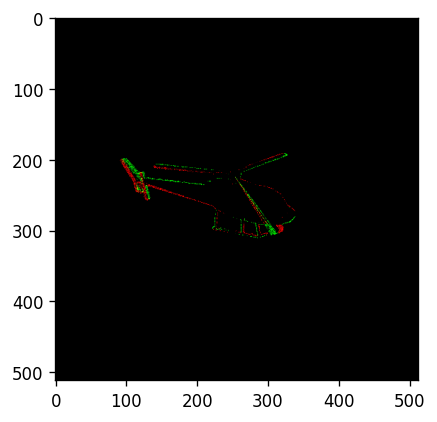

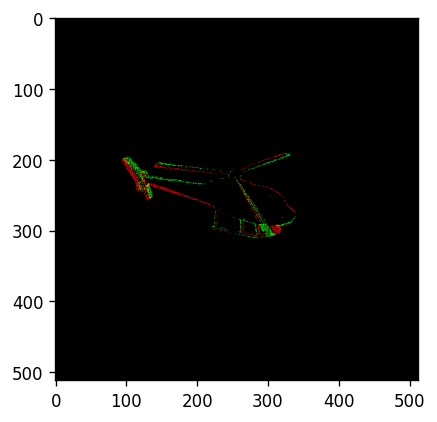

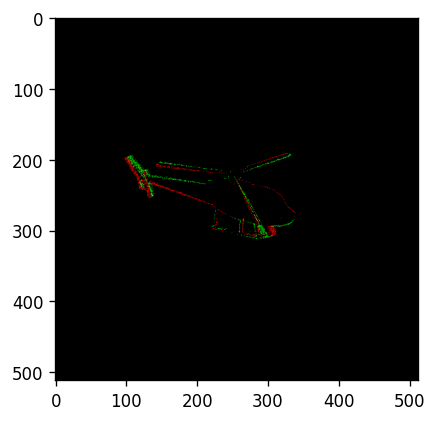

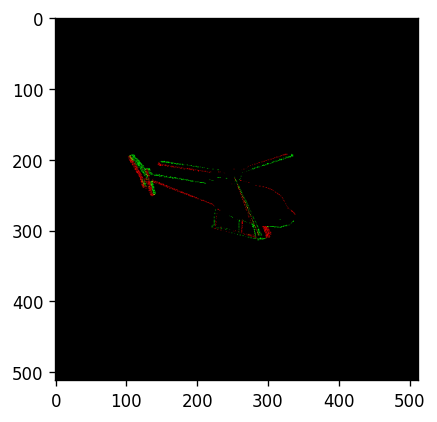

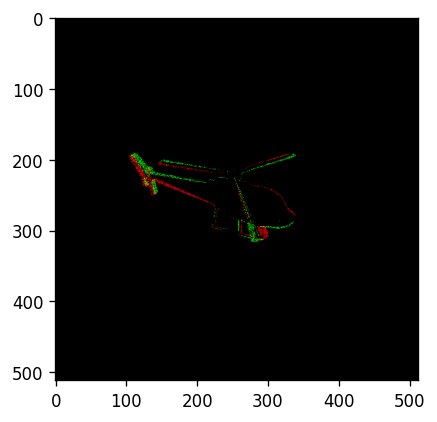

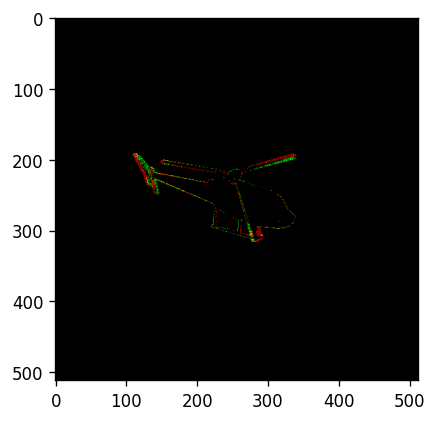

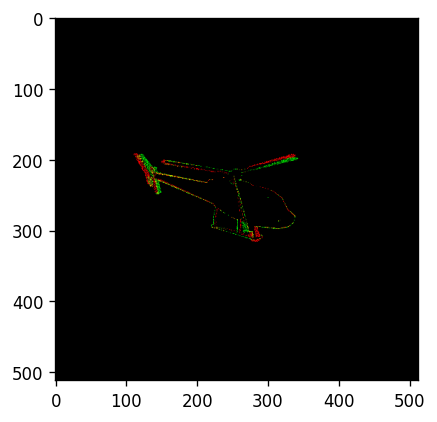

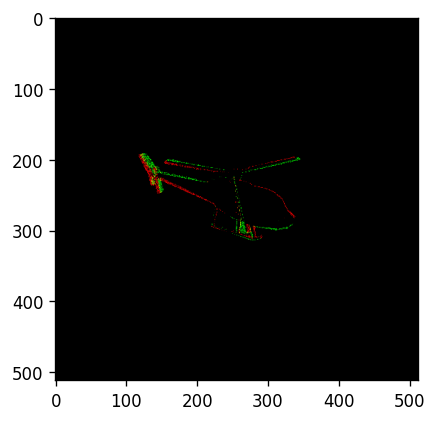

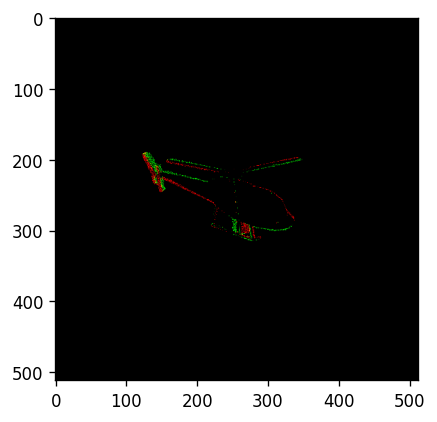

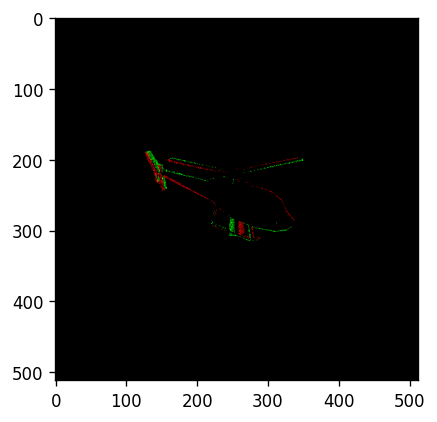

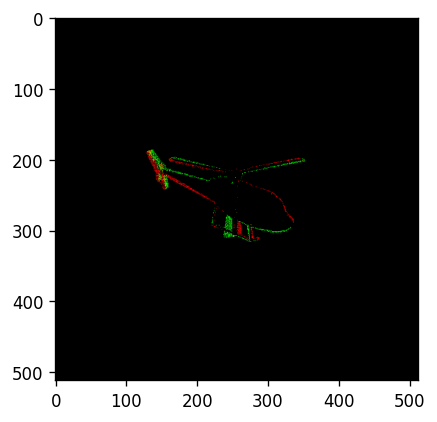

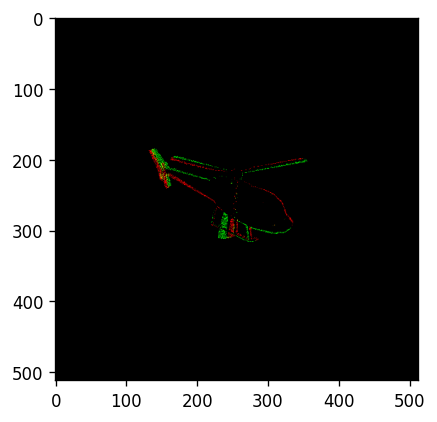

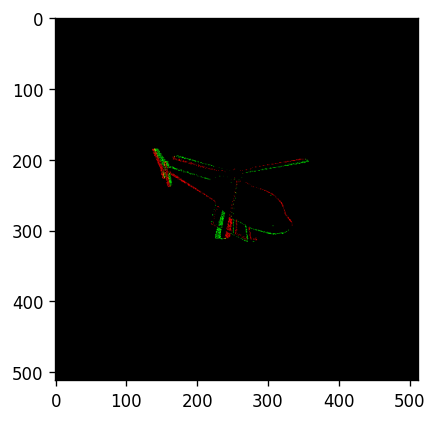

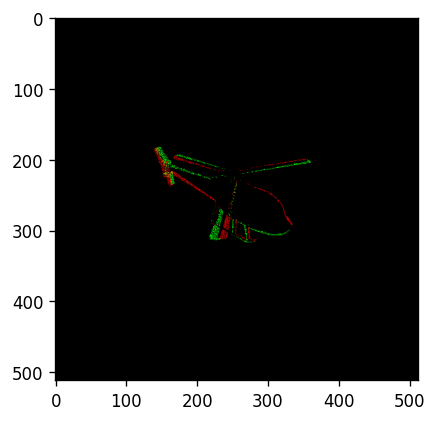

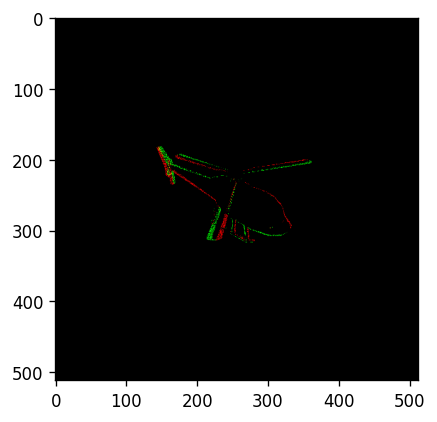

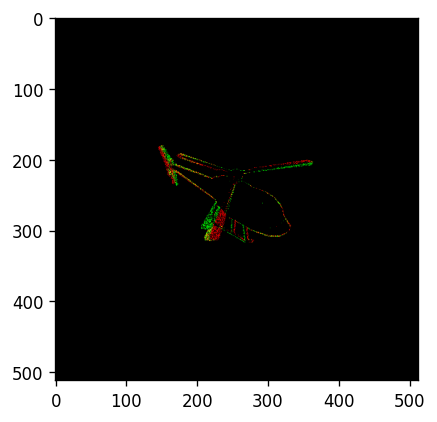

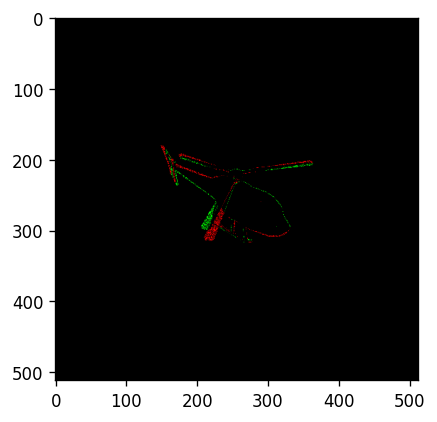

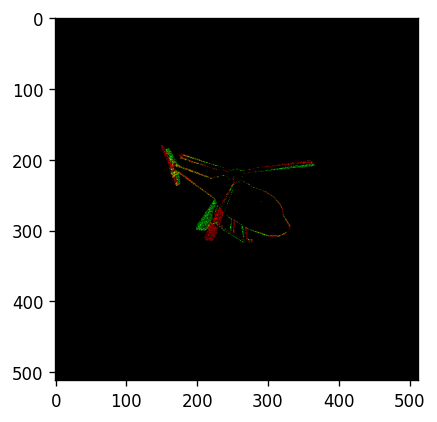

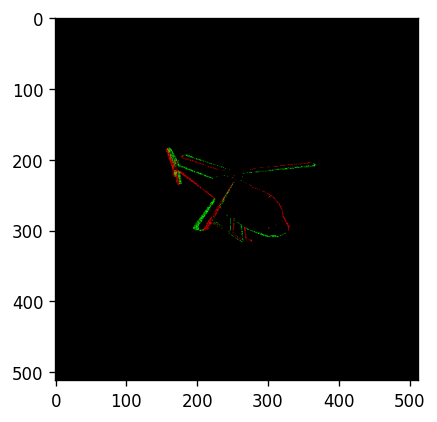

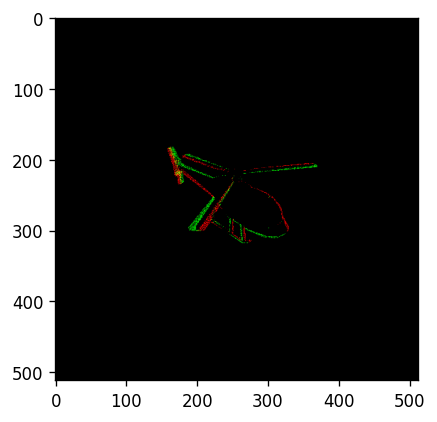

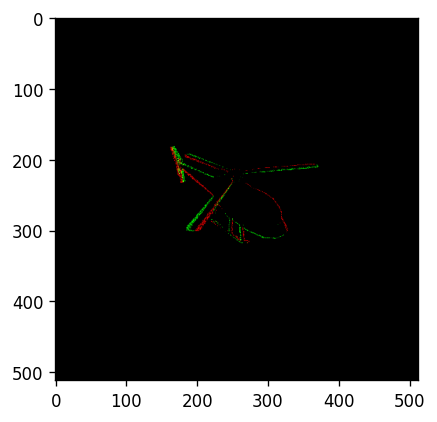

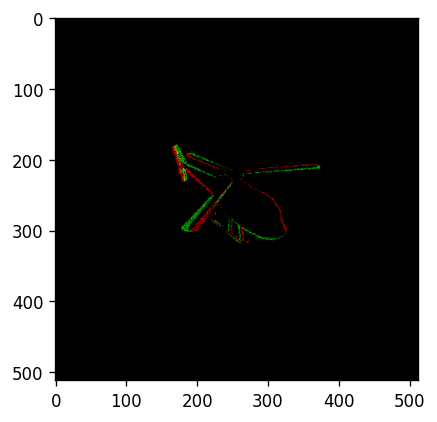

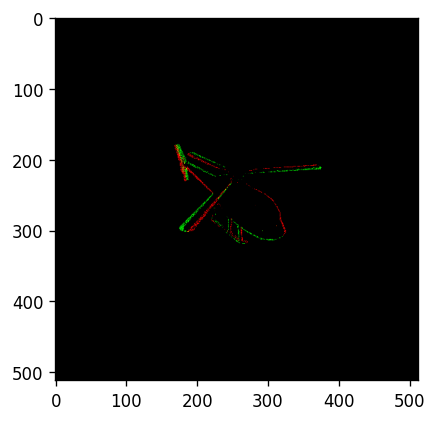

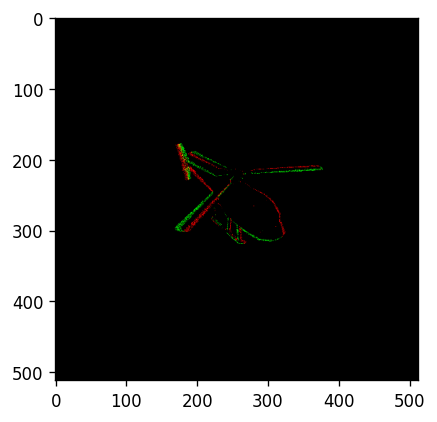

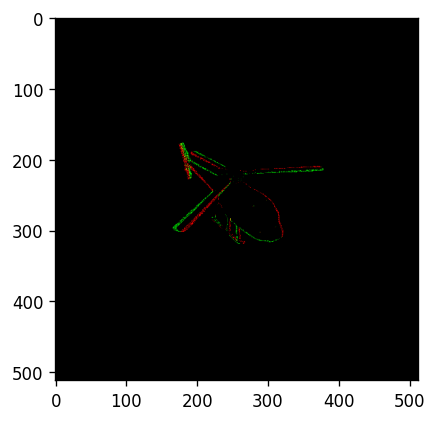

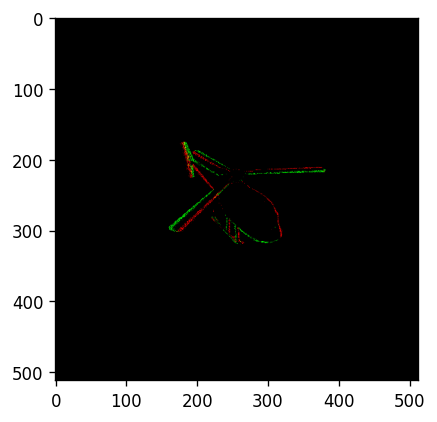

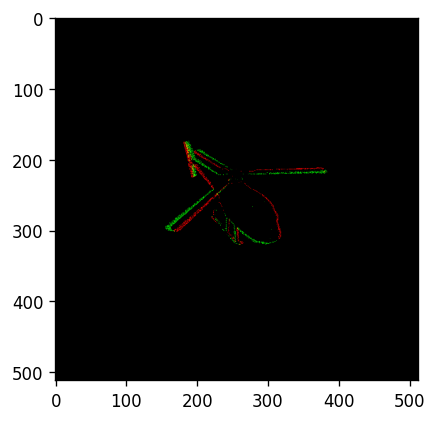

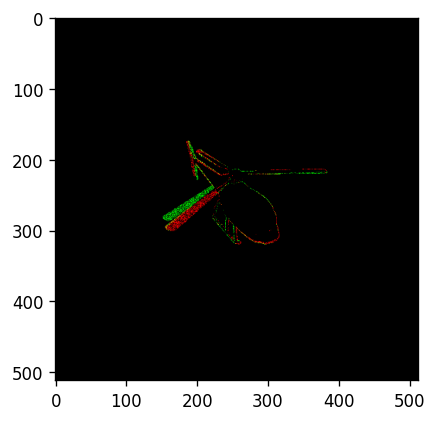

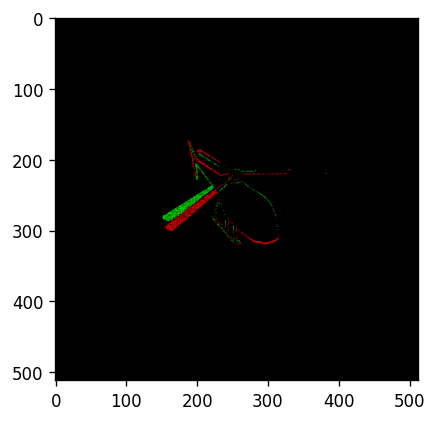

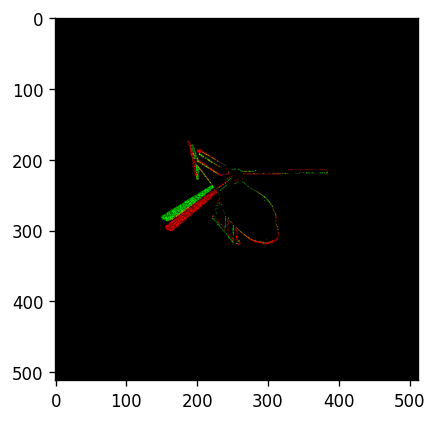

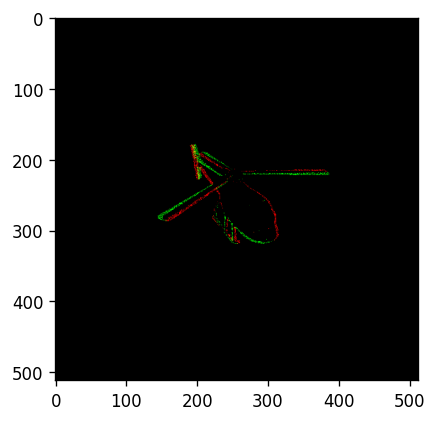

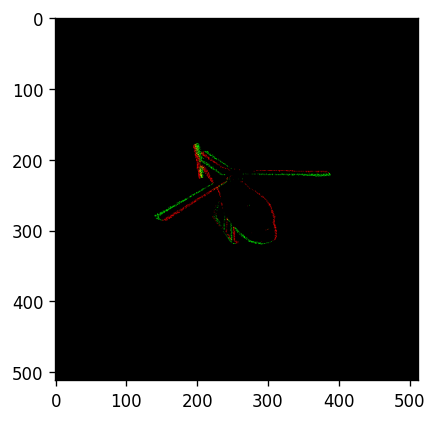

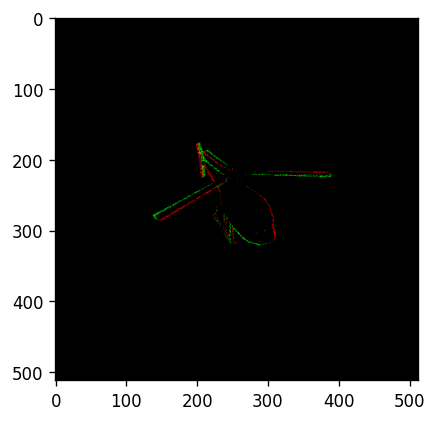

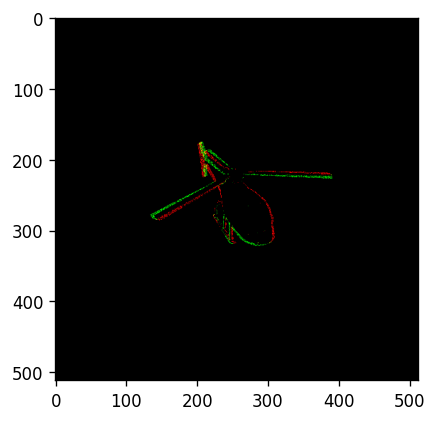

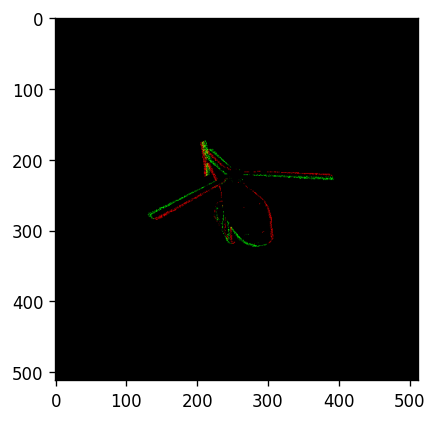

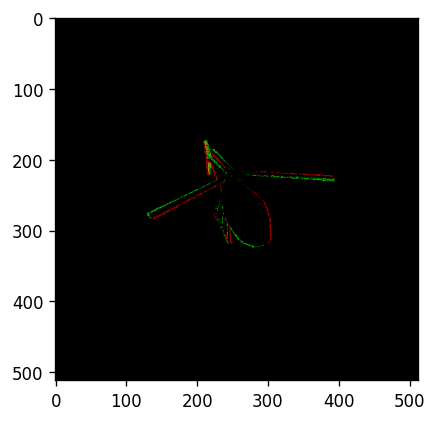

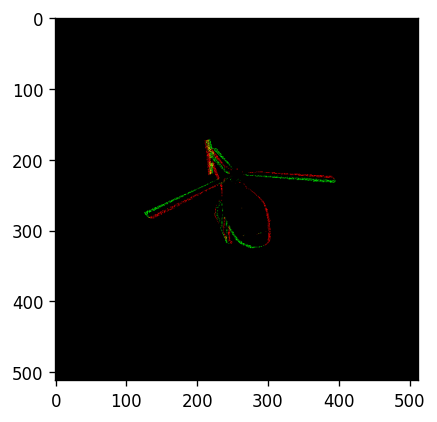

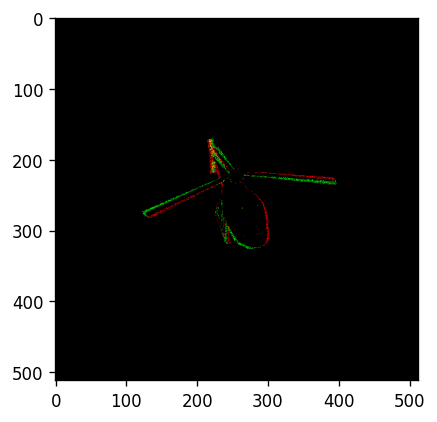

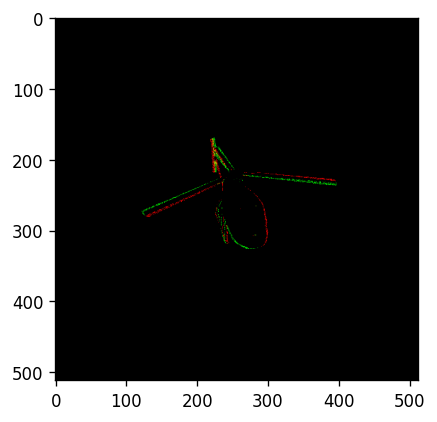

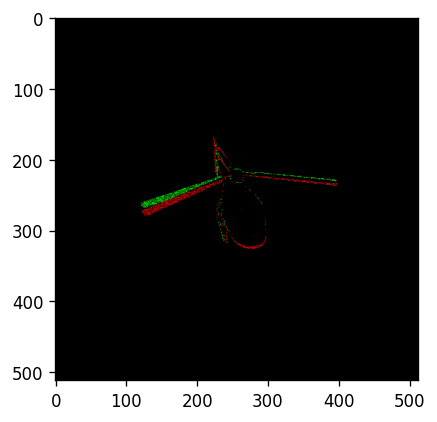

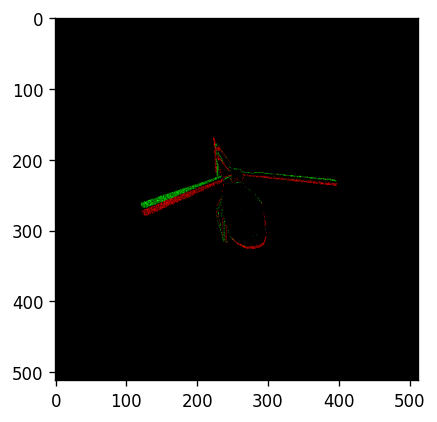

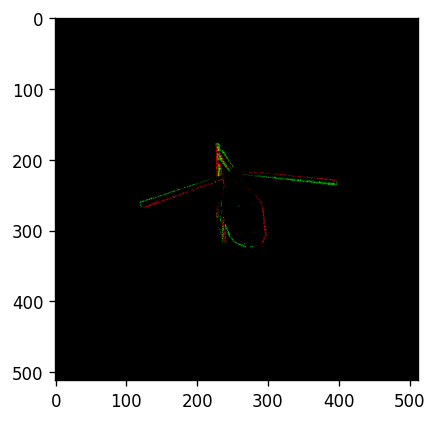

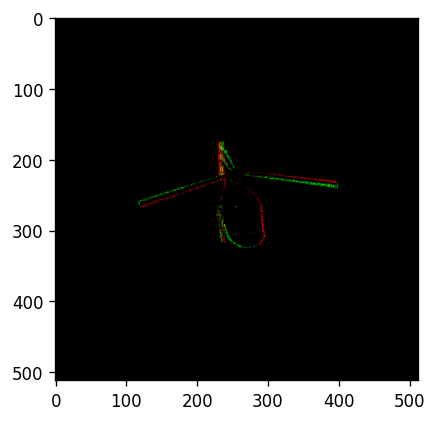

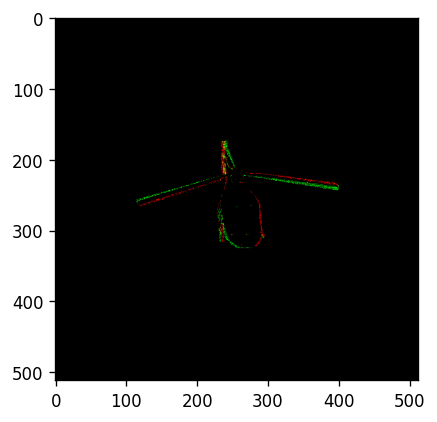

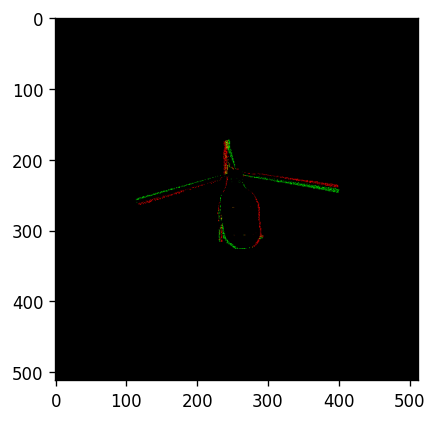

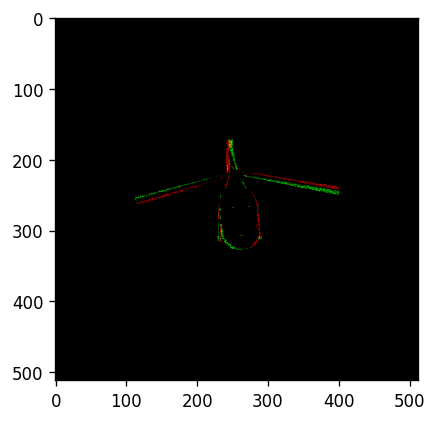

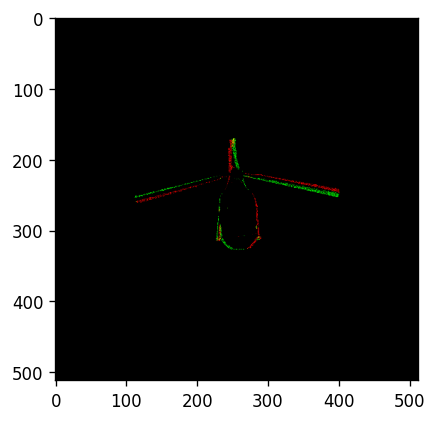

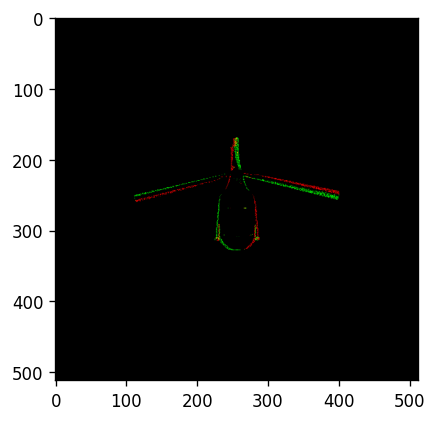

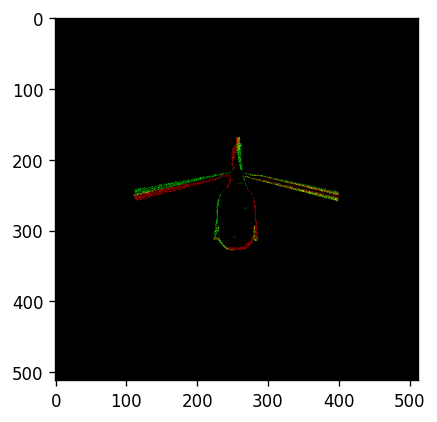

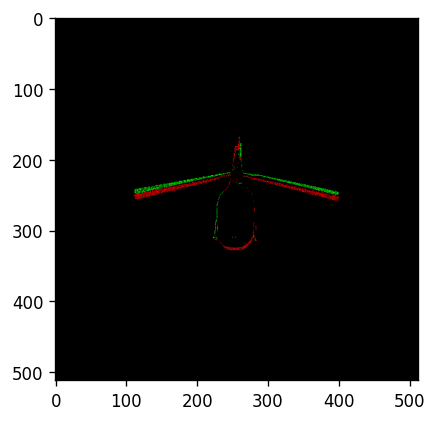

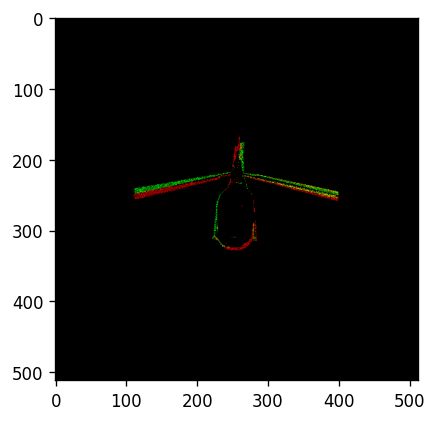

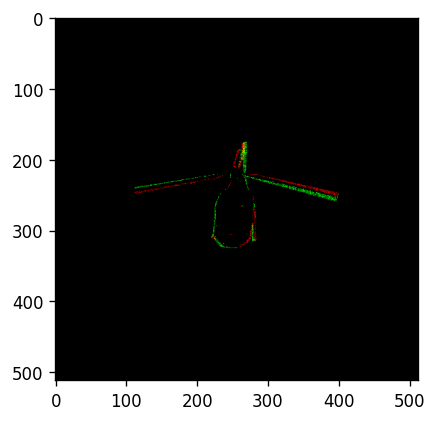

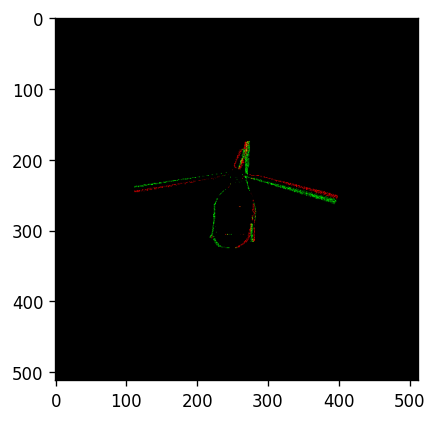

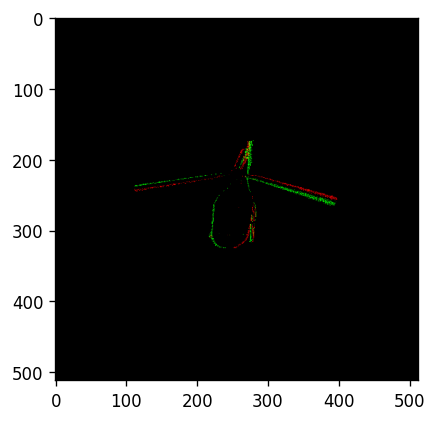

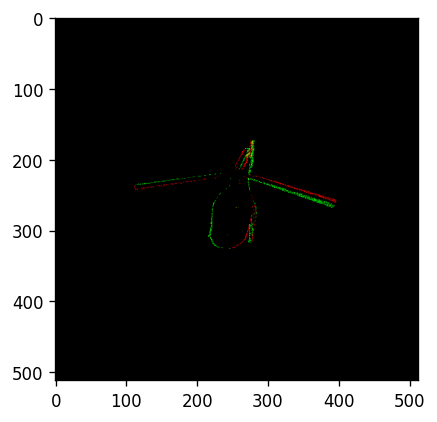

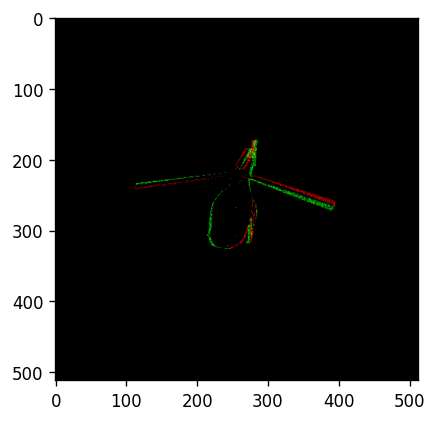

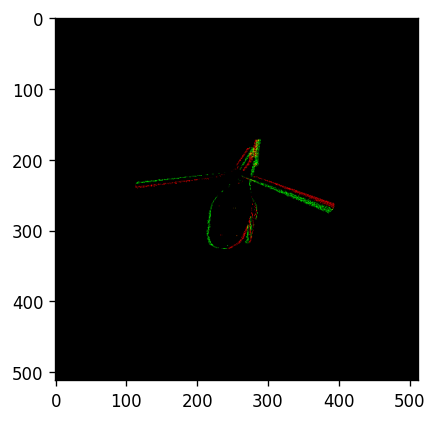

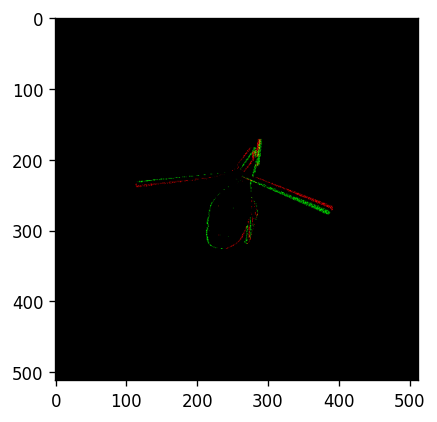

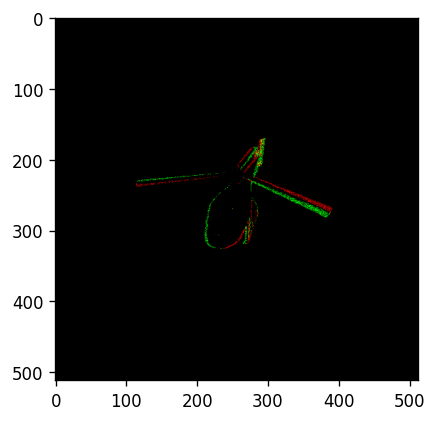

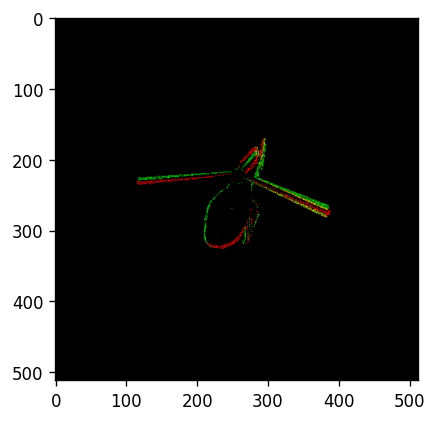

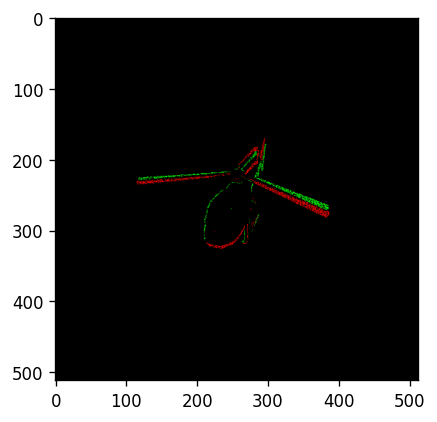

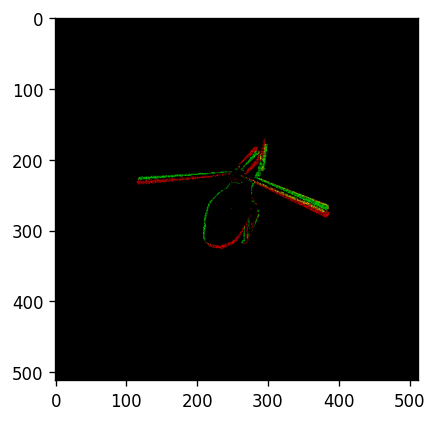

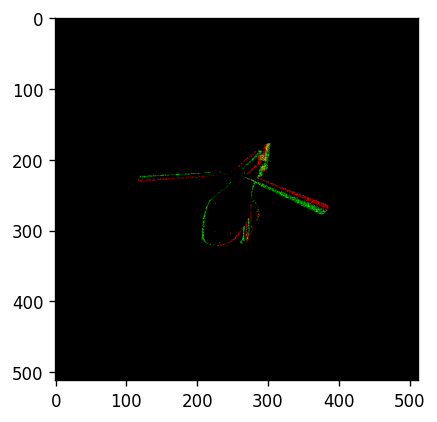

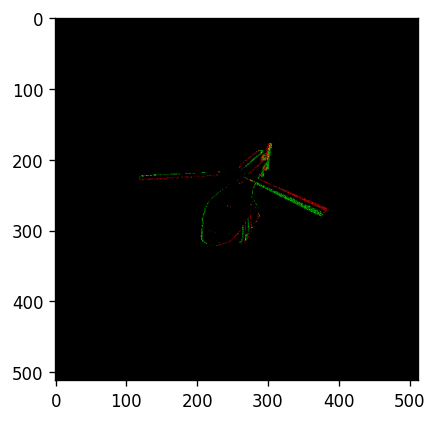

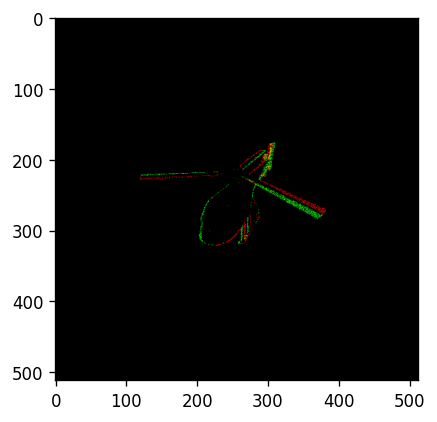

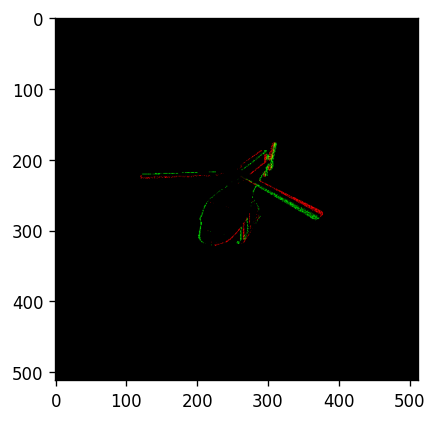

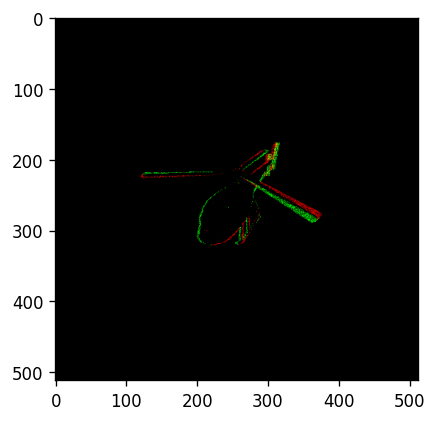

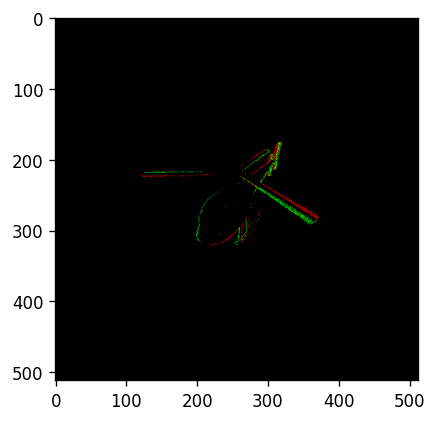

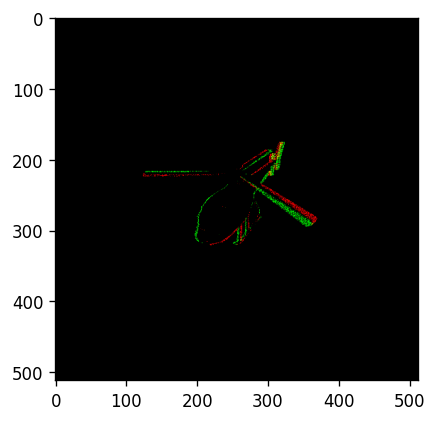

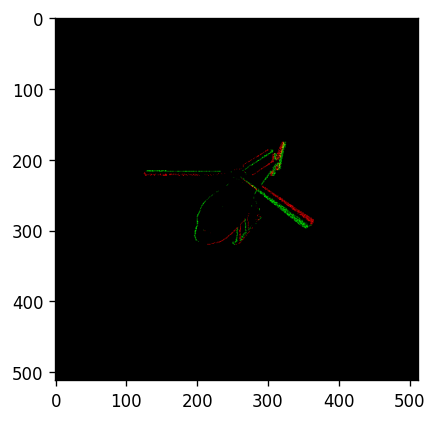

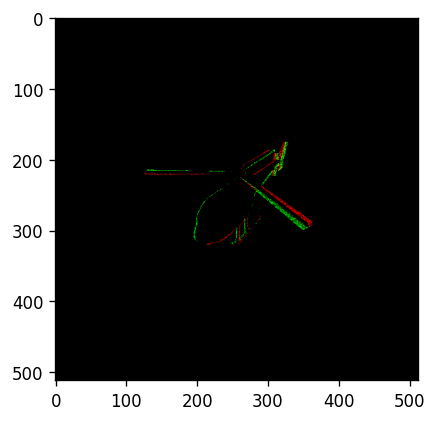

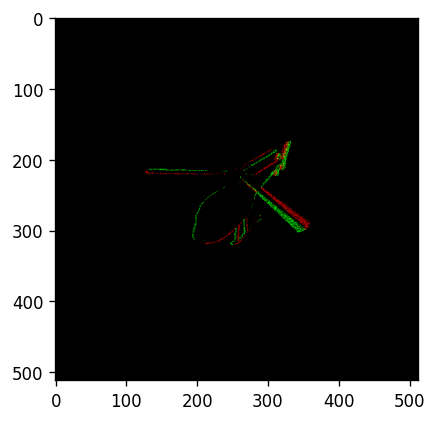

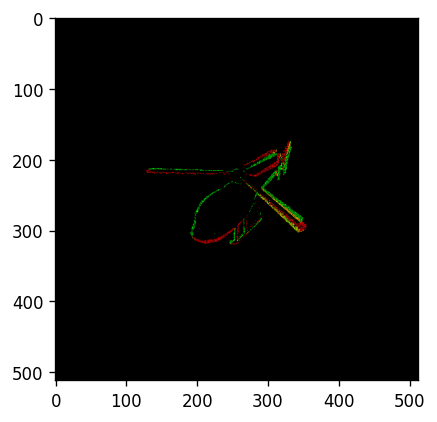

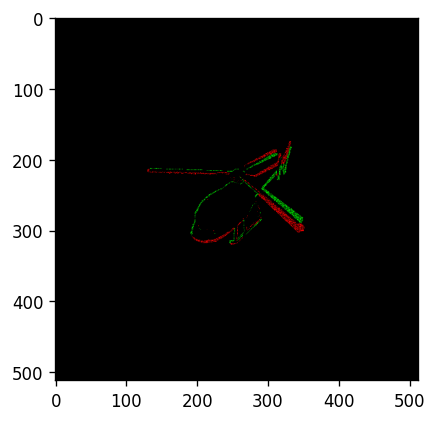

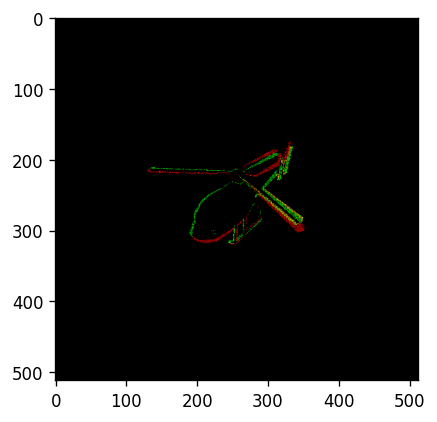

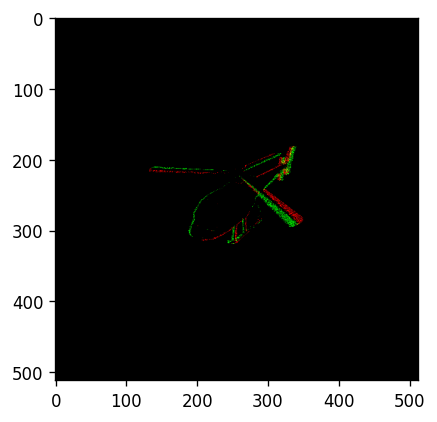

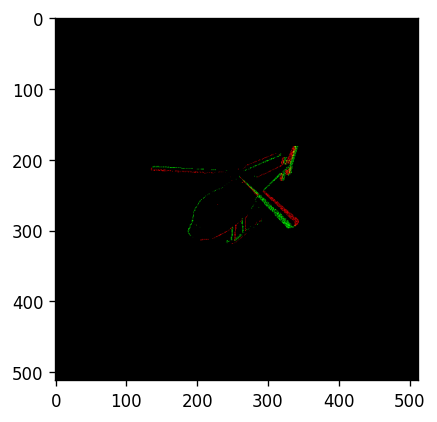

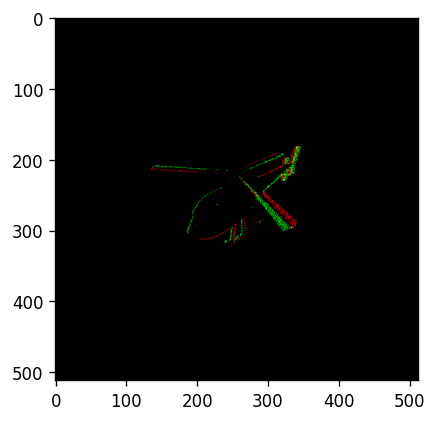

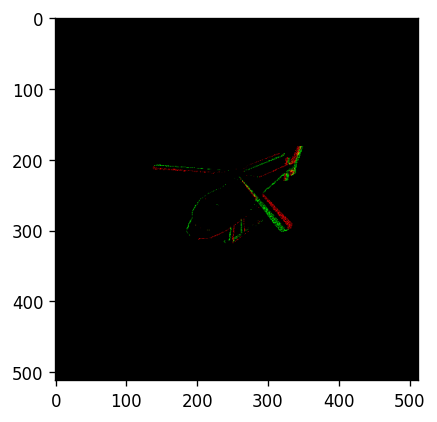

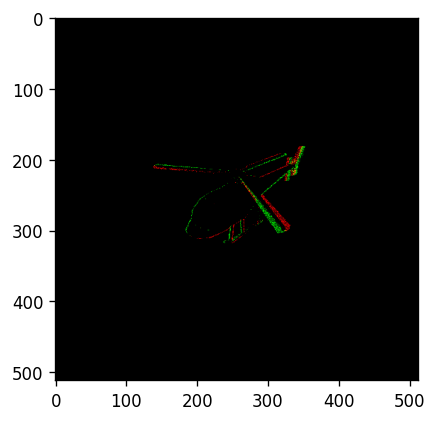

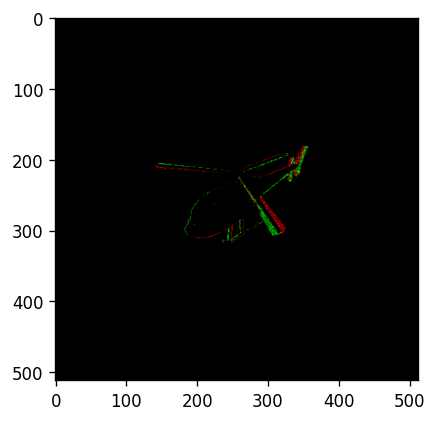

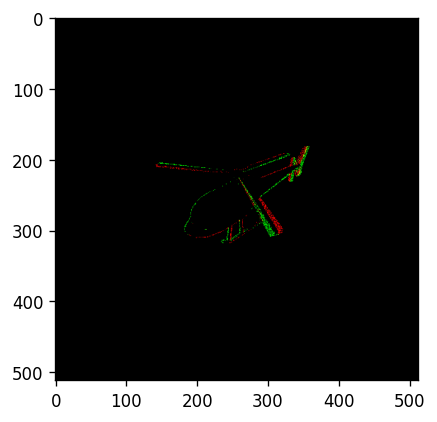

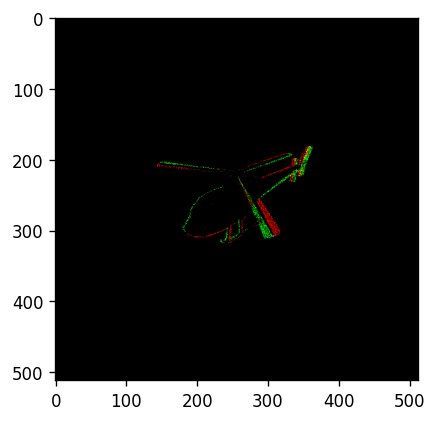

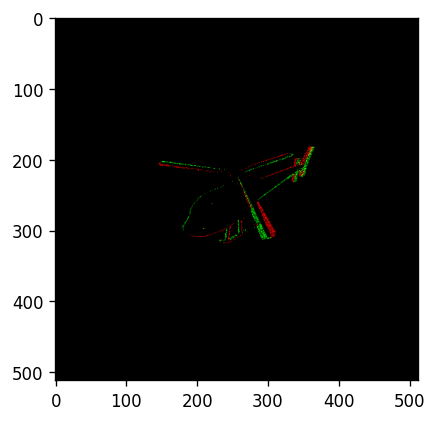

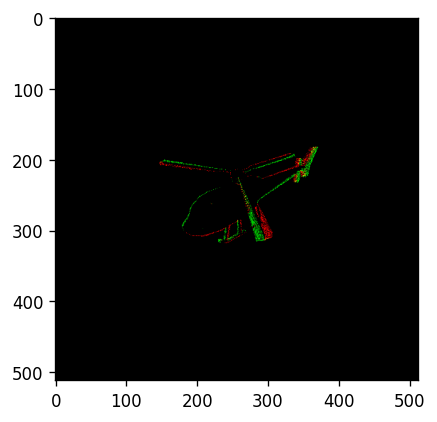

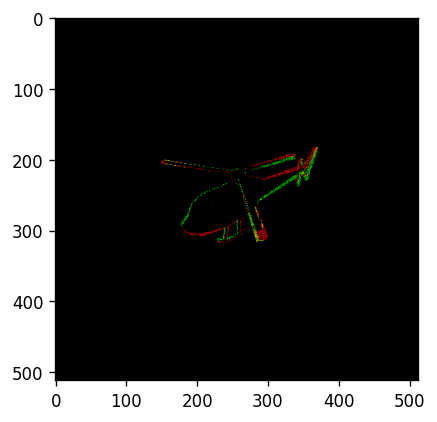

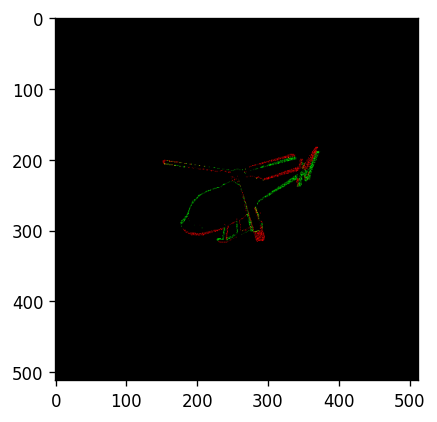

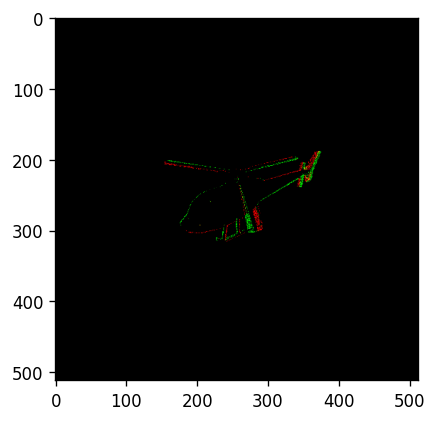

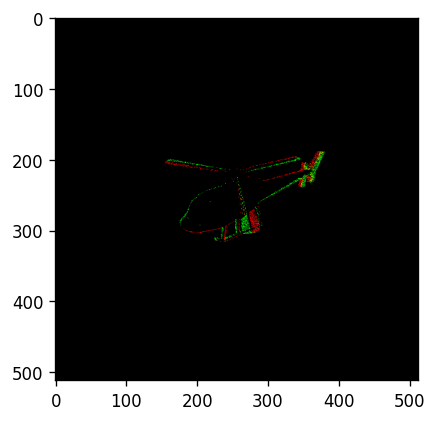

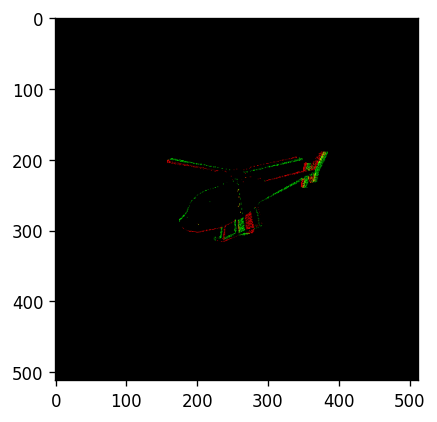

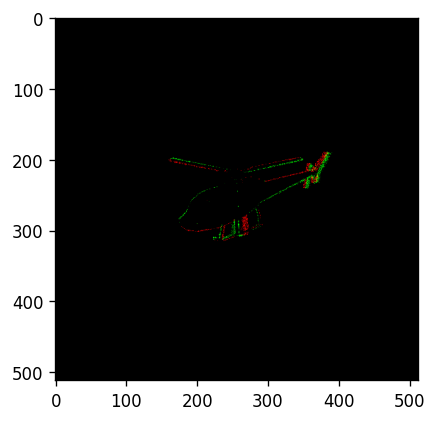

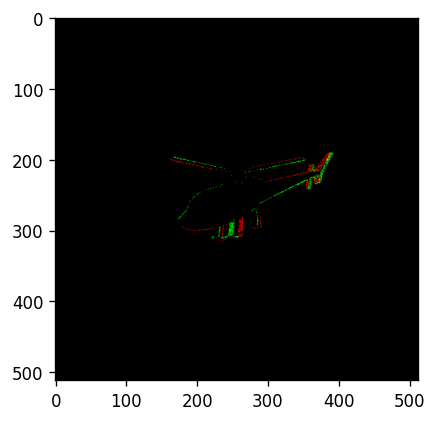

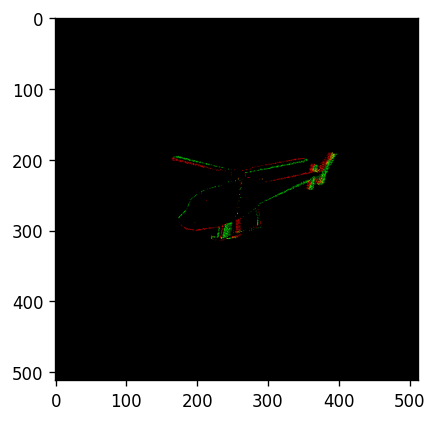

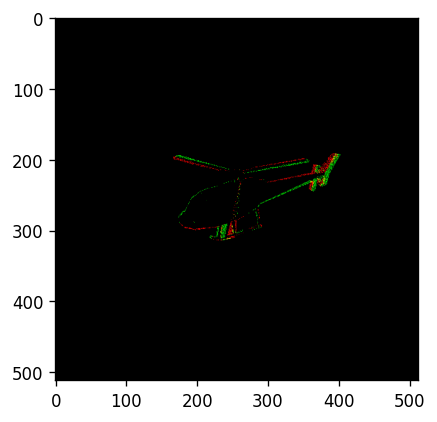

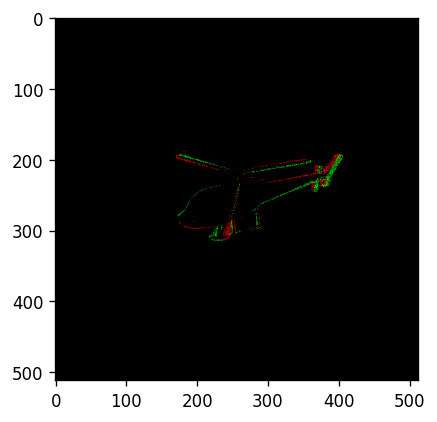

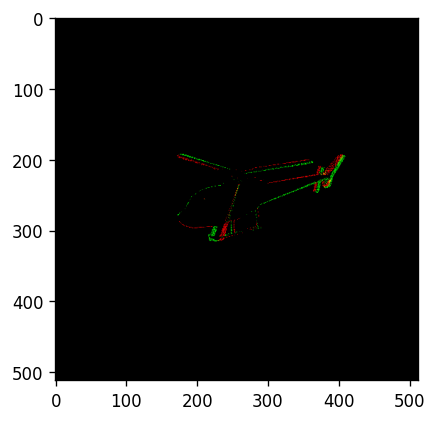

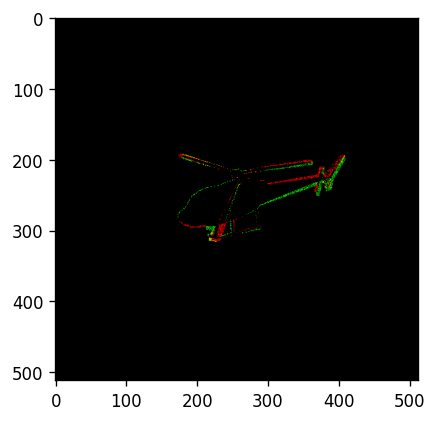

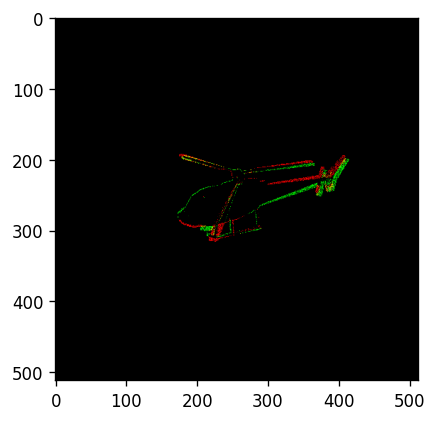

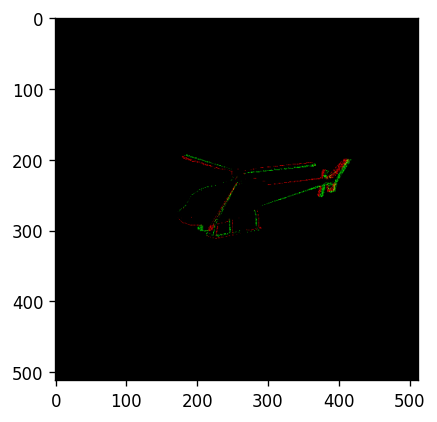

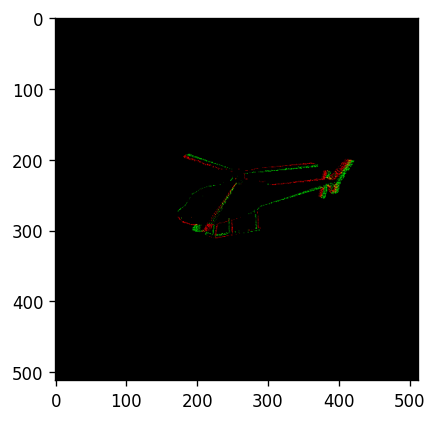

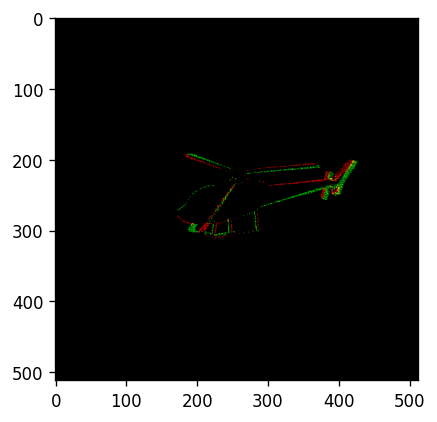

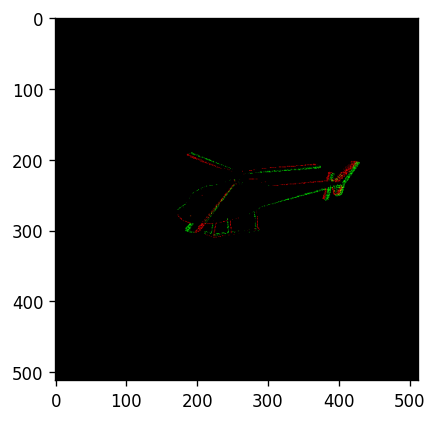

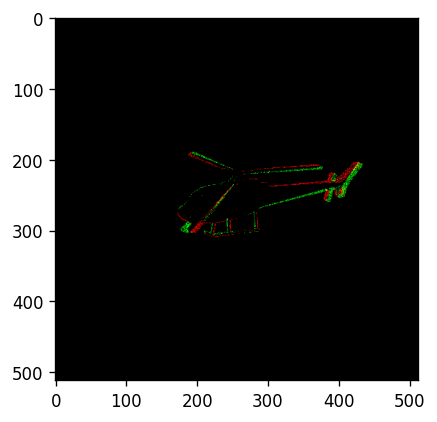

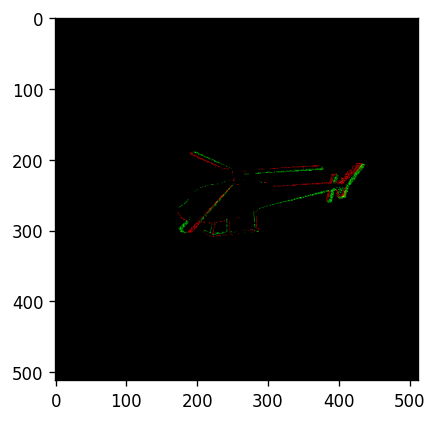

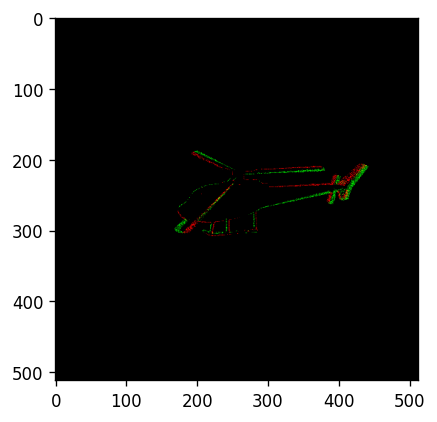

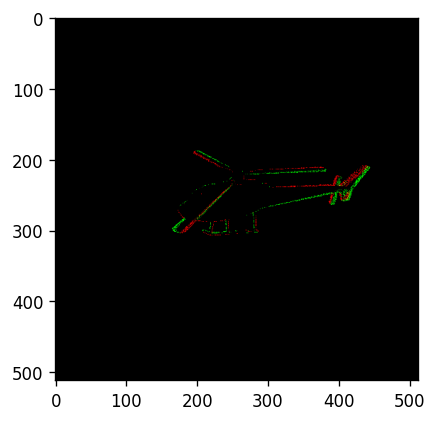

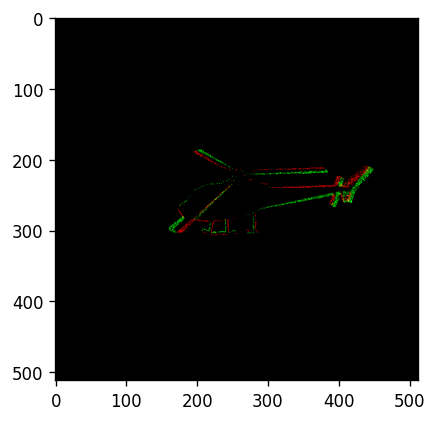

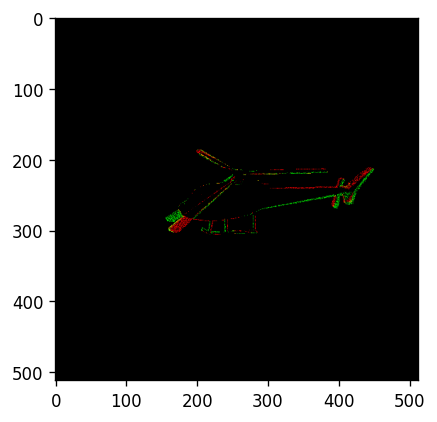

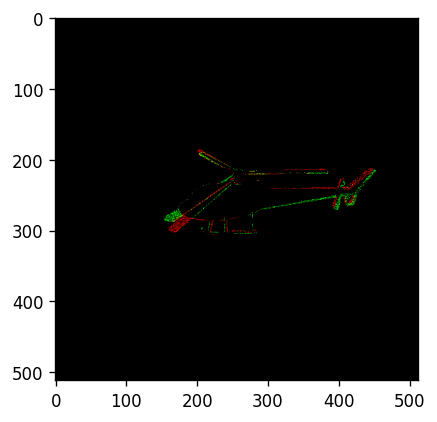

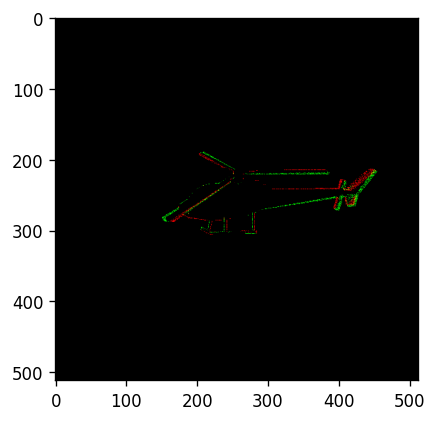

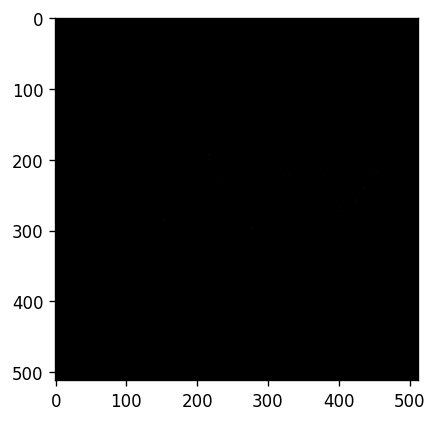

In [23]:
events = esim.generateFromStampedImageSequence(
        image_path_list, 
        timestamp_list)

batch_events_plot = int(len(events) / len(image_path_list))
print(int(batch_events_plot))

event_batch = 0
while event_batch <= len(events):
    visualize_vid2e_events(events[event_batch: event_batch+batch_events_plot], (512, 512))
    event_batch += batch_events_plot

In [ ]:
import os
from os.path import dirname, join
os.path.exists("data/renders/004-bottle_square_2020-09-04T12:37:56/phong/1_phong.png")

In [ ]:
join(abspath(dirname(os.getcwd())), "../data/renders/004-bottle_square_2020-09-04T12:37:56/phong/1_phong.png")